In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [438]:
def is_numeric(num):
    num = str(num)
    
    if num.isnumeric():
        return True
    else:
        temp = num.split('.')
        if (len(temp) == 2 and (temp[0].isnumeric() or (temp[0][0] == '-' and temp[0][1:].isnumeric())) and temp[1].isnumeric()):
            return True
        elif num[0] == '-' and num[1:].isnumeric():
            return True
    return False

def expected_output(s):
    # Find the value of expected output
    p = params.reshape((19,))
    for row in Data_set[s:s+5000].to_numpy():
        row = row.reshape((19,))
        temp = np.dot(row, p)
        temp += b
        yield temp
#     for _, row in list(Data_set.iterrows())[s:s+5000]:
#         temp = np.dot(np.array(row).reshape((19,)), params.reshape(19,))
#         temp += b
#         yield temp
def cost(e, a):
#     print(*zip(e, a), sep='\n')
    return sum((expected - actual) ** 2 for expected, actual in zip(e, a)) / (2 * len(e))
    
def correction(e, a):
    return sum(expected - actual for expected, actual in zip(e, a)) / len(e)

In [449]:
Data_set = pd.read_csv("includes/house_prices.csv", encoding = "ISO-8859-1")

# Readjusting fields and data
# Columns URL, id, Cid, totalProce, DOM, tradeTime are unnecessary dropping these 5
Data_set.drop(['url', 'id', 'Cid', 'totalPrice', 'DOM', 'tradeTime'], axis=1, inplace=True)

# constructionTime is to be replaced by age in years from 2022
for col in Data_set.columns:
    Data_set = Data_set[Data_set[col].apply(lambda x: is_numeric(x))]

for col in Data_set.columns:
    Data_set[col] = [float(x) for x in Data_set[col]]

Data_set['propertyAge'] = [2022 - int(x) for x in Data_set['constructionTime']]
Data_set.drop(['constructionTime'], axis=1, inplace=True)

# Removing OutLiers
for col in Data_set.columns:
    if col in ['kitchen', 'bathRoom', 'elevator', 'subway', 'price']: # Bool variables are kept as is
        continue
    mean = Data_set[col].mean();
    std = Data_set[col].std();
    Data_set = Data_set[Data_set[col].apply(lambda x: mean - 2 * std <= x <= mean + 2 * std)]
    
#     Normalize the data
#     Data_set[col] = [(x - mean) / std for x in Data_set[col]]
    
# Model will work based the remaining fields
Data_set.describe()

C:\Users\Hp\AppData\Local\Temp\ipykernel_7068\3043519728.py:1: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  Data_set = pd.read_csv("includes/house_prices.csv", encoding = "ISO-8859-1")


Lng            Lat      followers          price  \
count  187696.000000  187696.000000  187696.000000  187696.000000   
mean      116.411534      39.951250      12.424697   42472.883434   
std         0.092573       0.080230      17.501651   18700.774046   
min       116.196272      39.771345       0.000000       1.000000   
25%       116.344557      39.892447       0.000000   29121.750000   
50%       116.415037      39.935656       5.000000   38561.500000   
75%       116.474014      40.007017      17.000000   51780.000000   
max       116.640545      40.125964      87.000000  149660.000000   

             square     livingRoom    drawingRoom        kitchen  \
count  187696.00000  187696.000000  187696.000000  187696.000000   
mean       80.91902       1.974773       1.222013       1.000096   
std        27.24987       0.668277       0.415601       0.054329   
min        10.00000       1.000000       1.000000       0.000000   
25%        59.49000       2.000000       1.000000       1.000000   
50%        75.70000       2.000000       1.000000       1.000000   
75%        97.97000       2.000000       1.000000       1.000000   
max       155.78000       3.000000       2.000000       3.000000   

            bathRoom          floor   buildingType  renovationCondition  \
count  187696.000000  187696.000000  187696.000000        187696.000000   
mean        1.156349      13.244321       2.974272             2.584482   
std         0.366443       7.491203       1.292198             1.315307   
min         0.000000       2.000000       1.000000             1.000000   
25%         1.000000       6.000000       1.000000             1.000000   
50%         1.000000      12.000000       4.000000             3.000000   
75%         1.000000      20.000000       4.000000             4.000000   
max         7.000000      28.000000       4.000000             4.000000   

       buildingStructure    ladderRatio       elevator  fiveYearsProperty  \
count      187696.000000  187696.000000  187696.000000      187696.000000   
mean            4.447042       0.377571       0.575686           0.672961   
std             1.908598       0.168803       0.494240           0.469133   
min             2.000000       0.014000       0.000000           0.000000   
25%             2.000000       0.250000       0.000000           0.000000   
50%             6.000000       0.333000       1.000000           1.000000   
75%             6.000000       0.500000       1.000000           1.000000   
max             6.000000       5.000000       1.000000           1.000000   

              subway       district  communityAverage    propertyAge  
count  187696.000000  187696.000000     187696.000000  187696.000000  
mean        0.595186       6.596736      62144.139396      22.559943  
std         0.490857       2.149863      16664.273452       7.516785  
min         0.000000       2.000000      24224.000000       7.000000  
25%         0.000000       6.000000      49033.000000      17.000000  
50%         1.000000       7.000000      59395.000000      21.000000  
75%         1.000000       8.000000      72460.000000      28.000000  
max         1.000000      11.000000     108198.000000      40.000000

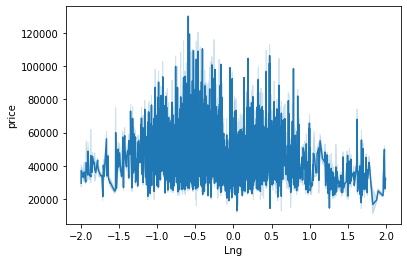

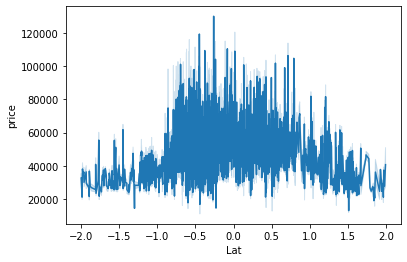

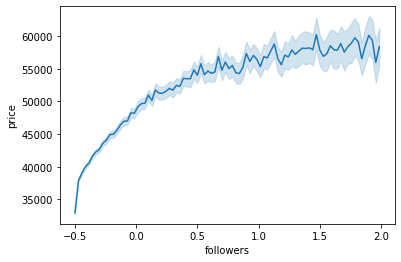

KeyboardInterrupt: 

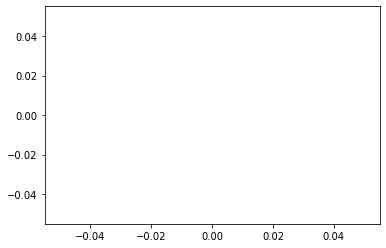

In [398]:
# Display data relations
for z in list(Data_set.columns):
    plt.figure()
    sns.lineplot(data=Data_set, x=z, y='price')
    plt.show()

In [450]:
# Rearrage to bring price to front
cols = list(Data_set.columns.values)
Data_set = Data_set[[cols[3]] + cols[0:3] + cols[4:]]

# Using Learning Rate as abs(Correlation ^ -1 / 500)
learning_rates = np.array([[abs(1 /(900000 * x)) for x in Data_set.corr()['price'][1:]]])
# Using random values as start point for w and b
params = np.random.rand(1,19)
params = params.reshape((19,))
b = 0
b_learningRate = learning_rates.mean()
totalEntries = Data_set.shape

# To store cost after every iteration and draw plot
progress = []

print(learning_rates)
print(params)

[[7.59836522e-06 3.14420640e-05 2.99408883e-06 5.99700792e-06
  1.43318395e-05 9.33595509e-06 2.86047621e-04 1.36557218e-05
  1.69175519e-05 1.59876862e-05 3.31080140e-06 1.60427829e-05
  1.38820482e-05 1.40095379e-05 9.17507262e-05 5.68515182e-06
  4.09140108e-06 1.80527517e-06 6.67692775e-06]]
[0.80864495 0.89896755 0.71863395 0.63487818 0.47416059 0.96127209
 0.98790495 0.3918698  0.99617373 0.69129441 0.87585662 0.78143982
 0.8315841  0.21323027 0.7932619  0.34964597 0.89306031 0.52202611
 0.15944487]


In [451]:
# Remove price from the dataset
prices = Data_set['price']
Data_set.drop(['price'], axis=1, inplace=True)

[[0.80976557 0.9041226  0.71902637 0.63557257 0.47539997 0.96290884
  1.0394434  0.39284576 0.99924736 0.69331011 0.87638549 0.78372623
  0.83368951 0.21377509 0.80653597 0.3500085  0.8937267  0.52219799
  0.15963903]]
0.5390417607975886
-18238.027762057467
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


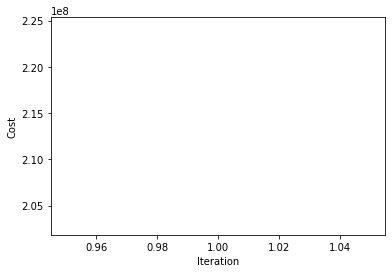

[[0.81088699 0.90930377 0.71941874 0.63626725 0.47664177 0.96454729
  1.09363454 0.39382351 1.00232841 0.69533035 0.87691432 0.7860178
  0.83579885 0.21432094 0.82002319 0.35037117 0.89439315 0.52236981
  0.1598333 ]]
1.077725232605426
-18225.90535333676
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


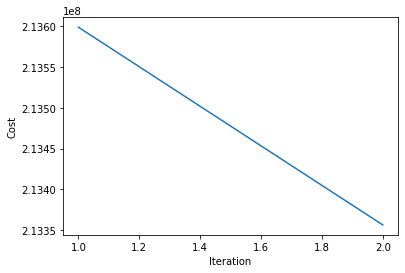

[[0.81200921 0.91451116 0.71981107 0.63696224 0.47788598 0.96618743
  1.15061301 0.39480303 1.00541691 0.69735512 0.87744312 0.78831454
  0.83791213 0.21486781 0.83372682 0.35073397 0.89505965 0.52254157
  0.16002768]]
1.6160504143264058
-18213.78290749636
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


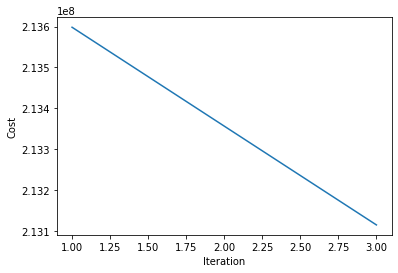

[[0.81313225 0.91974489 0.72020334 0.63765752 0.47913261 0.96782928
  1.21052015 0.39578434 1.00851287 0.69938444 0.87797188 0.79061646
  0.84002933 0.21541572 0.84765019 0.35109691 0.89572621 0.52271327
  0.16022216]]
2.1540173008782673
-18201.660289701922
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


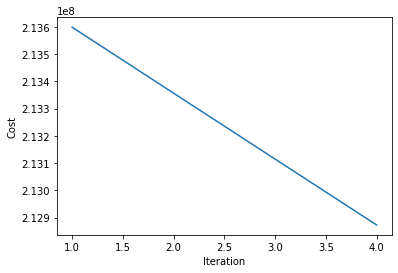

[[0.81425608 0.92500506 0.72059557 0.63835309 0.48038166 0.96947281
  1.27350441 0.39676744 1.01161629 0.70141831 0.87850061 0.79292356
  0.84215047 0.21596465 0.86179665 0.35145998 0.89639281 0.52288491
  0.16041675]]
2.6916258829963344
-18189.537358444908
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


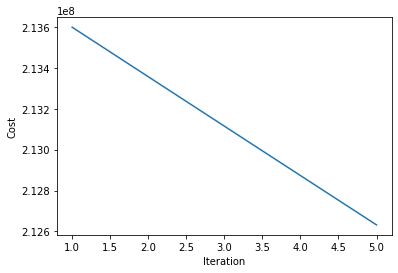

[[0.81538072 0.93029179 0.72098776 0.63904896 0.48163313 0.97111804
  1.33972162 0.39775232 1.01472718 0.70345674 0.87902931 0.79523586
  0.84427555 0.21651462 0.87616962 0.35182318 0.89705947 0.5230565
  0.16061145]]
3.2288761470265914
-18177.413965215677
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


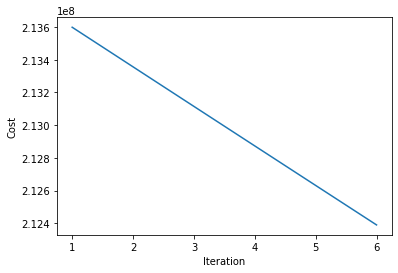

[[0.81650616 0.93560519 0.72137989 0.63974512 0.48288702 0.97276496
  1.4093354  0.39873898 1.01784556 0.70549972 0.87955797 0.79755335
  0.84640458 0.21706563 0.89077255 0.35218652 0.89772618 0.52322803
  0.16080625]]
3.7657680747086495
-18165.28995416144
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


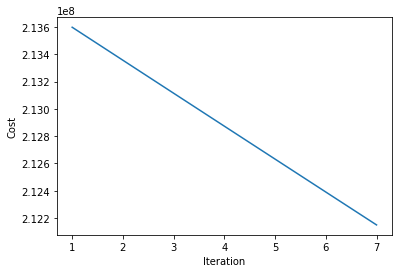

[[0.81763241 0.94094538 0.72177198 0.64044158 0.48414334 0.97441358
  1.48251754 0.39972743 1.02097144 0.70754728 0.8800866  0.79987604
  0.84853754 0.21761766 0.90560896 0.35254999 0.89839293 0.5233995
  0.16100116]]
4.30230164294808
-18153.165161726487
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


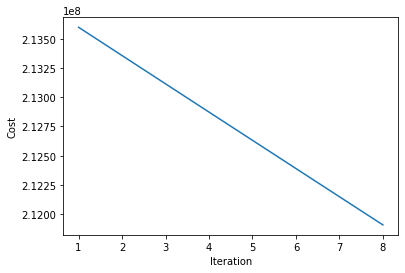

[[0.81875945 0.94631245 0.72216401 0.64113833 0.48540208 0.97606388
  1.55944835 0.40071767 1.02410482 0.7095994  0.88061519 0.80220394
  0.85067446 0.21817073 0.9206824  0.35291359 0.89905974 0.52357091
  0.16119618]]
4.8384768235776505
-18141.03941627677
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


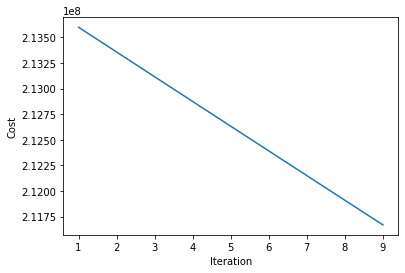

[[0.81988729 0.95170653 0.722556   0.64183537 0.48666326 0.97771588
  1.64031717 0.4017097  1.02724572 0.7116561  0.88114375 0.80453706
  0.85281532 0.21872484 0.93599648 0.35327732 0.8997266  0.52374226
  0.1613913 ]]
5.374293583106885
-18128.91253770477
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


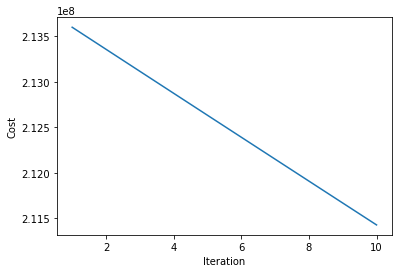

[[0.82101593 0.95712773 0.72294794 0.6425327  0.48792686 0.97936956
  1.72532272 0.40270352 1.03039414 0.71371738 0.88167227 0.80687539
  0.85496013 0.21927998 0.95155488 0.35364119 0.9003935  0.52391355
  0.16158652]]
5.909751882459399
-18116.78433701591
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


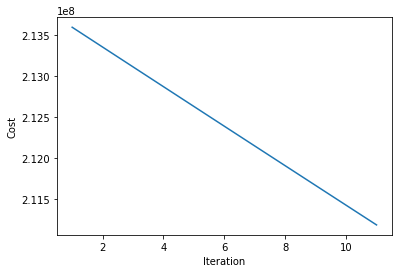

[[0.82214537 0.96257615 0.72333983 0.64323032 0.4891929  0.98102493
  1.81467362 0.40369914 1.0335501  0.71578324 0.88220075 0.80921896
  0.8571089  0.21983616 0.9673613  0.35400518 0.90106046 0.52408479
  0.16178186]]
6.444851676697437
-18104.65461589563
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


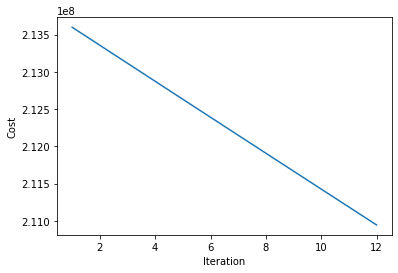

[[0.8232756  0.96805193 0.72373167 0.64392824 0.49046138 0.98268199
  1.90858885 0.40469654 1.0367136  0.7178537  0.8827292  0.81156775
  0.85926163 0.22039337 0.98341952 0.35436931 0.90172745 0.52425597
  0.16197729]]
6.979592914732973
-18092.523166254698
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


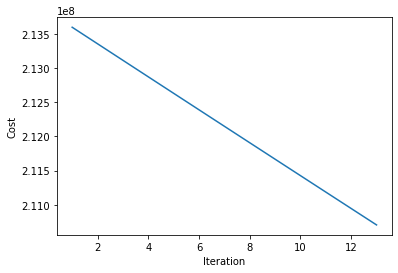

[[0.82440663 0.97355515 0.72412345 0.64462644 0.49173228 0.98434074
  2.00729825 0.40569574 1.03988466 0.71992875 0.8832576  0.81392178
  0.86141831 0.22095162 0.99973336 0.35473356 0.9023945  0.52442708
  0.16217283]]
7.513975539024747
-18080.389769753234
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


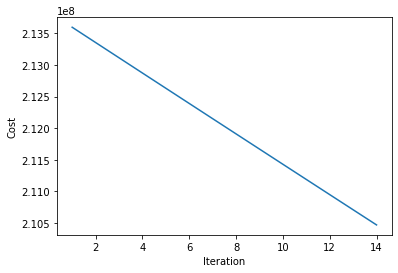

[[0.82553845 0.97908595 0.72451519 0.64532492 0.49300563 0.98600117
  2.11104307 0.40669673 1.04306328 0.72200841 0.88378597 0.81628106
  0.86357896 0.22151091 1.01630669 0.35509795 0.90306159 0.52459814
  0.16236848]]
8.047999485260542
-18068.25419730168
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


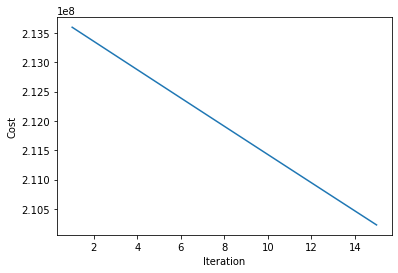

[[0.82667106 0.98464443 0.72490687 0.6460237  0.49428142 0.98766328
  2.22007653 0.40769952 1.04624948 0.72409267 0.8843143  0.81864558
  0.86574357 0.22207124 1.03314346 0.35546246 0.90372872 0.52476914
  0.16256423]]
8.58166468202402
-18056.11620853796
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


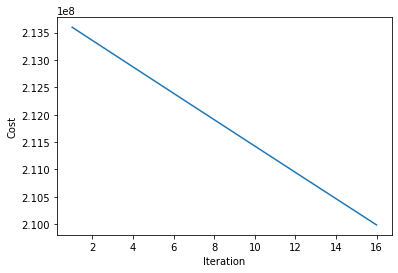

[[0.82780447 0.99023071 0.72529851 0.64672276 0.49555965 0.98932707
  2.33466436 0.40870411 1.04944326 0.72618154 0.88484259 0.82101536
  0.86791215 0.22263261 1.05024764 0.3558271  0.9043959  0.52494008
  0.16276008]]
9.114971050445353
-18043.97555127949
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


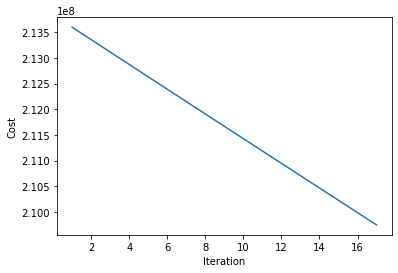

[[0.82893866 0.99584491 0.72569009 0.64742211 0.49684032 0.99099255
  2.45508548 0.40971049 1.05264463 0.72827503 0.88537084 0.8233904
  0.87008469 0.22319502 1.06762329 0.35619187 0.90506313 0.52511096
  0.16295604]]
9.647918503834893
-18031.831960949115
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


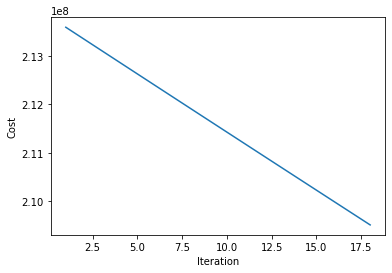

[[0.83007365 1.00148713 0.72608161 0.64812174 0.49812343 0.99265971
  2.58163256 0.41071868 1.05585361 0.73037314 0.88589905 0.8257707
  0.87226121 0.22375847 1.08527451 0.35655677 0.90573039 0.52528178
  0.16315211]]
10.180506947299039
-18019.685159973094
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


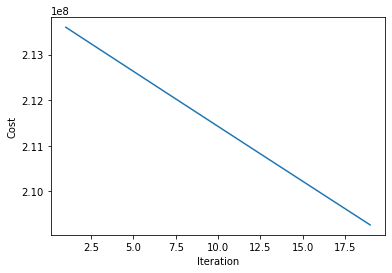

[[0.83120942 1.00715749 0.72647309 0.64882165 0.499409   0.99432854
  2.71461278 0.41172866 1.0590702  0.73247588 0.88642722 0.82815628
  0.8744417  0.22432296 1.10320547 0.3569218  0.9063977  0.52545254
  0.16334827]]
10.712736277337495
-18007.53485715096
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


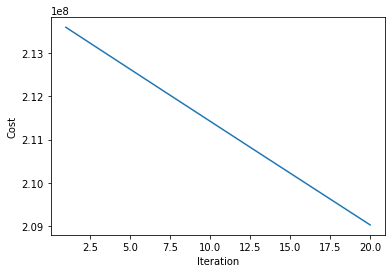

[[0.83234598 1.0128561  0.72686451 0.64952185 0.50069701 0.99599905
  2.85434845 0.41274044 1.06229441 0.73458324 0.88695534 0.83054714
  0.87662617 0.22488849 1.12142037 0.35728696 0.90706504 0.52562325
  0.16354454]]
11.244606381420988
-17995.38074699491
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


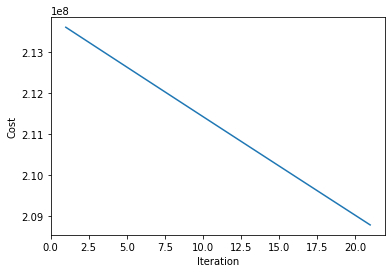

[[0.83348332 1.01858309 0.72725588 0.65022233 0.50198747 0.99767124
  3.00117779 0.41375402 1.06552625 0.73669524 0.88748342 0.83294327
  0.87881461 0.22545507 1.13992351 0.35765224 0.90773243 0.52579389
  0.16374091]]
11.77611713754854
-17983.22250903763
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


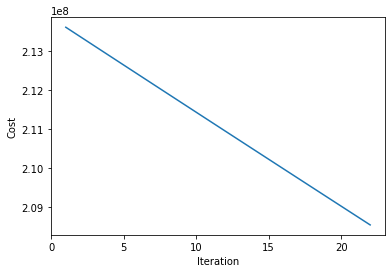

[[0.83462145 1.02433857 0.72764719 0.65092309 0.50328038 0.99934511
  3.1554557  0.41476941 1.06876573 0.73881188 0.88801146 0.8353447
  0.88100704 0.22602269 1.15871923 0.35801764 0.90839986 0.52596447
  0.16393739]]
12.307268413783317
-17971.0598071077
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


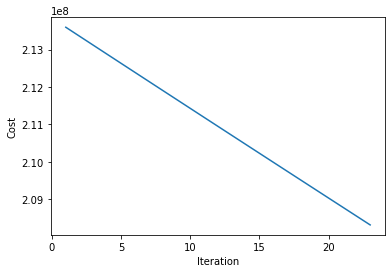

[[0.83576036 1.03012264 0.72803845 0.65162413 0.50457574 1.00102064
  3.31755457 0.41578659 1.07201286 0.74093317 0.88853946 0.83775141
  0.88320344 0.22659135 1.17781193 0.35838318 0.90906732 0.52613499
  0.16413397]]
12.838060067766007
-17958.89228856943
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


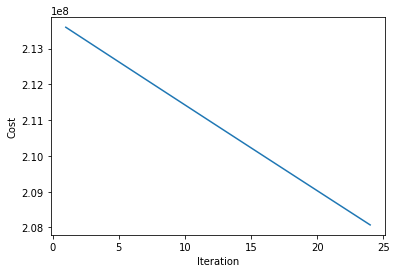

[[0.83690005 1.03593544 0.72842966 0.65232546 0.50587356 1.00269785
  3.48786509 0.41680558 1.07526764 0.7430591  0.88906741 0.84016343
  0.88540383 0.22716106 1.19720607 0.35874883 0.90973483 0.52630545
  0.16433065]]
13.368491946204717
-17946.719583527974
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


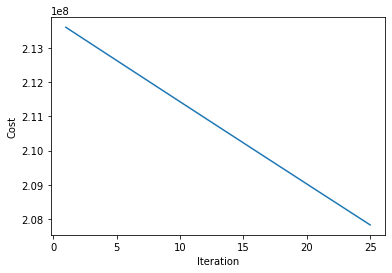

[[0.83804052 1.04177707 0.72882081 0.65302706 0.50717383 1.00437673
  3.66679721 0.41782638 1.0785301  0.74518969 0.88959532 0.84258074
  0.88760821 0.22773181 1.21690618 0.35911462 0.91040237 0.52647585
  0.16452743]]
13.89856388434021
-17934.541303995305
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


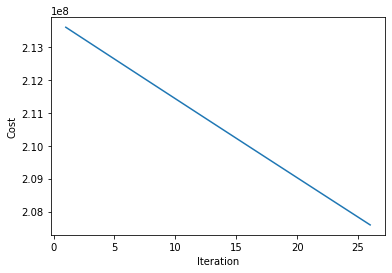

[[0.83918177 1.04764765 0.7292119  0.65372893 0.50847656 1.00605727
  3.85478098 0.41884898 1.08180023 0.74732493 0.89012318 0.84500337
  0.88981657 0.22830361 1.23691686 0.35948052 0.91106994 0.52664619
  0.16472431]]
14.428275705385346
-17922.357043017513
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


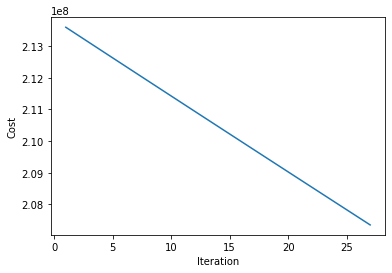

[[0.84032379 1.05354729 0.72960294 0.65443109 0.50978174 1.00773949
  4.05226759 0.41987338 1.08507804 0.74946484 0.890651   0.84743131
  0.89202892 0.22887646 1.25724275 0.35984655 0.91173755 0.52681647
  0.1649213 ]]
14.95762721993751
-17910.166373760334
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


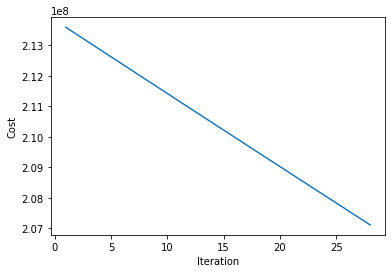

[[0.84146659 1.05947612 0.72999392 0.65513351 0.51108939 1.00942337
  4.25973038 0.42089959 1.08836354 0.75160941 0.89117877 0.84986457
  0.89424525 0.22945035 1.27788858 0.36021271 0.9124052  0.52698669
  0.16511838]]
15.486618225362724
-17897.96884855175
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


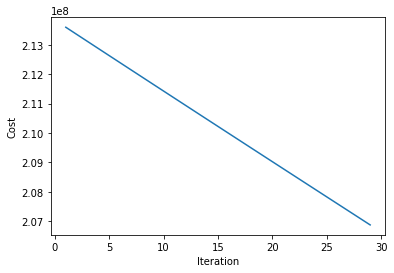

[[0.84261017 1.06543425 0.73038484 0.65583622 0.51239949 1.01110891
  4.47766586 0.42192761 1.09165675 0.75375865 0.89170649 0.85230315
  0.89646559 0.23002528 1.29885914 0.36057898 0.91307288 0.52715685
  0.16531557]]
16.015248505150108
-17885.763997878475
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


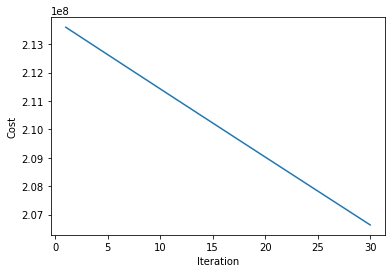

[[0.84375451 1.07142179 0.73077571 0.65653919 0.51371206 1.01279611
  4.7065949  0.42295744 1.09495767 0.75591257 0.89223417 0.85474705
  0.89868991 0.23060127 1.32015928 0.36094538 0.91374059 0.52732694
  0.16551286]]
16.543517828235334
-17873.551329336613
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


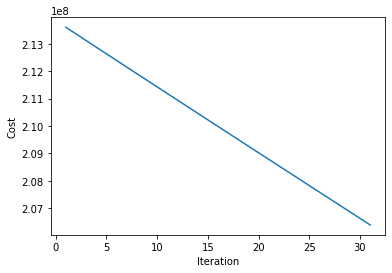

[[0.84489963 1.07743886 0.73116652 0.65724244 0.51502709 1.01448498
  4.94706382 0.42398907 1.0982663  0.75807116 0.89276179 0.85719629
  0.90091823 0.2311783  1.34179392 0.3613119  0.91440833 0.52749698
  0.16571025]]
17.07142594829153
-17861.330326530748
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


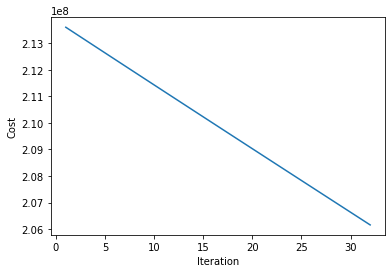

[[0.84604552 1.08348559 0.73155726 0.65794596 0.51634458 1.0161755
  5.1996457  0.42502251 1.10158266 0.76023444 0.89328937 0.85965087
  0.90315054 0.23175638 1.36376804 0.36167854 0.9150761  0.52766695
  0.16590774]]
17.598972602986176
-17849.100447923076
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


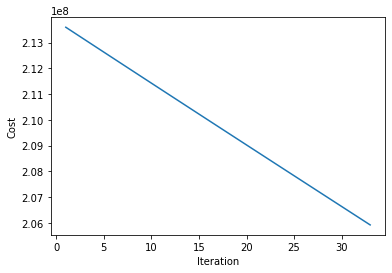

[[0.84719217 1.08956207 0.73194795 0.65864975 0.51766454 1.01786767
  5.46494159 0.42605776 1.10490675 0.7624024  0.89381689 0.86211078
  0.90538685 0.2323355  1.38608672 0.3620453  0.9157439  0.52783686
  0.16610533]]
18.12615751320233
-17836.861125626878
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


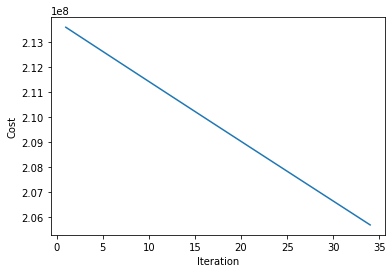

[[0.84833959 1.09566844 0.73233858 0.65935381 0.51898697 1.01956151
  5.7435819  0.42709482 1.10823858 0.76457505 0.89434437 0.86457604
  0.90762716 0.23291568 1.40875508 0.36241218 0.91641173 0.52800671
  0.16630301]]
18.65298038222257
-17824.611764144516
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


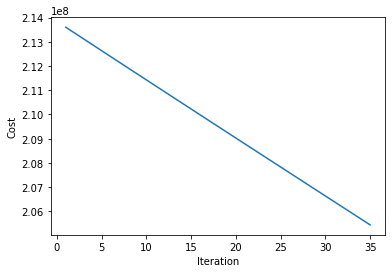

[[0.84948778 1.10180481 0.73272915 0.66005814 0.52031185 1.02125699
  6.03622778 0.42813369 1.11157817 0.7667524  0.89487179 0.86704665
  0.90987147 0.2334969  1.43177831 0.36277918 0.91707959 0.5281765
  0.1665008 ]]
19.17944089487383
-17812.351739044814
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


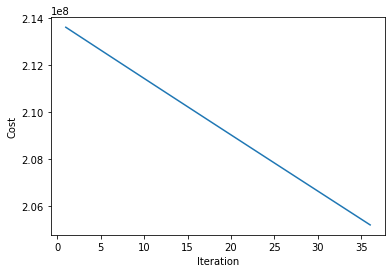

[[0.85063672 1.1079713  0.73311966 0.66076273 0.52163921 1.02295412
  6.34357262 0.42917436 1.1149255  0.76893444 0.89539916 0.86952262
  0.91211977 0.23407918 1.45516169 0.3631463  0.91774748 0.52834622
  0.16669869]]
19.705538716631374
-17800.080395579887
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


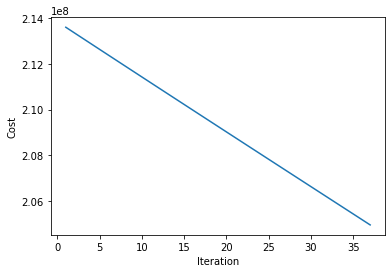

[[0.85178643 1.11416802 0.73351011 0.66146759 0.52296904 1.0246529
  6.66634356 0.43021685 1.1182806  0.77112118 0.89592648 0.87200394
  0.91437208 0.2346625  1.47891055 0.36351354 0.91841538 0.52851589
  0.16689667]]
20.23127349267991
-17787.79704723607
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


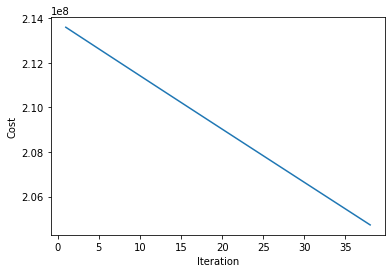

[[0.85293689 1.12039508 0.73390049 0.66217272 0.52430133 1.02635333
  7.00530312 0.43126115 1.12164347 0.77331262 0.89645374 0.87449062
  0.91662839 0.23524687 1.50303033 0.36388089 0.91908332 0.52868548
  0.16709475]]
20.756644846929934
-17775.500974217848
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


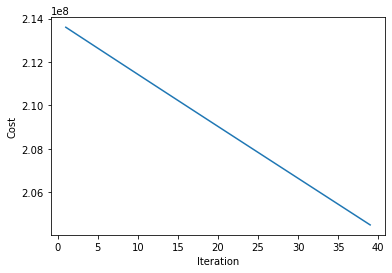

[[0.85408811 1.12665262 0.73429081 0.6628781  0.52563609 1.02805539
  7.36125088 0.43230725 1.12501412 0.77550877 0.89698095 0.87698266
  0.9188887  0.23583229 1.5275265  0.36424836 0.91975127 0.52885502
  0.16729293]]
21.281652380987108
-17763.191421860014
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


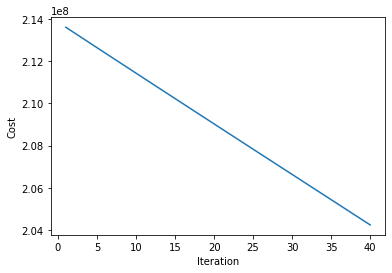

[[0.85524008 1.13294074 0.73468107 0.66358375 0.52697332 1.0297591
  7.73502527 0.43335517 1.12839255 0.77770963 0.8975081  0.87948007
  0.92115301 0.23641876 1.55240464 0.36461595 0.92041925 0.52902449
  0.16749121]]
21.806295673072583
-17750.86759896714
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


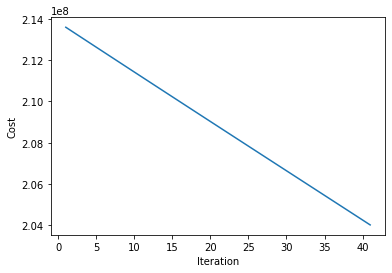

[[0.85639281 1.13925955 0.73507127 0.66428966 0.52831302 1.03146444
  8.1275054  0.4344049  1.13177877 0.77991519 0.8980352  0.88198286
  0.92342132 0.23700629 1.57767038 0.36498365 0.92108725 0.5291939
  0.16768959]]
22.330574276891916
-17738.528676074486
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


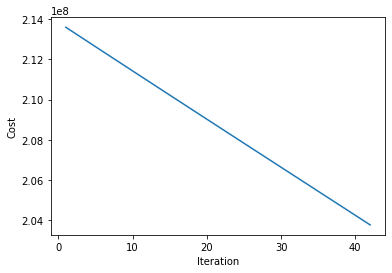

[[0.85754628 1.14560919 0.7354614  0.66499582 0.5296552  1.03317142
  8.53961299 0.43545643 1.13517279 0.78212548 0.89856224 0.88449102
  0.92569364 0.23759486 1.60332944 0.36535147 0.92175527 0.52936325
  0.16788806]]
22.854487720450212
-17726.17378362888
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


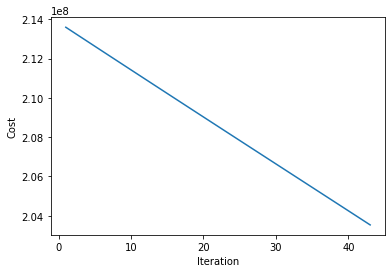

[[0.8587005  1.15198976 0.73585146 0.66570225 0.53099984 1.03488003
  8.9723144  0.43650978 1.13857461 0.78434048 0.89908921 0.88700455
  0.92796995 0.23818448 1.62938762 0.3657194  0.9224233  0.52953253
  0.16808663]]
23.378035504811006
-17713.802010084542
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


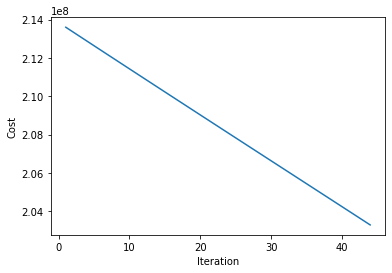

[[0.85985547 1.15840137 0.73624146 0.66640893 0.53234695 1.03659027
  9.42662278 0.43756494 1.14198424 0.7865602  0.89961613 0.88952346
  0.93025027 0.23877515 1.65585079 0.36608744 0.92309136 0.52970175
  0.16828529]]
23.901217102796238
-17701.412399910943
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


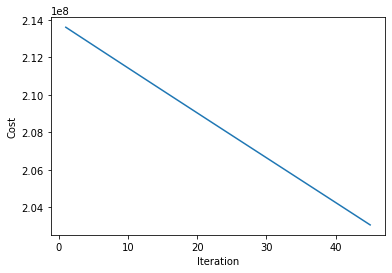

[[0.86101118 1.16484416 0.73663139 0.66711586 0.53369654 1.03830213
  9.90360023 0.4386219  1.14540168 0.78878464 0.90014299 0.89204776
  0.93253459 0.23936687 1.6827249  0.36645559 0.92375942 0.5298709
  0.16848405]]
24.424031957624656
-17689.003951508712
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


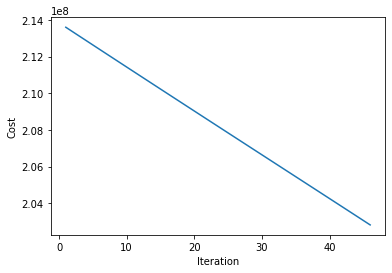

[[ 0.86216763  1.17131822  0.73702125  0.66782305  0.53504859  1.04001562
  10.40436017  0.43968067  1.14882694  0.7910138   0.90066979  0.89457744
   0.93482291  0.23995964  1.71001598  0.36682386  0.9244275   0.53003999
   0.1686829 ]]
24.946479481485756
-17676.575615028978
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


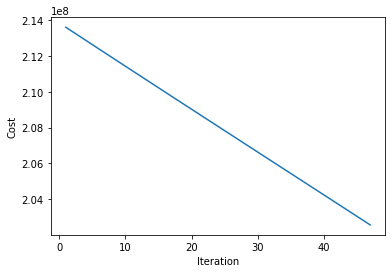

[[ 0.86332482  1.17782368  0.73741105  0.66853049  0.53640312  1.04173073
  10.93006973  0.44074126  1.15226002  0.7932477   0.90119652  0.89711251
   0.93711523  0.24055346  1.73773015  0.36719223  0.9250956   0.53020901
   0.16888185]]
25.46855905404629
-17664.12629009184
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


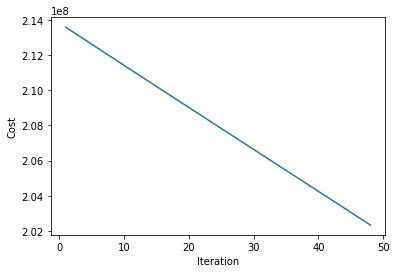

[[ 0.86448274  1.18436065  0.73780078  0.66923817  0.53776012  1.04344745
  11.48195233  0.44180365  1.15570093  0.79548631  0.90172319  0.89965297
   0.93941155  0.24114832  1.7658736   0.36756072  0.9257637   0.53037796
   0.16908089]]
25.99027002088625
-17651.65482340055
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


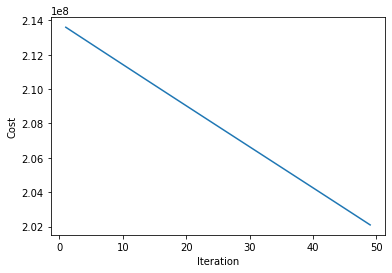

[[ 0.8656414   1.19092926  0.73819043  0.66994611  0.53911958  1.04516578
  12.06129028  0.44286784  1.15914968  0.79772966  0.9022498   0.90219882
   0.94171186  0.24174424  1.7944526   0.36792932  0.92643181  0.53054686
   0.16928003]]
26.511611691861113
-17639.160006245544
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


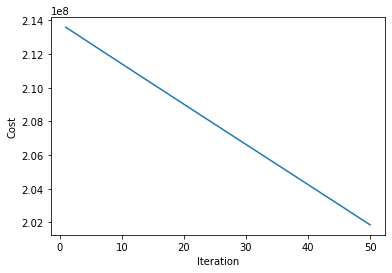

[[ 0.86680078  1.1975296   0.73858002  0.67065429  0.54048152  1.04688572
  12.66942761  0.44393385  1.16260626  0.79997773  0.90277633  0.90475006
   0.94401617  0.24234121  1.82347351  0.36829802  0.92709993  0.53071568
   0.16947926]]
27.032583339386886
-17626.64057189377
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


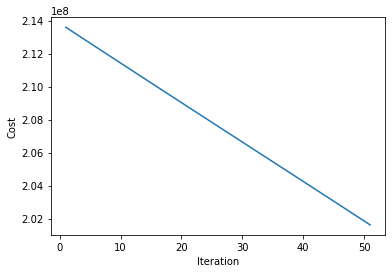

[[ 0.8679609   1.2041618   0.73896953  0.67136271  0.54184592  1.04860726
  13.30777292  0.44500165  1.16607068  0.80223054  0.9033028   0.9073067
   0.94632448  0.24293922  1.85294277  0.36866683  0.92776806  0.53088444
   0.16967858]]
27.553184196644505
-17614.09519285964
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


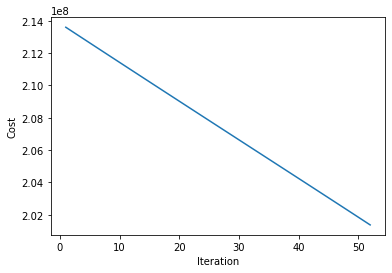

[[ 0.86912173  1.21082597  0.73935897  0.67207138  0.54321279  1.05033041
  13.97780247  0.44607127  1.16954294  0.80448808  0.9038292   0.90986873
   0.94863678  0.24353828  1.88286692  0.36903574  0.92843619  0.53105313
   0.16987799]]
28.073413455699864
-17601.522478049697
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


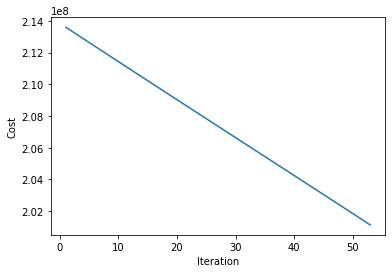

[[ 0.87028329  1.21752223  0.73974834  0.67278029  0.54458213  1.05205515
  14.68106332  0.44714268  1.17302305  0.80675035  0.90435553  0.91243615
   0.95095306  0.24413839  1.91325256  0.36940476  0.92910433  0.53122176
   0.1700775 ]]
28.59327026553561
-17588.92096977842
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


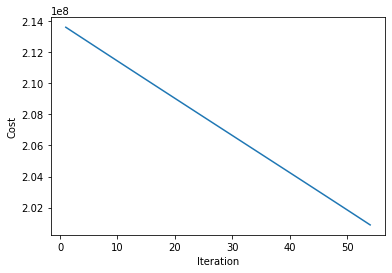

[[ 0.87144556  1.22425068  0.74013763  0.67348943  0.54595394  1.05378148
  15.41917663  0.4482159   1.17651101  0.80901735  0.90488179  0.91500897
   0.95327334  0.24473955  1.94410638  0.36977389  0.92977246  0.53139031
   0.17027709]]
29.11275372999073
-17576.28914064761
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


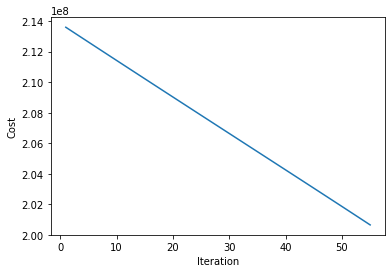

[[ 0.87260855  1.23101144  0.74052685  0.67419881  0.54732821  1.0555094
  16.19384119  0.44929092  1.18000682  0.81128908  0.90540798  0.91758719
   0.9555976   0.24534175  1.97543518  0.37014311  0.93044059  0.5315588
   0.17047678]]
29.631862905603697
-17563.625390284316
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


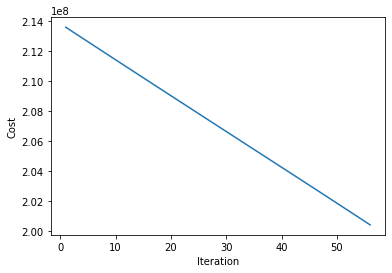

[[ 0.87377224  1.23780462  0.74091599  0.67490843  0.54870494  1.0572389
  17.006837    0.45036774  1.18351048  0.81356555  0.90593409  0.9201708
   0.95792585  0.245945    2.00724581  0.37051244  0.93110872  0.53172722
   0.17067655]]
30.150596799354886
-17550.928041931147
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


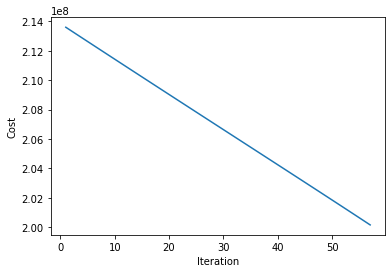

[[ 0.87493665  1.24463033  0.74130505  0.67561827  0.55008414  1.05896998
  17.86002903  0.45144635  1.18702199  0.81584675  0.90646013  0.9227598
   0.96025807  0.24654929  2.03954525  0.37088187  0.93177685  0.53189557
   0.17087642]]
30.668954366303602
-17538.195338882353
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


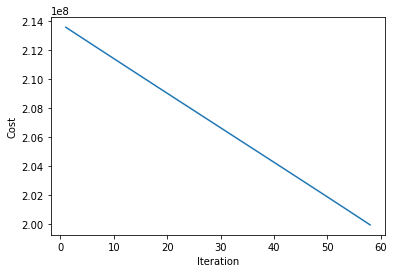

[[ 0.87610175  1.25148869  0.74169403  0.67632835  0.55146579  1.06070263
  18.75537126  0.45252677  1.19054136  0.81813268  0.90698608  0.9253542
   0.96259427  0.24715463  2.07234054  0.37125139  0.93244496  0.53206386
   0.17107637]]
31.186934507115062
-17525.425440759485
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


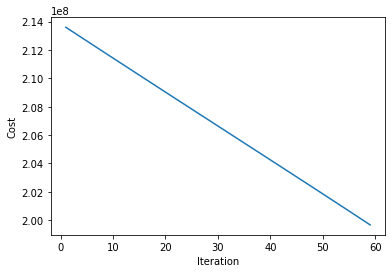

[[ 0.87726756  1.2583798   0.74208293  0.67703865  0.55284991  1.06243685
  19.69491076  0.45360897  1.19406859  0.82042334  0.90751196  0.92795399
   0.96493445  0.247761    2.10563881  0.37162102  0.93311307  0.53223207
   0.17127641]]
31.70453606547234
-17512.616419619102
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


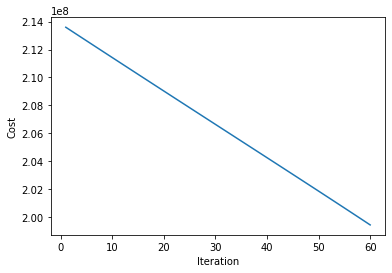

[[ 0.87843406  1.26530376  0.74247175  0.67774918  0.55423647  1.06417263
  20.68079201  0.45469297  1.19760366  0.82271872  0.90803776  0.93055918
   0.96727859  0.24836842  2.13944729  0.37199074  0.93378117  0.53240021
   0.17147654]]
32.22175782536812
-17499.766255887003
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


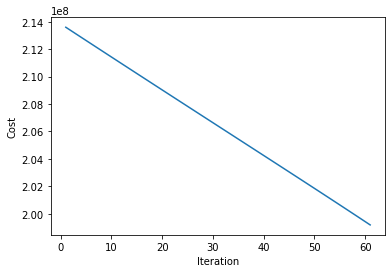

[[ 0.87960124  1.2722607   0.74286049  0.67845993  0.5556255   1.06590996
  21.71526143  0.45577876  1.2011466   0.82501884  0.90856347  0.93316975
   0.96962669  0.24897688  2.17377329  0.37236056  0.93444925  0.53256828
   0.17167675]]
32.73859850827092
-17486.87283410965
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


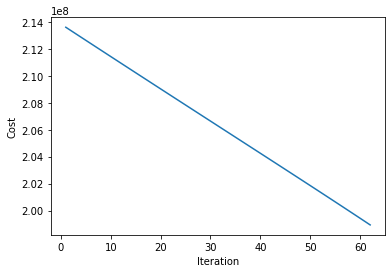

[[ 0.88076912  1.27925071  0.74324915  0.67917089  0.55701697  1.06764884
  22.80067212  0.45686633  1.20469738  0.82732367  0.9090891   0.93578571
   0.97197875  0.24958638  2.20862423  0.37273047  0.93511731  0.53273628
   0.17187705]]
33.25505677016011
-17473.93393851708
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


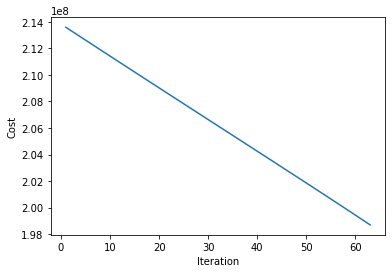

[[ 0.88193768  1.2862739   0.74363771  0.67988208  0.55841089  1.06938927
  23.93948872  0.45795569  1.20825601  0.82963323  0.90961464  0.93840706
   0.97433477  0.25019692  2.24400759  0.37310047  0.93578536  0.53290421
   0.17207743]]
33.771131198423994
-17460.947248387514
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


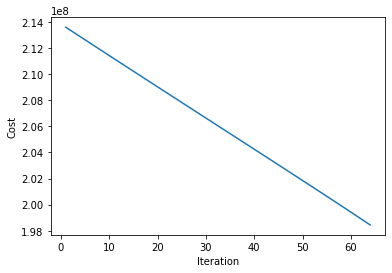

[[ 0.88310691  1.29333038  0.74402619  0.68059347  0.55980726  1.07113123
  25.13429262  0.45904684  1.21182249  0.83194751  0.91014009  0.94103378
   0.97669473  0.2508085   2.27993098  0.37347056  0.93645338  0.53307207
   0.1722779 ]]
34.286820308614814
-17447.91033320811
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


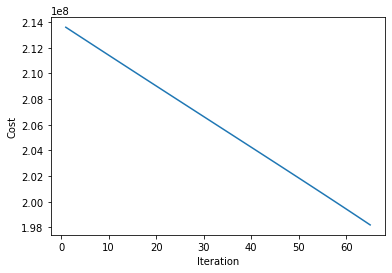

[[ 0.88427682  1.30042025  0.74441459  0.68130508  0.56120606  1.07287471
  26.38778729  0.46013976  1.21539682  0.8342665   0.91066546  0.94366588
   0.97905864  0.2514211   2.31640206  0.37384075  0.93712138  0.53323985
   0.17247845]]
34.8021225410544
-17434.820647620334
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


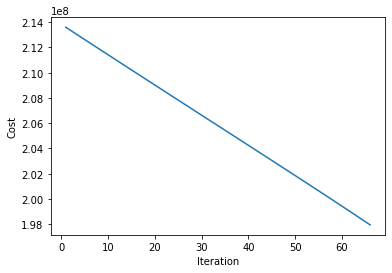

[[ 0.88544739  1.3075436   0.74480289  0.68201689  0.56260731  1.07461972
  27.7028039   0.46123446  1.21897898  0.8365902   0.91119073  0.94630335
   0.98142647  0.25203475  2.35342862  0.37421102  0.93778935  0.53340756
   0.17267908]]
35.31703625728386
-17421.67552614427
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


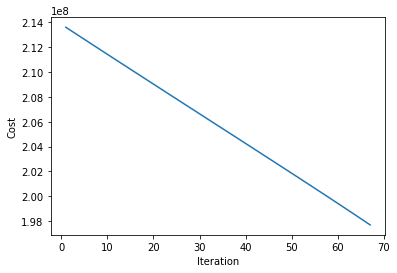

[[ 0.88661862  1.31470055  0.7451911   0.68272891  0.56401099  1.07636624
  29.08230714  0.46233093  1.22256898  0.83891861  0.9117159   0.94894619
   0.98379824  0.25264942  2.39101853  0.37458137  0.93845729  0.53357519
   0.1728798 ]]
35.83155973635048
-17408.472177670614
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


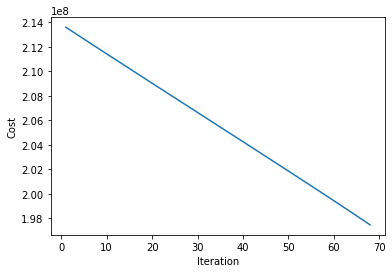

[[ 0.88779051  1.32189119  0.74557922  0.68344113  0.5654171   1.07811427
  30.52940138  0.46342917  1.22616681  0.84125172  0.91224098  0.95159439
   0.98617393  0.25326512  2.42917973  0.37495181  0.9391252   0.53374275
   0.17308059]]
36.345691170924745
-17395.207679712476
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


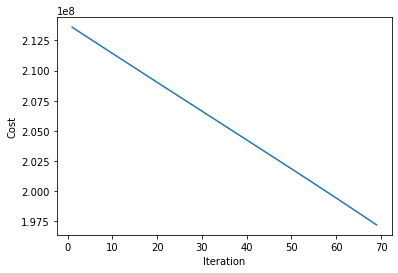

[[ 0.88896305  1.32911562  0.74596724  0.68415354  0.56682563  1.0798638
  32.047337    0.46452917  1.22977246  0.84358952  0.91276595  0.95424795
   0.98855353  0.25388186  2.46792029  0.37532233  0.93979307  0.53391023
   0.17328146]]
36.859428663240074
-17381.878972406823
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


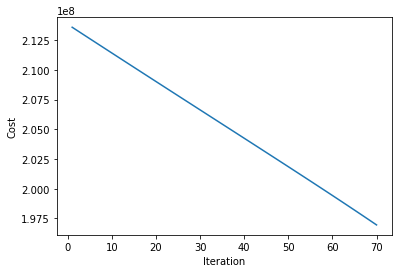

[[ 0.89013624  1.33637393  0.74635516  0.68486615  0.56823659  1.08161481
  33.63951703  0.46563094  1.23338593  0.84593202  0.91329083  0.95690685
   0.99093703  0.25449961  2.50724835  0.37569294  0.9404609   0.53407764
   0.17348242]]
37.372770220847535
-17368.48285225588
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


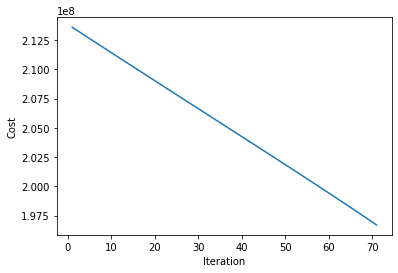

[[ 0.89131006  1.34366622  0.74674298  0.68557894  0.56964996  1.08336731
  35.3095041   0.46673446  1.23700721  0.8482792   0.91381559  0.9595711
   0.99332443  0.25511839  2.54717215  0.37606362  0.94112869  0.53424497
   0.17368344]]
37.88571375217764
-17355.01596559802
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


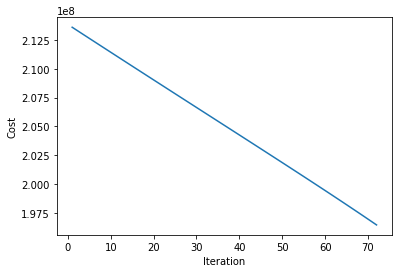

[[ 0.89248451  1.35099259  0.74713071  0.68629193  0.57106574  1.08512127
  37.06102768  0.46783974  1.24063628  0.85063105  0.91434025  0.96224068
   0.99571571  0.25573819  2.58770003  0.37643437  0.94179643  0.53441222
   0.17388455]]
38.39825706190085
-17341.474801799097
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


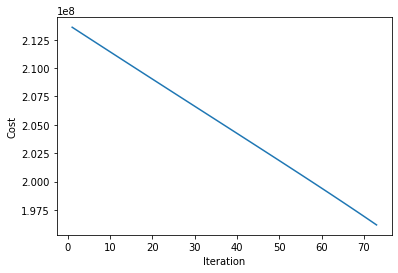

[[ 0.89365958  1.35835311  0.74751833  0.68700509  0.57248393  1.08687669
  38.89799158  0.46894676  1.24427314  0.85298757  0.9148648   0.96491558
   0.99811086  0.25635901  2.6288404   0.37680521  0.94246412  0.53457939
   0.17408573]]
38.91039784607825
-17327.855686150757
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


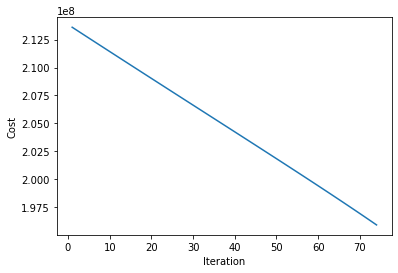

[[ 0.89483528  1.36574789  0.74790584  0.68771843  0.57390451  1.08863357
  40.82448182  0.47005553  1.24791778  0.85534876  0.91538924  0.9675958
   1.00050988  0.25698084  2.6706018   0.37717611  0.94313175  0.53474649
   0.17428698]]
39.42213368709335
-17314.15477246823
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


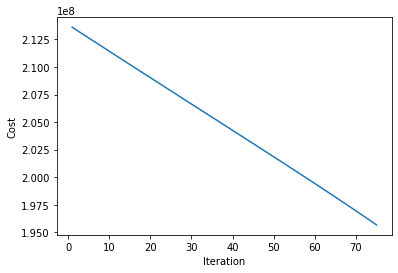

[[ 0.89601158  1.373177    0.74829325  0.68843194  0.57532748  1.09039188
  42.84477485  0.47116603  1.25157019  0.85771459  0.91591355  0.97028133
   1.00291275  0.25760369  2.71299283  0.37754708  0.94379932  0.5349135
   0.1744883 ]]
39.933462048355906
-17300.368035373205
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


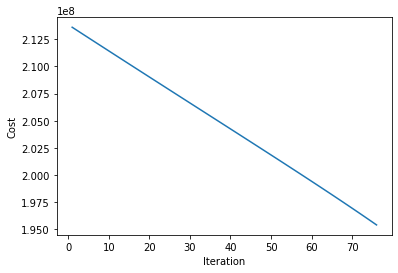

[[ 0.89718848  1.38064053  0.74868054  0.68914562  0.57675284  1.09215162
  44.96334601  0.47227826  1.25523034  0.86008506  0.91643775  0.97297214
   1.00531946  0.25822754  2.7560222   0.37791812  0.94446684  0.53508043
   0.1746897 ]]
40.444380268767986
-17286.491262252162
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


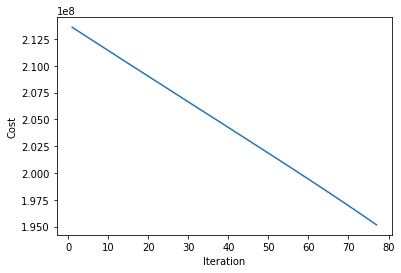

[[ 0.89836598  1.38813857  0.74906773  0.68985946  0.57818057  1.09391277
  47.18487849  0.47339222  1.25889823  0.86246017  0.91696182  0.97566824
   1.00773     0.2588524   2.79969871  0.37828922  0.94513428  0.53524728
   0.17489116]]
40.95488555694242
-17272.520044877645
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


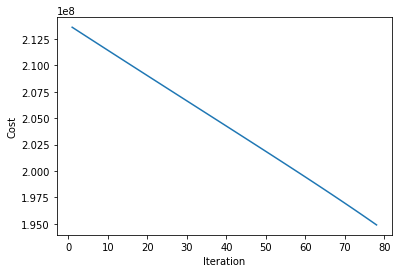

[[ 0.89954406  1.39567118  0.7494548   0.69057345  0.57961068  1.09567533
  49.51427256  0.47450789  1.26257385  0.86483989  0.91748577  0.97836961
   1.01014434  0.25947826  2.84403125  0.37866039  0.94580165  0.53541404
   0.1750927 ]]
41.46497498516331
-17258.449770680814
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


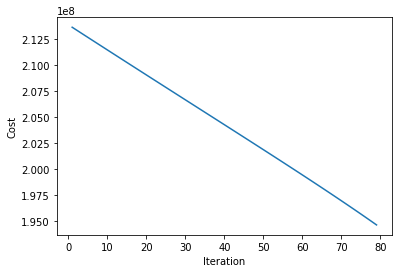

[[ 0.90072271  1.40323845  0.74984175  0.69128761  0.58104314  1.09743927
  51.95665517  0.47562528  1.26625717  0.86722422  0.91800958  0.98107623
   1.01256248  0.26010512  2.8890288   0.37903161  0.94646894  0.53558072
   0.1752943 ]]
41.974645483077865
-17244.275613662106
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


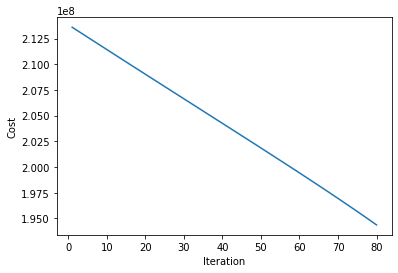

[[ 0.90190194  1.41084044  0.75022858  0.6920019   0.58247795  1.0992046
  54.51739003  0.47674437  1.26994817  0.86961314  0.91853326  0.98378809
   1.01498441  0.26073297  2.93470042  0.3794029   0.94713616  0.53574731
   0.17549596]]
42.48389383110862
-17229.992524928533
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


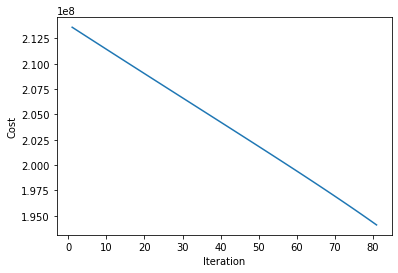

[[ 0.90308172  1.41847724  0.75061528  0.69271634  0.58391511  1.10097128
  57.20208804  0.47786515  1.27364684  0.87200665  0.9190568   0.98650518
   1.0174101   0.26136182  2.98105529  0.37977423  0.94780328  0.53591381
   0.17569769]]
42.99271665357447
-17215.595222844484
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


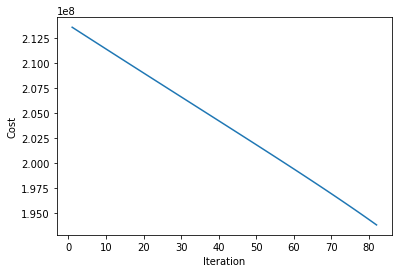

[[ 0.90426205  1.42614889  0.75100186  0.69343091  0.58535459  1.10273932
  60.0166181   0.47898762  1.27735315  0.87440471  0.9195802   0.98922747
   1.01983953  0.26199164  3.02810264  0.38014561  0.94847031  0.53608023
   0.17589948]]
43.50111041150889
-17201.07818278355
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


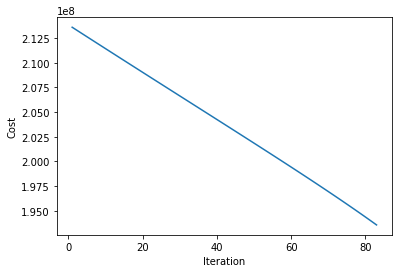

[[ 0.90544291  1.43385547  0.75138831  0.69414561  0.5867964   1.10450868
  62.96711849  0.48011177  1.28106709  0.87680733  0.92010345  0.99195495
   1.02227269  0.26262245  3.07585182  0.38051704  0.94913724  0.53624655
   0.17610133]]
44.00907139516298
-17186.435626467064
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


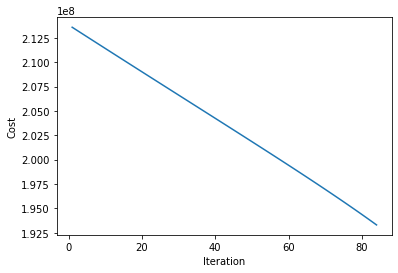

[[ 0.9066243   1.44159704  0.75177462  0.69486043  0.58824051  1.10627936
  66.06000853  0.48123759  1.28478862  0.87921447  0.92062655  0.9946876
   1.02470957  0.26325423  3.12431225  0.38088852  0.94980407  0.53641279
   0.17630324]]
44.51659571618087
-17171.661510877784
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


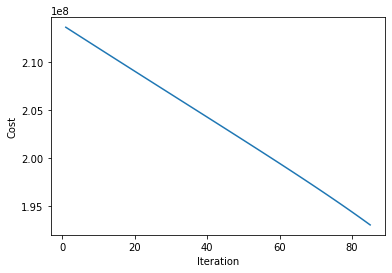

[[ 0.90780621  1.44937364  0.7521608   0.69557537  0.58968693  1.10805134
  69.30200081  0.48236508  1.28851772  0.88162613  0.92114949  0.9974254
   1.02715012  0.26388699  3.17349343  0.38126003  0.95047079  0.53657893
   0.1765052 ]]
45.02367929943455
-17156.749516735108
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


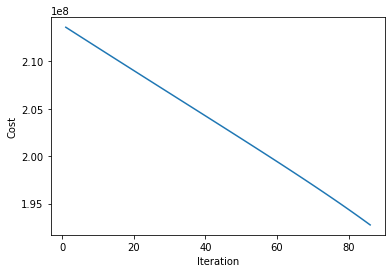

[[ 0.90898862  1.45718533  0.75254684  0.69629041  0.59113562  1.1098246
  72.70011389  0.48349421  1.29225437  0.88404228  0.92167226  1.00016832
   1.02959435  0.2645207   3.22340496  0.38163158  0.95113739  0.53674498
   0.17670722]]
45.530317874504576
-17141.69303651789
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


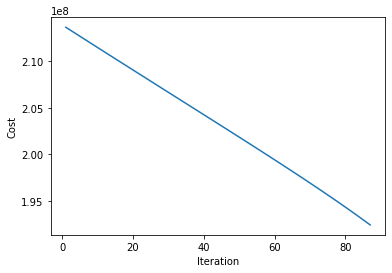

[[ 0.91017151  1.46503216  0.75293273  0.69700555  0.59258659  1.11159912
  76.26168545  0.48462498  1.29599852  0.8864629   0.92219487  1.00291635
   1.03204222  0.26515538  3.27405649  0.38200316  0.95180386  0.53691093
   0.17690928]]
46.03650696679319
-17126.485162022527
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


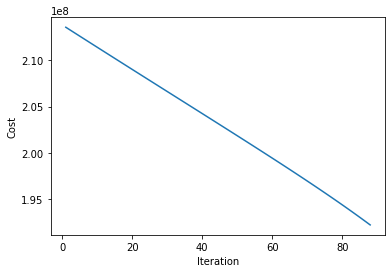

[[ 0.91135489  1.47291416  0.75331847  0.69772079  0.59403981  1.11337489
  79.99438594  0.48575737  1.29975015  0.88888797  0.92271731  1.00566946
   1.0344937   0.26579101  3.32545779  0.38237477  0.9524702   0.53707678
   0.1771114 ]]
46.54224188825546
-17111.118671442502
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


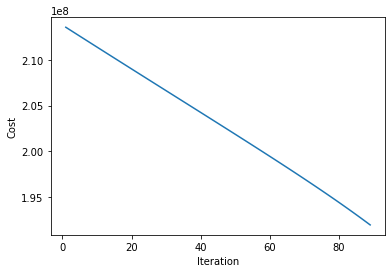

[[ 0.91253872  1.48083138  0.75370407  0.69843611  0.59549527  1.11515187
  83.90623278  0.48689139  1.30350923  0.89131747  0.92323957  1.00842761
   1.03694878  0.26642758  3.37761867  0.38274641  0.95313641  0.53724253
   0.17731357]]
47.04751772773409
-17095.586015957142
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


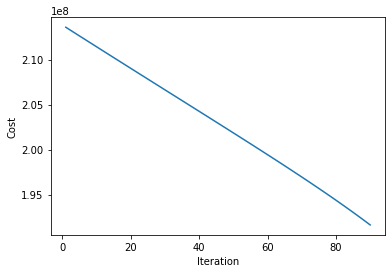

[[ 0.91372301  1.48878384  0.7540895   0.69915151  0.59695296  1.11693006
  88.00560506  0.488027    1.30727572  0.89375137  0.92376164  1.01119079
   1.03940743  0.26706509  3.43054904  0.38311806  0.95380246  0.53740819
   0.17751578]]
47.55232934088293
-17079.879305816263
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


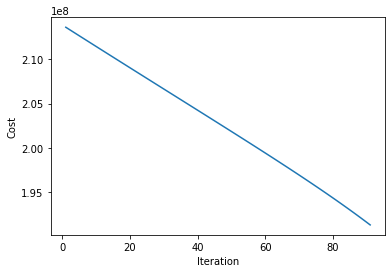

[[ 0.91490773  1.49677157  0.75447477  0.69986697  0.59841286  1.11870943
  92.30125882  0.48916421  1.31104958  0.89618964  0.92428353  1.01395897
   1.04186961  0.26770353  3.48425887  0.38348973  0.95446837  0.53757374
   0.17771803]]
48.05667133966391
-17063.99029590772
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


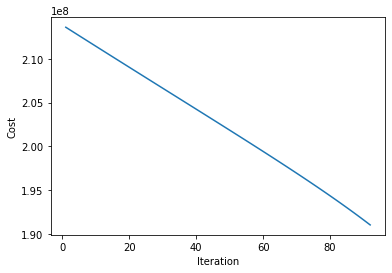

[[ 0.91609286  1.50479458  0.75485988  0.70058249  0.59987495  1.12048995
  96.80234283  0.49030299  1.31483076  0.89863227  0.92480521  1.0167321
   1.04433529  0.2683429   3.53875819  0.38386141  0.95513411  0.53773918
   0.17792032]]
48.56053808140186
-17047.910370797537
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


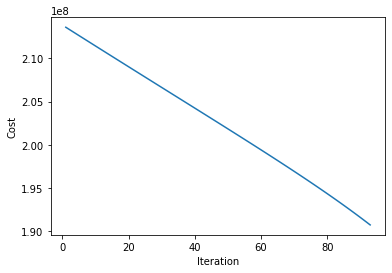

[[  0.9172784    1.5128529    0.75524481   0.70129805   0.60133921
    1.1222716  101.51841493   0.49144333   1.31861923   0.90107921
    0.9253267    1.01951017   1.04680446   0.26898318   3.5940571
    0.38423309   0.95579968   0.53790452   0.17812265]]
49.063923657381125
-17031.63052922822
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


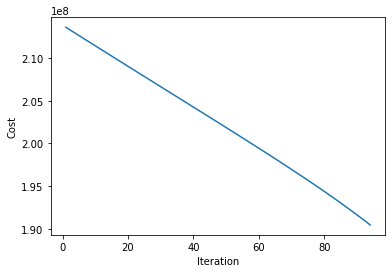

[[  0.91846433   1.52094653   0.75562957   0.70201366   0.60280563
    1.12405436 106.45945904   0.49258522   1.32241493   0.90353044
    0.92584797   1.02229313   1.04927706   0.26962437   3.65016578
    0.38460477   0.95646506   0.53806975   0.17832502]]
49.56682188096779
-17015.14136806737
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


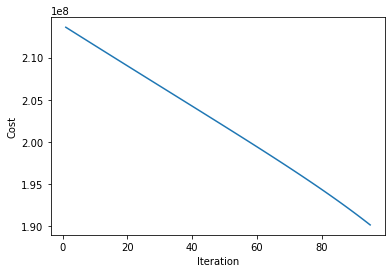

[[  0.91965062   1.52907547   0.75601415   0.70272929   0.60427418
    1.1258382  111.63590262   0.49372864   1.32621783   0.90598593
    0.92636902   1.02508095   1.05175307   0.27026645   3.70709445
    0.38497645   0.95713026   0.53823486   0.17852741]]
50.069226275240815
-16998.43306569309
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


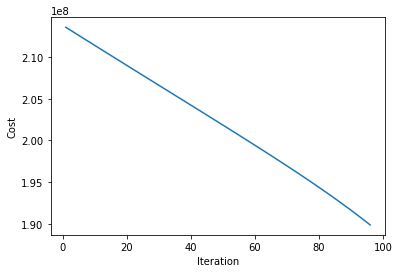

[[  0.92083726   1.53723971   0.75639854   0.70344493   0.60574484
    1.12762308 117.05863485   0.49487357   1.33002785   0.90844563
    0.92688985   1.02787358   1.05423245   0.27090942   3.76485337
    0.38534812   0.95779526   0.53839987   0.17872983]]
50.57113006011529
-16981.495364808266
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


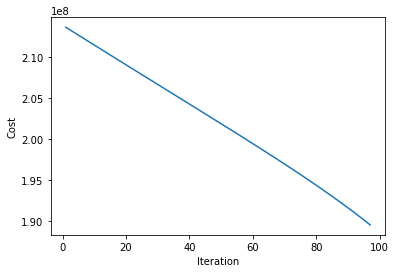

[[  0.92202423   1.54543925   0.75678273   0.70416059   0.60721758
    1.12940899 122.7390253    0.49601999   1.33384496   0.91090952
    0.92741044   1.03067099   1.05671517   0.27155327   3.82345288
    0.38571976   0.95846004   0.53856475   0.17893228]]
51.07252613894055
-16964.31755467593
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


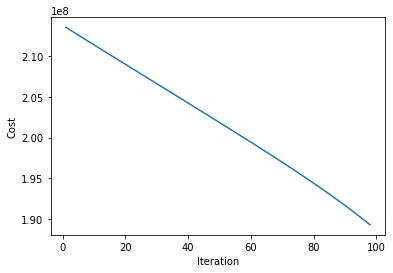

[[  0.92321151   1.55367404   0.75716673   0.70487623   0.60869239
    1.13119589 128.68894332   0.49716789   1.3376691    0.91337755
    0.92793079   1.03347312   1.05920117   0.27219799   3.88290334
    0.38609139   0.9591246    0.53872952   0.17913475]]
51.57340708455595
-16946.88845276583
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


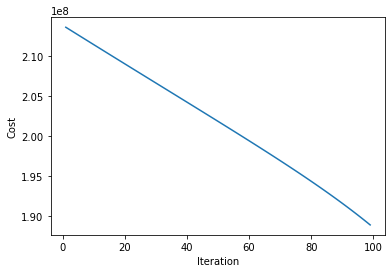

[[  0.92439907   1.56194408   0.75755052   0.70559185   0.61016924
    1.13298375 134.92077793   0.49831725   1.34150019   0.91584969
    0.92845089   1.03627995   1.06169042   0.27284356   3.94321516
    0.38646298   0.95978893   0.53889417   0.17933723]]
52.073765124786526
-16929.196385807474
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


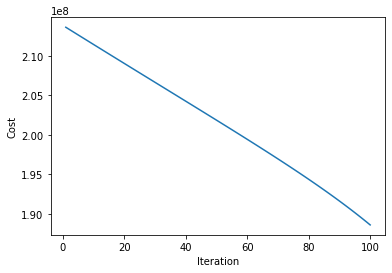

[[  0.9255869    1.57024931   0.75793409   0.70630744   0.6116481
    1.13477253 141.44745841   0.49946804   1.34533817   0.91832588
    0.92897072   1.03909141   1.06418287   0.27348998   4.00439878
    0.38683454   0.96045302   0.53905869   0.17953973]]
52.573592127361096
-16911.22917024604
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


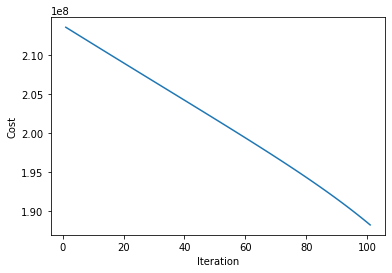

[[  0.92677498   1.57858969   0.75831745   0.70702298   0.61312895
    1.1365622  148.2824755    0.50062024   1.34918299   0.92080609
    0.92949029   1.04190745   1.06667847   0.27413723   4.06646466
    0.38720605   0.96111684   0.53922308   0.17974224]]
53.07287958423487
-16892.97409209493
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


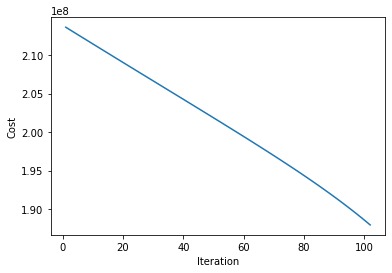

[[  0.92796327   1.58696516   0.75870058   0.70773846   0.61461175
    1.13835273 155.43990318   0.50177383   1.35303455   0.92329027
    0.93000958   1.04472803   1.06917718   0.27478529   4.1294233
    0.38757751   0.9617804    0.53938734   0.17994475]]
53.57161859529879
-16874.41788618755
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


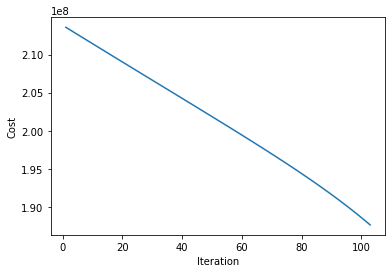

[[  0.92915175   1.59537564   0.75908347   0.70845386   0.61609647
    1.14014407 162.93442108   0.50292879   1.35689279   0.92577837
    0.93052857   1.04755308   1.07167895   0.27543417   4.19328519
    0.38794891   0.96244367   0.53955147   0.18014727]]
54.06979985145787
-16855.546714826465
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


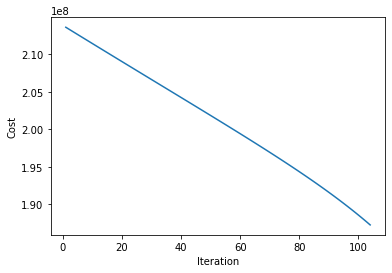

[[  0.93034041   1.60382108   0.75946612   0.70916917   0.61758309
    1.14193619 170.78133753   0.50408508   1.36075763   0.92827032
    0.93104726   1.05038254   1.07418371   0.27608383   4.25806083
    0.38832025   0.96310664   0.53971547   0.18034978]]
54.567413617060836
-16836.3461458355
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


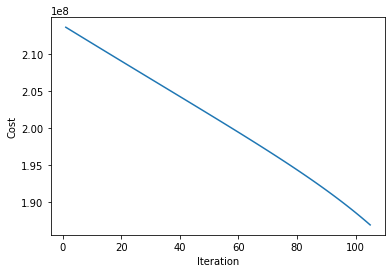

[[  0.9315292    1.61230136   0.75984852   0.70988437   0.61907156
    1.14372904 178.99661318   0.50524269   1.36462897   0.93076609
    0.93156564   1.05321635   1.07669141   0.27673427   4.32376074
    0.3886915    0.9637693    0.53987932   0.18055229]]
55.06444971166355
-16816.801130019994
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


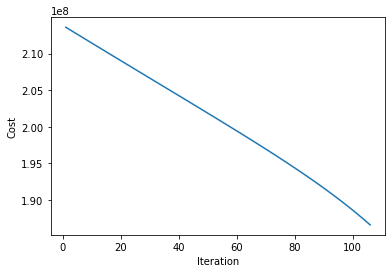

[[9.32718098e-01 1.62081639e+00 7.60230658e-01 7.10599446e-01
  6.20561853e-01 1.14552258e+00 1.87596885e+02 5.06401584e-01
  1.36850673e+00 9.33265598e-01 9.32083700e-01 1.05605444e+00
  1.07920198e+00 2.77385476e-01 4.39039540e+00 3.89062677e-01
  9.64431629e-01 5.40043026e-01 1.80754778e-01]]
55.56089749110906
-16796.89597804445
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


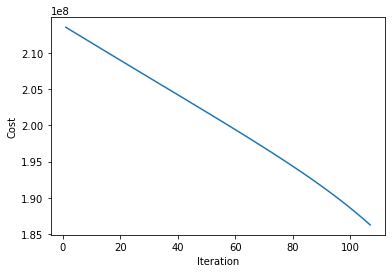

[[9.33907079e-01 1.62936606e+00 7.60612527e-01 7.11314377e-01
  6.22053930e-01 1.14731676e+00 1.96599492e+02 5.07561734e-01
  1.37239082e+00 9.35768796e-01 9.32601416e-01 1.05889674e+00
  1.08171538e+00 2.78037422e-01 4.45797529e+00 3.89433756e-01
  9.65093614e-01 5.40206586e-01 1.80957253e-01]]
56.05674582790744
-16776.61433674096
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


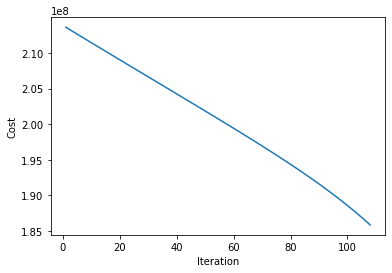

[[9.35096108e-01 1.63795023e+00 7.60994117e-01 7.12029144e-01
  6.23547752e-01 1.14911154e+00 2.06022499e+02 5.08723109e-01
  1.37628113e+00 9.38275615e-01 9.33118783e-01 1.06174318e+00
  1.08423152e+00 2.78690095e-01 4.52651085e+00 3.89804731e-01
  9.65755236e-01 5.40369993e-01 1.81159704e-01]]
56.55198309089903
-16755.939164864594
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


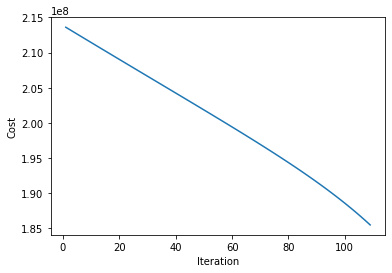

[[9.36285153e-01 1.64656877e+00 7.61375418e-01 7.12743730e-01
  6.25043277e-01 1.15090686e+00 2.15884723e+02 5.09885676e-01
  1.38017755e+00 9.40785986e-01 9.33635784e-01 1.06459368e+00
  1.08675034e+00 2.79343477e-01 4.59601247e+00 3.90175591e-01
  9.66416479e-01 5.40533244e-01 1.81362127e-01]]
57.04659712418535
-16734.85270831628
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


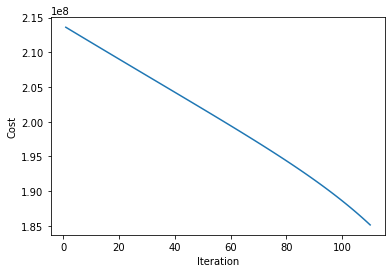

[[9.37474180e-01 1.65522152e+00 7.61756420e-01 7.13458113e-01
  6.26540461e-01 1.15270268e+00 2.26205762e+02 5.11049401e-01
  1.38407999e+00 9.43299837e-01 9.34152407e-01 1.06744816e+00
  1.08927177e+00 2.79997549e-01 4.66649052e+00 3.90546328e-01
  9.67077324e-01 5.40696335e-01 1.81564516e-01]]
57.540575225312786
-16713.33647485922
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


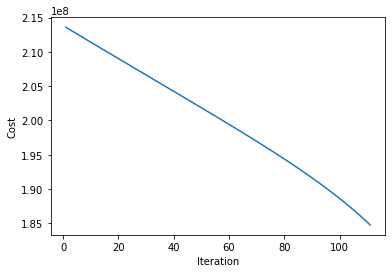

[[9.38663151e-01 1.66390831e+00 7.62137111e-01 7.14172272e-01
  6.28039259e-01 1.15449894e+00 2.37006017e+02 5.12214250e-01
  1.38798831e+00 9.45817094e-01 9.34668637e-01 1.07030653e+00
  1.09179573e+00 2.80652291e-01 4.73795528e+00 3.90916929e-01
  9.67737752e-01 5.40859260e-01 1.81766865e-01]]
58.03390412269484
-16691.37120835742
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


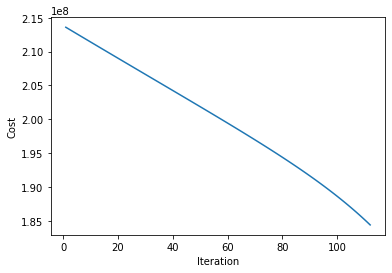

[[9.39852031e-01 1.67262895e+00 7.62517480e-01 7.14886186e-01
  6.29539623e-01 1.15629557e+00 2.48306724e+02 5.13380185e-01
  1.39190241e+00 9.48337675e-01 9.35184458e-01 1.07316870e+00
  1.09432213e+00 2.81307682e-01 4.81041695e+00 3.91287383e-01
  9.68397742e-01 5.41022016e-01 1.81969166e-01]]
58.526569952259976
-16668.936862574585
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


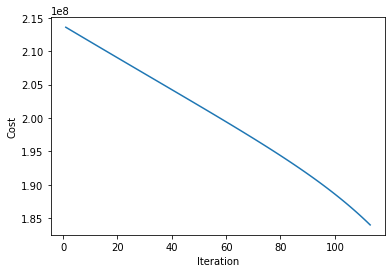

[[9.41040779e-01 1.68138324e+00 7.62897516e-01 7.15599830e-01
  6.31041502e-01 1.15809253e+00 2.60129979e+02 5.14547166e-01
  1.39582214e+00 9.50861497e-01 9.35699853e-01 1.07603458e+00
  1.09685090e+00 2.81963700e-01 4.88388567e+00 3.91657678e-01
  9.69057275e-01 5.41184596e-01 1.82171414e-01]]
59.01855823331328
-16646.01257457379
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


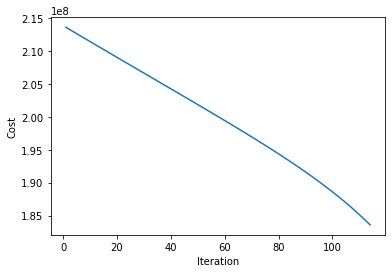

[[9.42229355e-01 1.69017095e+00 7.63277207e-01 7.16313181e-01
  6.32544846e-01 1.15988975e+00 2.72498765e+02 5.15715154e-01
  1.39974738e+00 9.53388474e-01 9.36214807e-01 1.07890407e+00
  1.09938194e+00 2.82620321e-01 4.95837144e+00 3.92027802e-01
  9.69716327e-01 5.41346997e-01 1.82373602e-01]]
59.50985384360158
-16622.57663776744
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


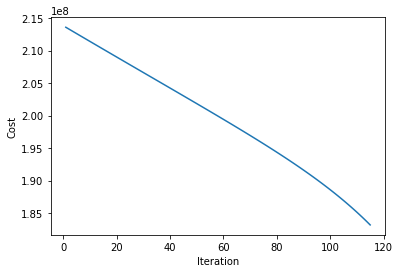

[[9.43417716e-01 1.69899186e+00 7.63656538e-01 7.17026213e-01
  6.34049598e-01 1.16168716e+00 2.85436985e+02 5.16884105e-01
  1.40367798e+00 9.55918513e-01 9.36729300e-01 1.08177706e+00
  1.10191517e+00 2.83277523e-01 5.03388418e+00 3.92397742e-01
  9.70374876e-01 5.41509212e-01 1.82575723e-01]]
60.000440993573356
-16598.606474672724
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


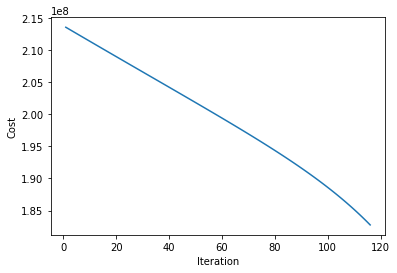

[[9.44605818e-01 1.70784570e+00 7.64035497e-01 7.17738901e-01
  6.35555700e-01 1.16348469e+00 2.98969483e+02 5.18053974e-01
  1.40761379e+00 9.58451517e-01 9.37243316e-01 1.08465344e+00
  1.10445048e+00 2.83935280e-01 5.11043364e+00 3.92767483e-01
  9.71032899e-01 5.41671235e-01 1.82777768e-01]]
60.49030319982658
-16574.078609437718
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


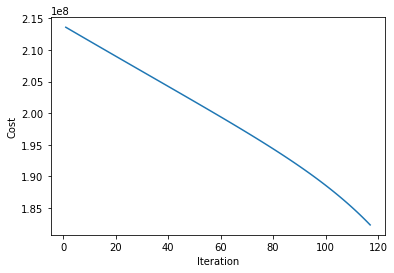

[[9.45793613e-01 1.71673220e+00 7.64414069e-01 7.18451215e-01
  6.37063093e-01 1.16528228e+00 3.13122080e+02 5.19224714e-01
  1.41155466e+00 9.60987385e-01 9.37756835e-01 1.08753311e+00
  1.10698777e+00 2.84593565e-01 5.18802943e+00 3.93137012e-01
  9.71690371e-01 5.41833062e-01 1.82979731e-01]]
60.97942325773991
-16548.968640209383
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


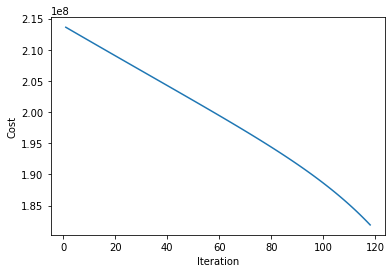

[[9.46981054e-01 1.72565106e+00 7.64792241e-01 7.19163129e-01
  6.38571713e-01 1.16707985e+00 3.27921597e+02 5.20396277e-01
  1.41550042e+00 9.63526011e-01 9.38269837e-01 1.09041593e+00
  1.10952694e+00 2.85252351e-01 5.26668101e+00 3.93506314e-01
  9.72347265e-01 5.41994686e-01 1.83181602e-01]]
61.46778321328496
-16523.251211425584
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


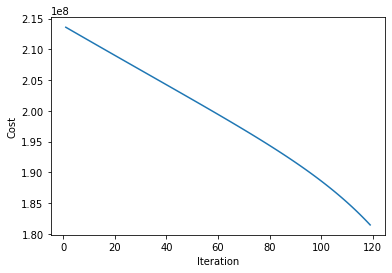

[[9.48168090e-01 1.73460195e+00 7.65169996e-01 7.19874612e-01
  6.40081494e-01 1.16887732e+00 3.43395886e+02 5.21568610e-01
  1.41945090e+00 9.66067285e-01 9.38782301e-01 1.09330178e+00
  1.11206788e+00 2.85911609e-01 5.34639763e+00 3.93875373e-01
  9.73003555e-01 5.42156099e-01 1.83383374e-01]]
61.95536433402008
-16496.899986124452
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


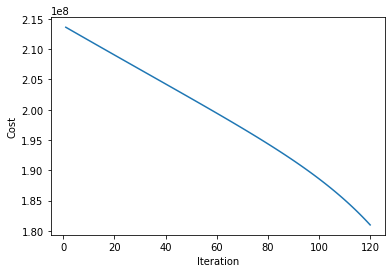

[[9.49354668e-01 1.74358454e+00 7.65547319e-01 7.20585632e-01
  6.41592367e-01 1.17067461e+00 3.59573857e+02 5.22741661e-01
  1.42340592e+00 9.68611089e-01 9.39294205e-01 1.09619053e+00
  1.11461046e+00 2.86571309e-01 5.42718834e+00 3.94244174e-01
  9.73659213e-01 5.42317297e-01 1.83585038e-01]]
62.442147079269276
-16469.887618371322
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


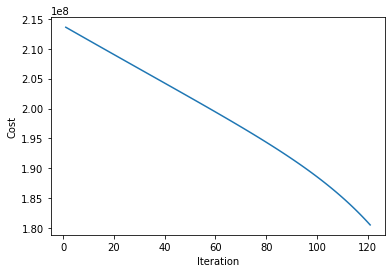

[[9.50540732e-01 1.75259846e+00 7.65924193e-01 7.21296158e-01
  6.43104259e-01 1.17247163e+00 3.76485508e+02 5.23915372e-01
  1.42736528e+00 9.71157301e-01 9.39805527e-01 1.09908205e+00
  1.11715457e+00 2.87231419e-01 5.50906195e+00 3.94612699e-01
  9.74314209e-01 5.42478271e-01 1.83786584e-01]]
62.928111069493006
-16442.18572591945
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


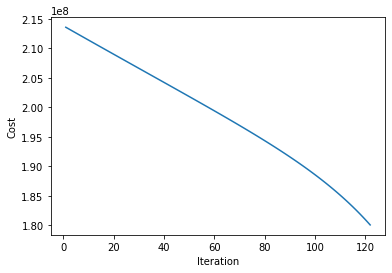

[[9.51726225e-01 1.76164331e+00 7.66300601e-01 7.22006155e-01
  6.44617094e-01 1.17426831e+00 3.94161948e+02 5.25089686e-01
  1.43132880e+00 9.73705794e-01 9.40316243e-01 1.10197618e+00
  1.11970009e+00 2.87891905e-01 5.59202704e+00 3.94980930e-01
  9.74968512e-01 5.42639015e-01 1.83988002e-01]]
63.413235054861694
-16413.764863231812
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


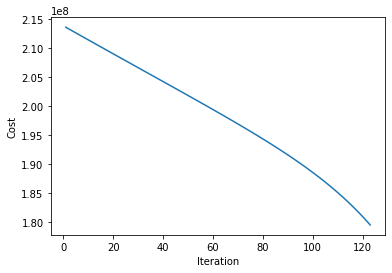

[[9.52911087e-01 1.77071869e+00 7.66676525e-01 7.22715588e-01
  6.46130792e-01 1.17606454e+00 4.12635429e+02 5.26264539e-01
  1.43529626e+00 9.76256433e-01 9.40826328e-01 1.10487277e+00
  1.12224686e+00 2.88552734e-01 5.67609189e+00 3.95348851e-01
  9.75622091e-01 5.42799520e-01 1.84189282e-01]]
63.897496883046585
-16384.594495002748
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


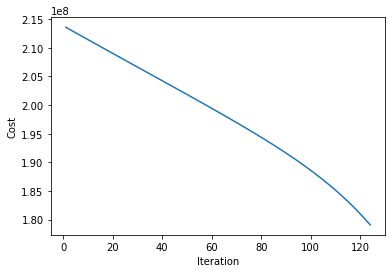

[[9.54095256e-01 1.77982415e+00 7.67051945e-01 7.23424419e-01
  6.47645272e-01 1.17786023e+00 4.31939367e+02 5.27439869e-01
  1.43926745e+00 9.78809079e-01 9.41335757e-01 1.10777167e+00
  1.12479477e+00 2.89213869e-01 5.76126451e+00 3.95716441e-01
  9.76274913e-01 5.42959780e-01 1.84390415e-01]]
64.38087346624744
-16354.642970335817
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


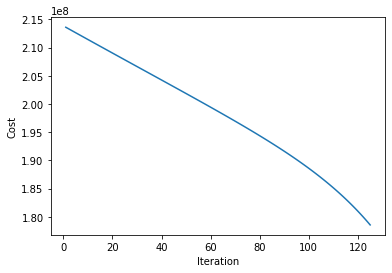

[[9.55278666e-01 1.78895921e+00 7.67426843e-01 7.24132612e-01
  6.49160446e-01 1.17965527e+00 4.52108371e+02 5.28615609e-01
  1.44324213e+00 9.81363585e-01 9.41844503e-01 1.11067271e+00
  1.12734365e+00 2.89875272e-01 5.84755256e+00 3.96083680e-01
  9.76926943e-01 5.43119785e-01 1.84591388e-01]]
64.86334074748142
-16323.877497747084
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


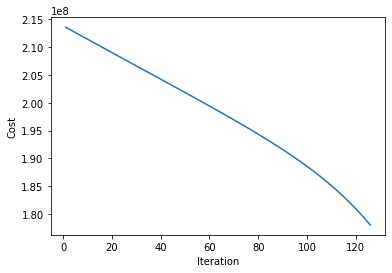

[[9.56461249e-01 1.79812337e+00 7.67801197e-01 7.24840124e-01
  6.50676223e-01 1.18144957e+00 4.73178264e+02 5.29791686e-01
  1.44722007e+00 9.83919798e-01 9.42352538e-01 1.11357571e+00
  1.12989336e+00 2.90536904e-01 5.93496336e+00 3.96450549e-01
  9.77578145e-01 5.43279528e-01 1.84792191e-01]]
65.34487366616308
-16292.264121180768
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


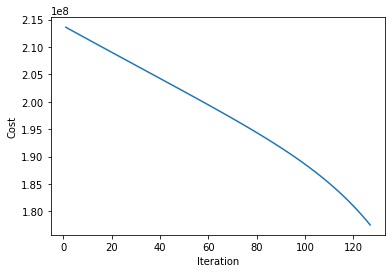

[[9.57642935e-01 1.80731611e+00 7.68174987e-01 7.25546915e-01
  6.52192509e-01 1.18324302e+00 4.95186107e+02 5.30968030e-01
  1.45120102e+00 9.86477557e-01 9.42859834e-01 1.11648049e+00
  1.13244375e+00 2.91198723e-01 6.02350384e+00 3.96817025e-01
  9.78228481e-01 5.43438999e-01 1.84992811e-01]]
65.8254461230114
-16259.767697239924
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


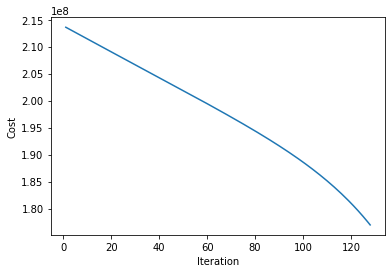

[[9.58823649e-01 1.81653686e+00 7.68548191e-01 7.26252942e-01
  6.53709206e-01 1.18503550e+00 5.18170216e+02 5.32144562e-01
  1.45518471e+00 9.89036695e-01 9.43366359e-01 1.11938687e+00
  1.13499463e+00 2.91860687e-01 6.11318053e+00 3.97183086e-01
  9.78877913e-01 5.43598188e-01 1.85193236e-01]]
66.30503094432639
-16226.351873854896
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


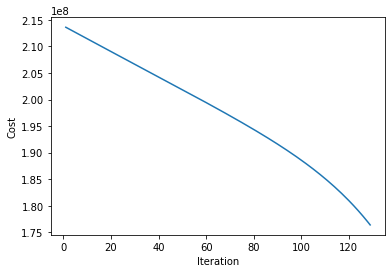

[[9.60003314e-01 1.82578501e+00 7.68920785e-01 7.26958158e-01
  6.55226209e-01 1.18682689e+00 5.42170187e+02 5.33321204e-01
  1.45917088e+00 9.91597037e-01 9.43872083e-01 1.12229464e+00
  1.13754585e+00 2.92522750e-01 6.20399952e+00 3.97548708e-01
  9.79526398e-01 5.43757087e-01 1.85393454e-01]]
66.78359984568469
-16191.979070630106
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


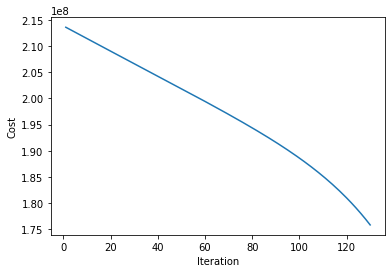

[[9.61181851e-01 1.83505995e+00 7.69292745e-01 7.27662518e-01
  6.56743411e-01 1.18861707e+00 5.67226908e+02 5.34497872e-01
  1.46315924e+00 9.94158400e-01 9.44376972e-01 1.12520359e+00
  1.14009721e+00 2.93184865e-01 6.29596642e+00 3.97913867e-01
  9.80173896e-01 5.43915686e-01 1.85593450e-01]]
67.26112339511181
-16156.610461129465
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


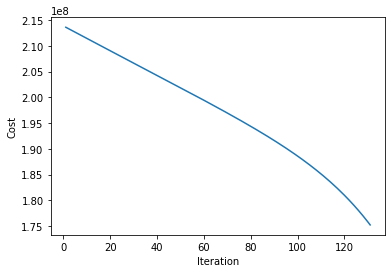

[[9.62359176e-01 1.84436100e+00 7.69664047e-01 7.28365971e-01
  6.58260700e-01 1.19040591e+00 5.93382572e+02 5.35674478e-01
  1.46714948e+00 9.96720592e-01 9.44880994e-01 1.12811351e+00
  1.14264854e+00 2.93846984e-01 6.38908632e+00 3.98278539e-01
  9.80820363e-01 5.44073973e-01 1.85793210e-01]]
67.73757097579623
-16120.205957382956
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


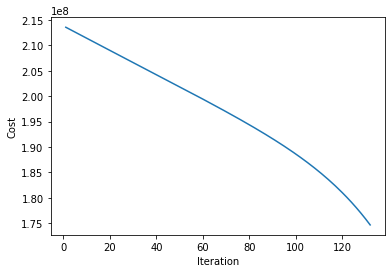

[[9.63535202e-01 1.85368745e+00 7.70034664e-01 7.29068467e-01
  6.59777958e-01 1.19219327e+00 6.20680692e+02 5.36850933e-01
  1.47114131e+00 9.99283416e-01 9.45384112e-01 1.13102418e+00
  1.14519963e+00 2.94509055e-01 6.48336378e+00 3.98642696e-01
  9.81465751e-01 5.44231938e-01 1.85992721e-01]]
68.21291074842036
-16082.724196918281
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


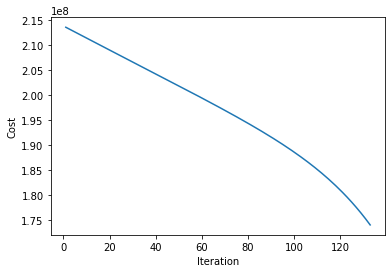

[[9.64709839e-01 1.86303857e+00 7.70404569e-01 7.29769953e-01
  6.61295063e-01 1.19397902e+00 6.49166107e+02 5.38027141e-01
  1.47513439e+00 1.00184666e+00 9.45886290e-01 1.13393535e+00
  1.14775028e+00 2.95171026e-01 6.57880278e+00 3.99006311e-01
  9.82110014e-01 5.44389570e-01 1.86191966e-01]]
68.68710961319239
-16044.122532643458
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


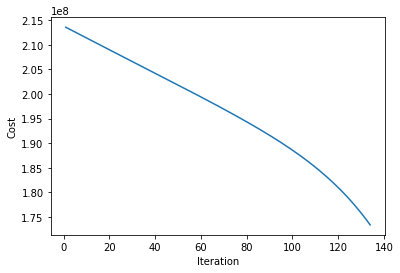

[[9.65882993e-01 1.87241357e+00 7.70773735e-01 7.30470373e-01
  6.62811888e-01 1.19576302e+00 6.78884985e+02 5.39203005e-01
  1.47912838e+00 1.00441011e+00 9.46387489e-01 1.13684678e+00
  1.15030027e+00 2.95832839e-01 6.67540667e+00 3.99369356e-01
  9.82753102e-01 5.44546856e-01 1.86390931e-01]]
69.16013317167375
-16004.357025929557
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


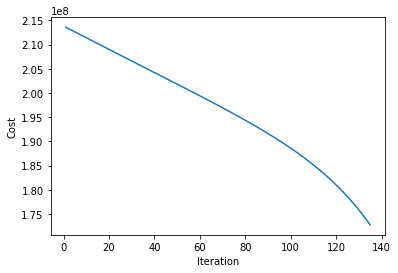

[[9.67054567e-01 1.88181162e+00 7.71142133e-01 7.31169671e-01
  6.64328300e-01 1.19754511e+00 7.09884825e+02 5.40378422e-01
  1.48312293e+00 1.00697354e+00 9.46887670e-01 1.13975821e+00
  1.15284939e+00 2.96494439e-01 6.77317814e+00 3.99731800e-01
  9.83394964e-01 5.44703785e-01 1.86589598e-01]]
69.63194568850776
-15963.382443268612
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


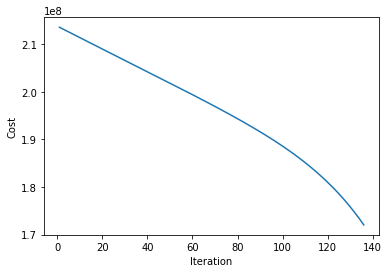

[[9.68224458e-01 1.89123185e+00 7.71509731e-01 7.31867787e-01
  6.65844160e-01 1.19932513e+00 7.42214455e+02 5.41553285e-01
  1.48711768e+00 1.00953672e+00 9.47386791e-01 1.14266937e+00
  1.15539740e+00 2.97155764e-01 6.87211919e+00 4.00093614e-01
  9.84035545e-01 5.44860344e-01 1.86787951e-01]]
70.10251005316682
-15921.152256902098
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


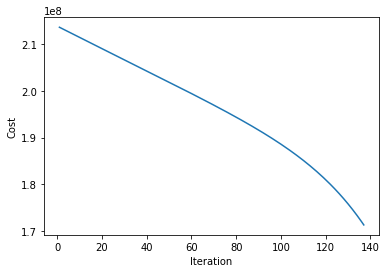

[[9.69392563e-01 1.90067335e+00 7.71876499e-01 7.32564658e-01
  6.67359325e-01 1.20110292e+00 7.75924018e+02 5.42727483e-01
  1.49111223e+00 1.01209939e+00 9.47884810e-01 1.14557999e+00
  1.15794405e+00 2.97816751e-01 6.97223105e+00 4.00454765e-01
  9.84674792e-01 5.45016520e-01 1.86985972e-01]]
70.57178774184821
-15877.618649845195
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


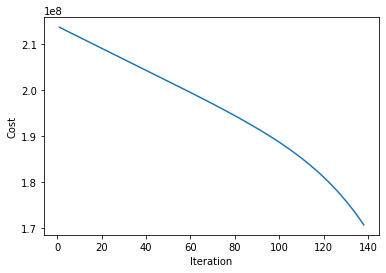

[[9.70558770e-01 1.91013517e+00 7.72242404e-01 7.33260221e-01
  6.68873645e-01 1.20287831e+00 8.11064961e+02 5.43900899e-01
  1.49510619e+00 1.01466131e+00 9.48381682e-01 1.14848978e+00
  1.16048911e+00 2.98477336e-01 7.07351419e+00 4.00815221e-01
  9.85312645e-01 5.45172299e-01 1.87183642e-01]]
71.03973877966123
-15832.732525750214
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


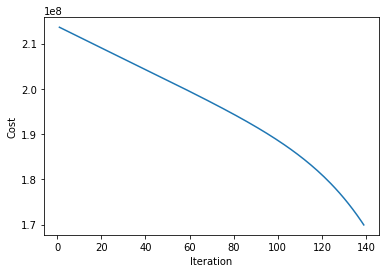

[[9.71722966e-01 1.91961628e+00 7.72607412e-01 7.33954409e-01
  6.70386963e-01 1.20465113e+00 8.47690015e+02 5.45073415e-01
  1.49909914e+00 1.01722220e+00 9.48877361e-01 1.15139843e+00
  1.16303230e+00 2.99137451e-01 7.17596822e+00 4.01174946e-01
  9.85949045e-01 5.45327667e-01 1.87380943e-01]]
71.5063217032632
-15786.443524085113
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


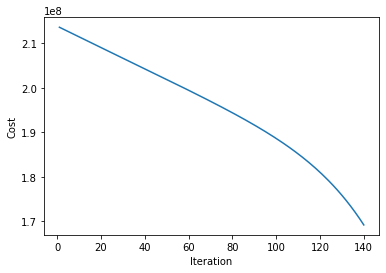

[[9.72885034e-01 1.92911564e+00 7.72971489e-01 7.34647153e-01
  6.71899118e-01 1.20642120e+00 8.85853170e+02 5.46244905e-01
  1.50309065e+00 1.01978179e+00 9.49371799e-01 1.15430562e+00
  1.16557335e+00 2.99797025e-01 7.27959187e+00 4.01533904e-01
  9.86583931e-01 5.45482609e-01 1.87577855e-01]]
71.97149352411539
-15738.700041117594
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


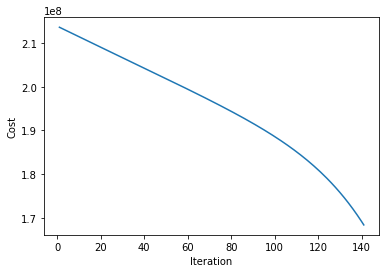

[[9.74044851e-01 1.93863214e+00 7.73334597e-01 7.35338380e-01
  6.73409942e-01 1.20818832e+00 9.25609637e+02 5.47415239e-01
  1.50708026e+00 1.02233979e+00 9.49864947e-01 1.15721104e+00
  1.16811199e+00 3.00455985e-01 7.38438293e+00 4.01892060e-01
  9.87217237e-01 5.45637111e-01 1.87774356e-01]]
72.43520969254644
-15689.44925722765
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


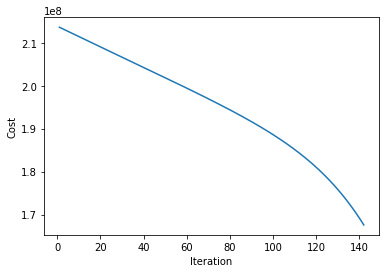

[[9.75202290e-01 1.94816461e+00 7.73696699e-01 7.36028018e-01
  6.74919258e-01 1.20995229e+00 9.67015812e+02 5.48584282e-01
  1.51106750e+00 1.02489590e+00 9.50356753e-01 1.16011433e+00
  1.17064792e+00 3.01114254e-01 7.49033822e+00 4.02249375e-01
  9.87848897e-01 5.45791155e-01 1.87970427e-01]]
72.89742406282582
-15638.637171086699
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


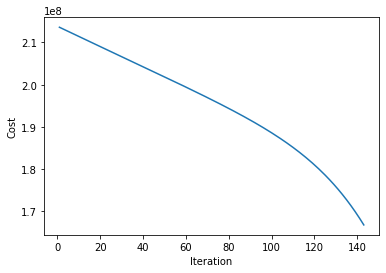

[[9.76357219e-01 1.95771183e+00 7.74057756e-01 7.36715988e-01
  6.76426886e-01 1.21171292e+00 1.01012922e+03 5.49751894e-01
  1.51505189e+00 1.02744981e+00 9.50847164e-01 1.16301515e+00
  1.17318083e+00 3.01771754e-01 7.59745349e+00 4.02605808e-01
  9.88478843e-01 5.45944727e-01 1.88166044e-01]]
73.35808885946712
-15586.208641266043
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


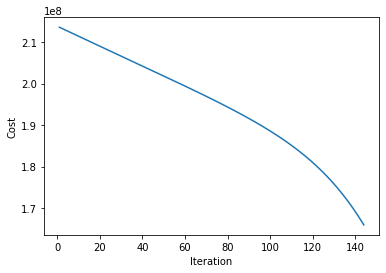

[[9.77509502e-01 1.96727254e+00 7.74417728e-01 7.37402210e-01
  6.77932638e-01 1.21346999e+00 1.05500848e+03 5.50917929e-01
  1.51903292e+00 1.03000120e+00 9.51336125e-01 1.16591314e+00
  1.17571042e+00 3.02428402e-01 7.70572345e+00 4.02961318e-01
  9.89107002e-01 5.46097808e-01 1.88361185e-01]]
73.81715464499784
-15532.107435853928
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


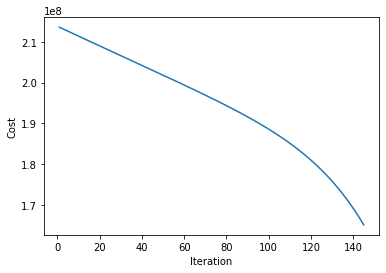

[[9.78658999e-01 1.97684541e+00 7.74776572e-01 7.38086603e-01
  6.79436316e-01 1.21522328e+00 1.10171320e+03 5.52082238e-01
  1.52301006e+00 1.03254973e+00 9.51823579e-01 1.16880789e+00
  1.17823634e+00 3.03084114e-01 7.81514161e+00 4.03315864e-01
  9.89733301e-01 5.46250382e-01 1.88555826e-01]]
74.27457028944997
-15476.27629067823
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


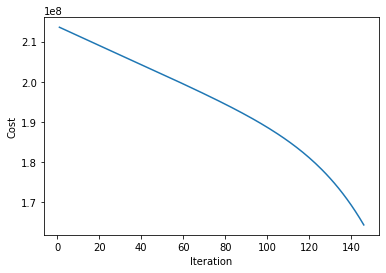

[[9.79805562e-01 1.98642905e+00 7.75134247e-01 7.38769081e-01
  6.80937719e-01 1.21697257e+00 1.15030393e+03 5.53244663e-01
  1.52698277e+00 1.03509505e+00 9.52309467e-01 1.17169904e+00
  1.18075827e+00 3.03738800e-01 7.92570030e+00 4.03669400e-01
  9.90357664e-01 5.46402430e-01 1.88749942e-01]]
74.73028294184367
-15418.656976742157
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


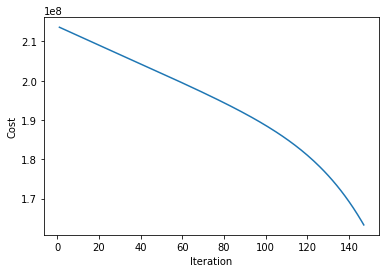

[[9.80949042e-01 1.99602200e+00 7.75490706e-01 7.39449555e-01
  6.82436636e-01 1.21871762e+00 1.20084207e+03 5.54405043e-01
  1.53095048e+00 1.03763681e+00 9.52793728e-01 1.17458615e+00
  1.18327585e+00 3.04392371e-01 8.03739061e+00 4.04021881e-01
  9.90980011e-01 5.46553934e-01 1.88943510e-01]]
75.18423800395482
-15359.19037749406
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


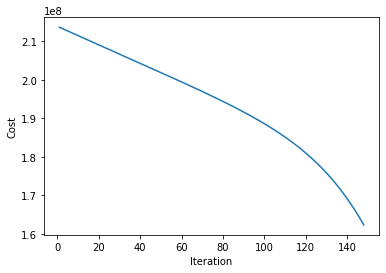

[[9.82089281e-01 2.00562277e+00 7.75845904e-01 7.40127935e-01
  6.83932850e-01 1.22045819e+00 1.25338977e+03 5.55563210e-01
  1.53491261e+00 1.04017463e+00 9.53276299e-01 1.17746882e+00
  1.18578871e+00 3.05044730e-01 8.15020228e+00 4.04373261e-01
  9.91600260e-01 5.46704875e-01 1.89136501e-01]]
75.63637910667525
-15297.816576551002
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


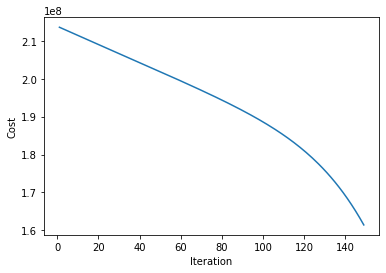

[[9.83226119e-01 2.01522977e+00 7.76199794e-01 7.40804125e-01
  6.85426136e-01 1.22219402e+00 1.30800981e+03 5.56718991e-01
  1.53886854e+00 1.04270812e+00 9.53757116e-01 1.18034659e+00
  1.18829648e+00 3.05695781e-01 8.26412370e+00 4.04723490e-01
  9.92218328e-01 5.46855232e-01 1.89328890e-01]]
76.08664808929325
-15234.474956503438
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


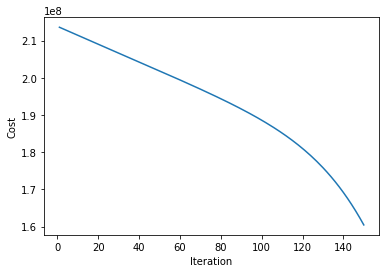

[[9.84359390e-01 2.02484136e+00 7.76552325e-01 7.41478029e-01
  6.86916260e-01 1.22392487e+00 1.36476548e+03 5.57872207e-01
  1.54281765e+00 1.04523688e+00 9.54236111e-01 1.18321902e+00
  1.19079878e+00 3.06345422e-01 8.37914182e+00 4.05072518e-01
  9.92834127e-01 5.47004985e-01 1.89520648e-01]]
76.53498498203996
-15169.104309414413
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


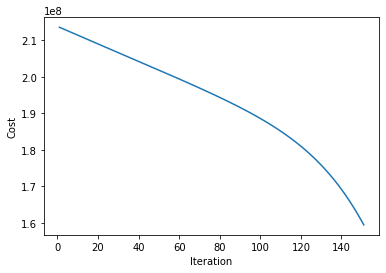

[[9.85488920e-01 2.03445585e+00 7.76903449e-01 7.42149546e-01
  6.88402983e-01 1.22565046e+00 1.42372047e+03 5.59022673e-01
  1.54675928e+00 1.04776051e+00 9.54713215e-01 1.18608563e+00
  1.19329519e+00 3.06993548e-01 8.49524209e+00 4.05420293e-01
  9.93447569e-01 5.47154113e-01 1.89711746e-01]]
76.9813279922653
-15101.642959620429
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


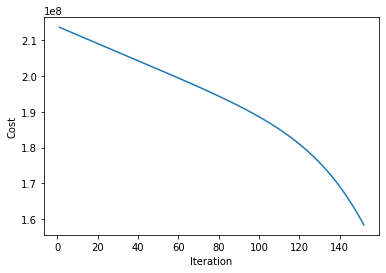

[[9.86614534e-01 2.04407147e+00 7.77253111e-01 7.42818573e-01
  6.89886055e-01 1.22737052e+00 1.48493869e+03 5.60170196e-01
  1.55069277e+00 1.05027856e+00 9.55188357e-01 1.18894594e+00
  1.19578530e+00 3.07640051e-01 8.61240843e+00 4.05766763e-01
  9.94058559e-01 5.47302594e-01 1.89902156e-01]]
77.4256134946242
-15032.028899415656
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


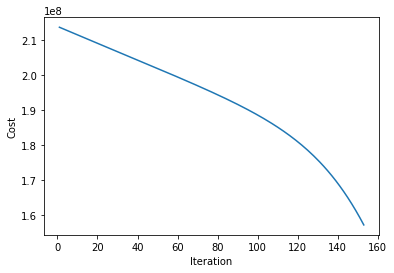

[[9.87736049e-01 2.05368636e+00 7.77601260e-01 7.43485003e-01
  6.91365220e-01 1.22908476e+00 1.54848411e+03 5.61314581e-01
  1.55461742e+00 1.05279061e+00 9.55661465e-01 1.19179945e+00
  1.19826869e+00 3.08284820e-01 8.73062315e+00 4.06111872e-01
  9.94667004e-01 5.47450405e-01 1.90091846e-01]]
77.8677760256702
-14960.199938176349
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


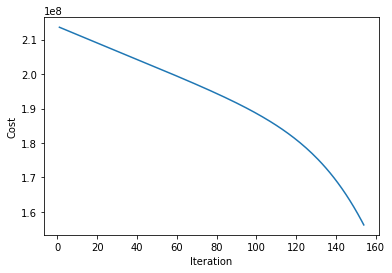

[[9.88853277e-01 2.06329863e+00 7.77947839e-01 7.44148727e-01
  6.92840214e-01 1.23079289e+00 1.61442060e+03 5.62455623e-01
  1.55853251e+00 1.05529619e+00 9.56132461e-01 1.19464564e+00
  1.20074490e+00 3.08927739e-01 8.84986686e+00 4.06455563e-01
  9.95272806e-01 5.47597524e-01 1.90280784e-01]]
78.3077482832692
-14886.093865441555
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


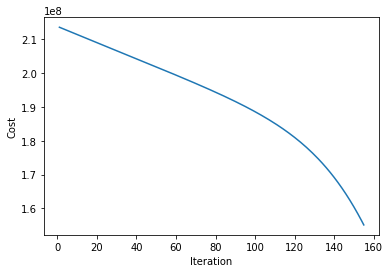

[[9.89966025e-01 2.07290630e+00 7.78292792e-01 7.44809632e-01
  6.94310764e-01 1.23249461e+00 1.68281173e+03 5.63593114e-01
  1.56243730e+00 1.05779483e+00 9.56601270e-01 1.19748397e+00
  1.20321349e+00 3.09568691e-01 8.97011850e+00 4.06797779e-01
  9.95875864e-01 5.47743927e-01 1.90468940e-01]]
78.74546113125946
-14809.648628417024
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


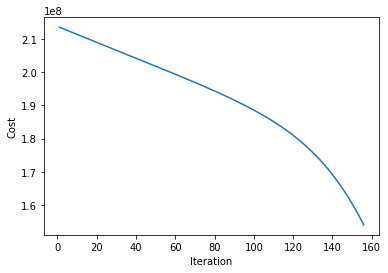

[[9.91074094e-01 2.08250731e+00 7.78636060e-01 7.45467603e-01
  6.95776589e-01 1.23418962e+00 1.75372055e+03 5.64726836e-01
  1.56633104e+00 1.06028606e+00 9.57067812e-01 1.20031390e+00
  1.20567399e+00 3.10207554e-01 9.09135520e+00 4.07138459e-01
  9.96476075e-01 5.47889590e-01 1.90656278e-01]]
79.18084360979627
-14730.802524313649
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


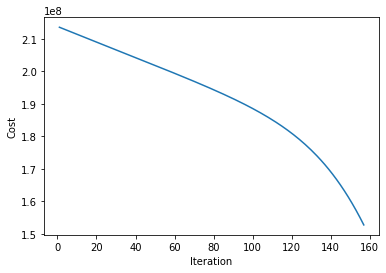

[[9.92177281e-01 2.09209955e+00 7.78977585e-01 7.46122519e-01
  6.97237401e-01 1.23587758e+00 1.82720939e+03 5.65856569e-01
  1.57021293e+00 1.06276937e+00 9.57532005e-01 1.20313487e+00
  1.20812591e+00 3.10844201e-01 9.21355226e+00 4.07477543e-01
  9.97073332e-01 5.48034487e-01 1.90842766e-01]]
79.6138229518297
-14649.494407852317
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


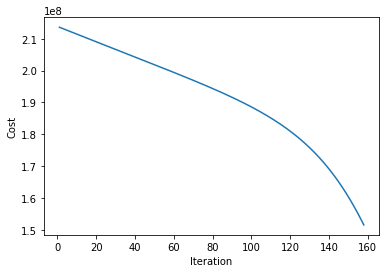

[[9.93275375e-01 2.10168084e+00 7.79317304e-01 7.46774260e-01
  6.98692904e-01 1.23755818e+00 1.90333959e+03 5.66982084e-01
  1.57408218e+00 1.06524426e+00 9.57993765e-01 1.20594628e+00
  1.21056875e+00 3.11478504e-01 9.33668312e+00 4.07814967e-01
  9.97667528e-01 5.48178592e-01 1.91028368e-01]]
80.0443246061711
-14565.66391418842
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


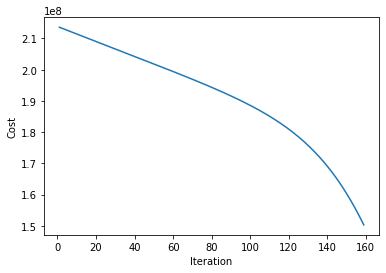

[[9.94368164e-01 2.11124890e+00 7.79655155e-01 7.47422701e-01
  7.00142792e-01 1.23923108e+00 1.98217126e+03 5.68103147e-01
  1.57793795e+00 1.06771019e+00 9.58453008e-01 1.20874754e+00
  1.21300202e+00 3.12110331e-01 9.46071926e+00 4.08150667e-01
  9.98258550e-01 5.48321881e-01 1.91213048e-01]]
80.47227226760845
-14479.251697407106
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


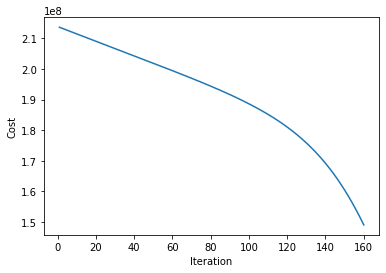

[[9.95455425e-01 2.12080140e+00 7.79991074e-01 7.48067713e-01
  7.01586752e-01 1.24089594e+00 2.06376302e+03 5.69219519e-01
  1.58177939e+00 1.07016663e+00 9.58909644e-01 1.21153804e+00
  1.21542518e+00 3.12739545e-01 9.58563020e+00 4.08484577e-01
  9.98846286e-01 5.48464326e-01 1.91396770e-01]]
80.89758791453202
-14390.19968462585
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


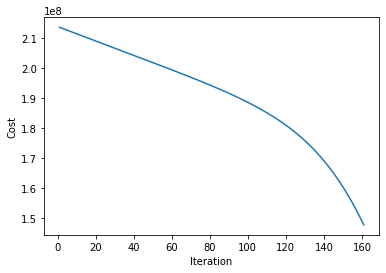

[[9.96536937e-01 2.13033595e+00 7.80324994e-01 7.48709165e-01
  7.03024466e-01 1.24255241e+00 2.14817172e+03 5.70330952e-01
  1.58560563e+00 1.07261302e+00 9.59363586e-01 1.21431715e+00
  1.21783770e+00 3.13366008e-01 9.71138344e+00 4.08816629e-01
  9.99430618e-01 5.48605899e-01 1.91579496e-01]]
81.32019185452894
-14298.451345614434
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


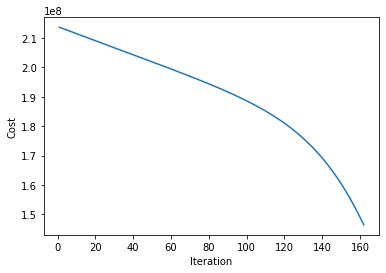

[[9.97612467e-01 2.13985006e+00 7.80656850e-01 7.49346925e-01
  7.04455604e-01 1.24420013e+00 2.23545208e+03 5.71437196e-01
  1.58941578e+00 1.07504880e+00 9.59814741e-01 1.21708423e+00
  1.22023903e+00 3.13989578e-01 9.83794442e+00 4.09146755e-01
  1.00001143e+00 5.48746572e-01 1.91761188e-01]]
81.74000277839812
-14203.951977694976
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


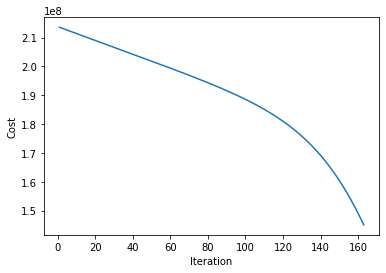

[[9.98681783e-01 2.14934120e+00 7.80986573e-01 7.49980855e-01
  7.05879832e-01 1.24583873e+00 2.32565644e+03 5.72537992e-01
  1.59320892e+00 1.07747338e+00 9.60263015e-01 1.21983861e+00
  1.22262861e+00 3.14610108e-01 9.96527647e+00 4.09474884e-01
  1.00058859e+00 5.48886318e-01 1.91941806e-01]]
82.15693782302574
-14106.649005527699
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


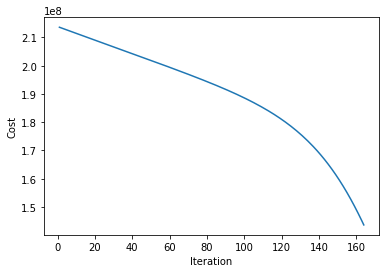

[[9.99744644e-01 2.15880675e+00 7.81314092e-01 7.50610817e-01
  7.07296806e-01 1.24746784e+00 2.41883442e+03 5.73633078e-01
  1.59698412e+00 1.07988619e+00 9.60708315e-01 1.22257962e+00
  1.22500588e+00 3.15227450e-01 1.00933408e+01 4.09800945e-01
  1.00116199e+00 5.49025107e-01 1.92121311e-01]]
82.57091264354413
-14006.49229520871
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


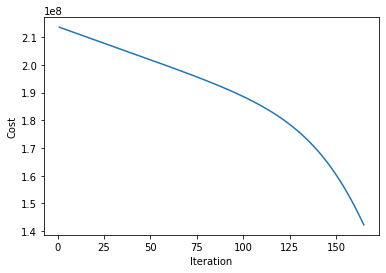

[[1.00080081e+00 2.16824403e+00 7.81639339e-01 7.51236669e-01
  7.08706178e-01 1.24908707e+00 2.51503254e+03 5.74722186e-01
  1.60074042e+00 1.08228660e+00 9.61150544e-01 1.22530658e+00
  1.22737024e+00 3.15841452e-01 1.02220965e+01 4.10124865e-01
  1.00173150e+00 5.49162910e-01 1.92299661e-01]]
82.98184149517458
-13903.434481916978
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


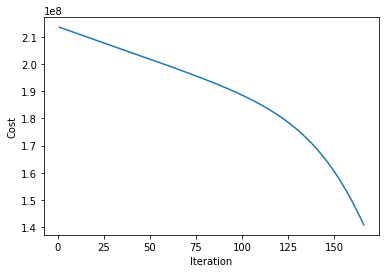

[[1.00185003e+00 2.17765030e+00 7.81962240e-01 7.51858267e-01
  7.10107592e-01 1.25069605e+00 2.61429389e+03 5.75805043e-01
  1.60447684e+00 1.08467400e+00 9.61589603e-01 1.22801879e+00
  1.22972110e+00 3.16451960e-01 1.03515005e+01 4.10446569e-01
  1.00229698e+00 5.49299696e-01 1.92476816e-01]]
83.38963732512585
-13797.431310141375
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


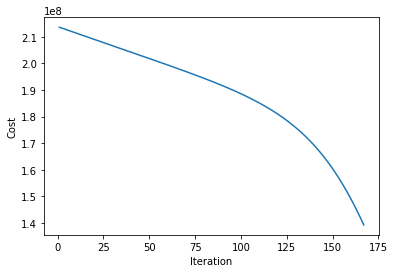

[[1.00289205e+00 2.18702275e+00 7.82282722e-01 7.52475465e-01
  7.11500685e-01 1.25229437e+00 2.71665778e+03 5.76881370e-01
  1.60819241e+00 1.08704777e+00 9.62025393e-01 1.23071553e+00
  1.23205786e+00 3.17058816e-01 1.04815076e+01 4.10765982e-01
  1.00285832e+00 5.49435436e-01 1.92652734e-01]]
83.79421187488502
-13688.441985296146
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


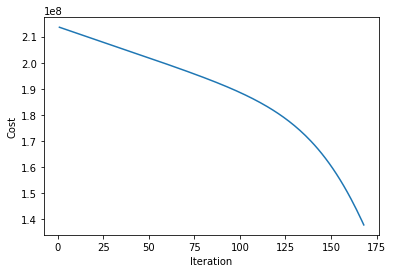

[[1.00392662e+00 2.19635852e+00 7.82600713e-01 7.53088115e-01
  7.12885089e-01 1.25388164e+00 2.82215933e+03 5.77950884e-01
  1.61188611e+00 1.08940727e+00 9.62457812e-01 1.23339607e+00
  1.23437990e+00 3.17661860e-01 1.06120702e+01 4.11083028e-01
  1.00341537e+00 5.49570098e-01 1.92827371e-01]]
84.19547579319533
-13576.429535305286
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


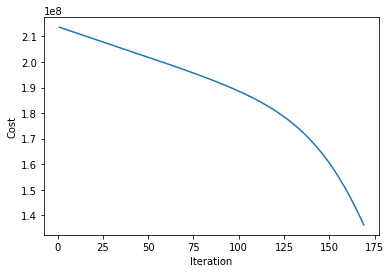

[[1.00495348e+00 2.20565467e+00 7.82916136e-01 7.53696067e-01
  7.14260430e-01 1.25545745e+00 2.93082913e+03 5.79013300e-01
  1.61555691e+00 1.09175185e+00 9.62886759e-01 1.23605969e+00
  1.23668661e+00 3.18260931e-01 1.07431388e+01 4.11397629e-01
  1.00396801e+00 5.49703652e-01 1.93000685e-01]]
84.59333875996624
-13461.361180487937
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


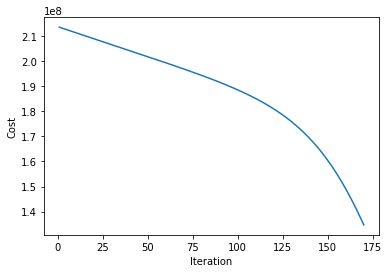

[[1.00597237e+00 2.21490823e+00 7.83228917e-01 7.54299170e-01
  7.15626330e-01 1.25702140e+00 3.04269281e+03 5.80068327e-01
  1.61920378e+00 1.09408085e+00 9.63312131e-01 1.23870562e+00
  1.23897733e+00 3.18855863e-01 1.08746616e+01 4.11709708e-01
  1.00451610e+00 5.49836065e-01 1.93172633e-01]]
84.9877096213047
-13343.208709831504
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


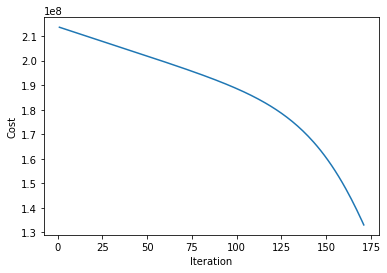

[[1.00698302e+00 2.22411617e+00 7.83538979e-01 7.54897270e-01
  7.16982405e-01 1.25857306e+00 3.15777071e+03 5.81115671e-01
  1.62282566e+00 1.09639361e+00 9.63733823e-01 1.24133313e+00
  1.24125145e+00 3.19446491e-01 1.10065846e+01 4.12019185e-01
  1.00505951e+00 5.49967307e-01 1.93343169e-01]]
85.37849653579192
-13221.948861477857
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


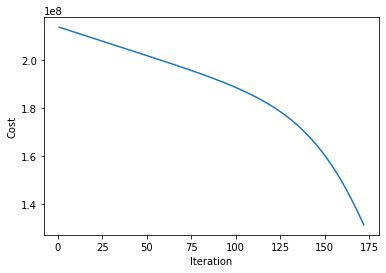

[[1.00798517e+00 2.23327540e+00 7.83846246e-01 7.55490213e-01
  7.18328268e-01 1.26011202e+00 3.27607744e+03 5.82155035e-01
  1.62642150e+00 1.09868946e+00 9.64151731e-01 1.24394143e+00
  1.24350830e+00 3.20032646e-01 1.11388520e+01 4.12325981e-01
  1.00559809e+00 5.50097345e-01 1.93512251e-01]]
85.76560713205856
-13097.563704992175
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


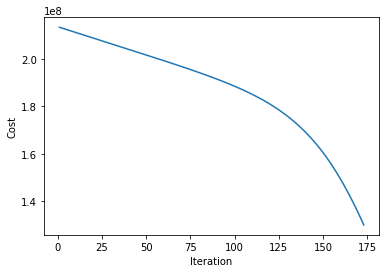

[[1.00897855e+00 2.24238280e+00 7.84150641e-01 7.56077844e-01
  7.19663530e-01 1.26163786e+00 3.39762153e+03 5.83186120e-01
  1.62999021e+00 1.10096771e+00 9.64565750e-01 1.24652977e+00
  1.24574725e+00 3.20614159e-01 1.12714055e+01 4.12630017e-01
  1.00613172e+00 5.50226148e-01 1.93679833e-01]]
86.14894867763142
-12970.041022727046
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


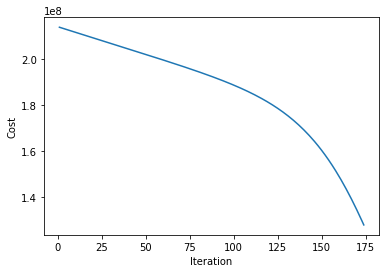

[[1.00996289e+00 2.25143522e+00 7.84452086e-01 7.56660007e-01
  7.20987796e-01 1.26315016e+00 3.52240505e+03 5.84208626e-01
  1.63353073e+00 1.10322769e+00 9.64975773e-01 1.24909736e+00
  1.24796763e+00 3.21190859e-01 1.14041851e+01 4.12931211e-01
  1.00666025e+00 5.50353683e-01 1.93845870e-01]]
86.52842825893809
-12839.374687342084
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


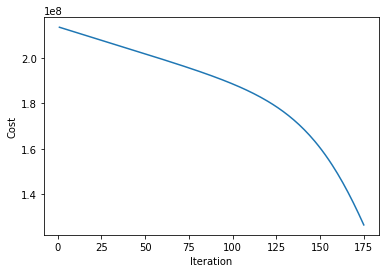

[[1.01093793e+00 2.26042946e+00 7.84750504e-01 7.57236547e-01
  7.22300672e-01 1.26464849e+00 3.65042322e+03 5.85222249e-01
  1.63704195e+00 1.10546870e+00 9.65381696e-01 1.25164343e+00
  1.25016879e+00 3.21762576e-01 1.15371288e+01 4.13229484e-01
  1.00718355e+00 5.50479917e-01 1.94010317e-01]]
86.903952972262
-12705.56503230189
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


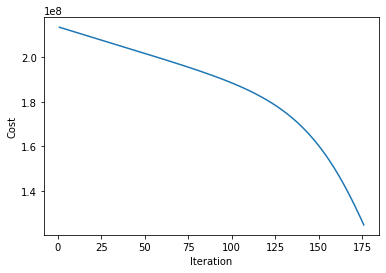

[[1.01190338e+00 2.26936230e+00 7.85045818e-01 7.57807308e-01
  7.23601763e-01 1.26613243e+00 3.78166409e+03 5.86226687e-01
  1.64052280e+00 1.10769007e+00 9.65783413e-01 1.25416719e+00
  1.25235006e+00 3.22329137e-01 1.16701727e+01 4.13524755e-01
  1.00770148e+00 5.50604820e-01 1.94173130e-01]]
87.27543012533982
-12568.619211948893
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


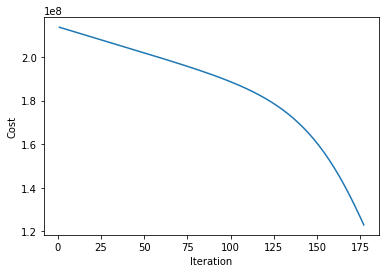

[[1.01285899e+00 2.27823050e+00 7.85337950e-01 7.58372133e-01
  7.24890671e-01 1.26760155e+00 3.91610821e+03 5.87221636e-01
  1.64397217e+00 1.10989109e+00 9.66180818e-01 1.25666786e+00
  1.25451078e+00 3.22890371e-01 1.18032510e+01 4.13816944e-01
  1.00821390e+00 5.50728359e-01 1.94334264e-01]]
87.6427674491864
-12428.551547547584
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


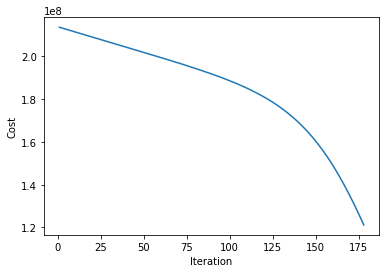

[[1.01380448e+00 2.28703080e+00 7.85626825e-01 7.58930867e-01
  7.26167002e-01 1.26905544e+00 4.05372828e+03 5.88206793e-01
  1.64738898e+00 1.11207108e+00 9.66573807e-01 1.25914464e+00
  1.25665031e+00 3.23446106e-01 1.19362964e+01 4.14105971e-01
  1.00872067e+00 5.50850503e-01 1.94493674e-01]]
88.0058733196211
-12285.383855520817
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


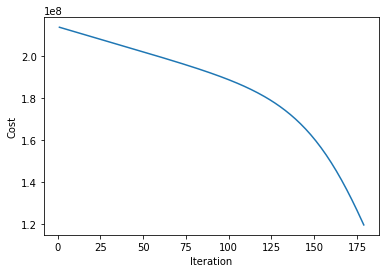

[[1.01473959e+00 2.29575994e+00 7.85912367e-01 7.59483358e-01
  7.27430360e-01 1.27049366e+00 4.19448887e+03 5.89181856e-01
  1.65077214e+00 1.11422935e+00 9.66962276e-01 1.26159677e+00
  1.25876797e+00 3.23996171e-01 1.20692399e+01 4.14391758e-01
  1.00922166e+00 5.50971219e-01 1.94651315e-01]]
88.36465698785338
-12139.14575395995
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


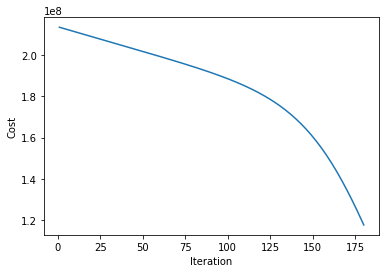

[[1.01566405e+00 2.30441464e+00 7.86194500e-01 7.60029452e-01
  7.28680355e-01 1.27191582e+00 4.33834622e+03 5.90146526e-01
  1.65412055e+00 1.11636522e+00 9.67346122e-01 1.26402347e+00
  1.26086311e+00 3.24540396e-01 1.22020112e+01 4.14674225e-01
  1.00971674e+00 5.51090477e-01 1.94807144e-01]]
88.7190288193664
-11989.874943385734
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


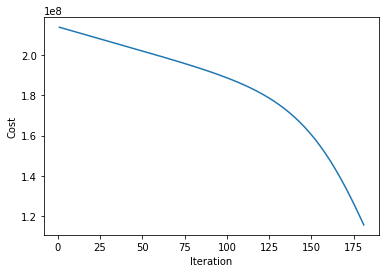

[[1.01657761e+00 2.31299165e+00 7.86473150e-01 7.60568999e-01
  7.29916596e-01 1.27332148e+00 4.48524793e+03 5.91100505e-01
  1.65743315e+00 1.11847801e+00 9.67725244e-01 1.26642395e+00
  1.26293509e+00 3.25078612e-01 1.23345385e+01 4.14953295e-01
  1.01020577e+00 5.51208245e-01 1.94961118e-01]]
89.06890054021741
-11837.617457686307
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


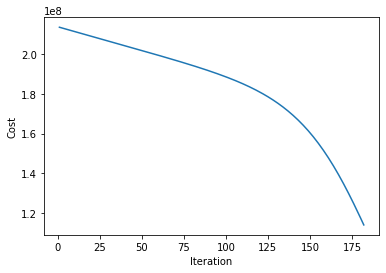

[[1.01748000e+00 2.32148772e+00 7.86748244e-01 7.61101851e-01
  7.31138700e-01 1.27471025e+00 4.63513284e+03 5.92043500e-01
  1.66070887e+00 1.12056705e+00 9.68099543e-01 1.26879747e+00
  1.26498327e+00 3.25610653e-01 1.24667488e+01 4.15228892e-01
  1.01068862e+00 5.51324495e-01 1.95113192e-01]]
89.41418548975275
-11682.427881150294
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


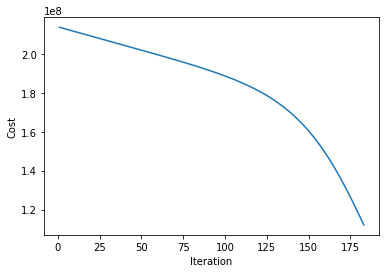

[[1.01837097e+00 2.32989963e+00 7.87019711e-01 7.61627862e-01
  7.32346289e-01 1.27608172e+00 4.78793085e+03 5.92975220e-01
  1.66394666e+00 1.12263167e+00 9.68468920e-01 1.27114326e+00
  1.26700701e+00 3.26136355e-01 1.25985684e+01 4.15500941e-01
  1.01116517e+00 5.51439196e-01 1.95263327e-01]]
89.75479887861636
-11524.369527568791
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


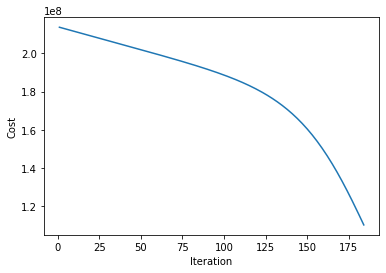

[[1.01925027e+00 2.33822419e+00 7.87287482e-01 7.62146889e-01
  7.33538988e-01 1.27743551e+00 4.94356284e+03 5.93895381e-01
  1.66714547e+00 1.12467123e+00 9.68833281e-01 1.27346058e+00
  1.26900570e+00 3.26655556e-01 1.27299224e+01 4.15769368e-01
  1.01163529e+00 5.51552320e-01 1.95411480e-01]]
90.09065805081498
-11363.514577491827
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


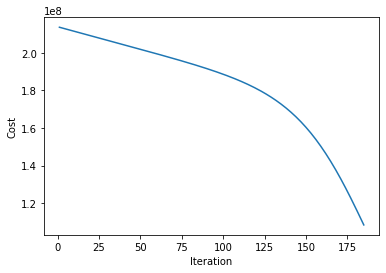

[[1.02011767e+00 2.34645823e+00 7.87551488e-01 7.62658794e-01
  7.34716434e-01 1.27877122e+00 5.10194062e+03 5.94803704e-01
  1.67030431e+00 1.12668508e+00 9.69192532e-01 1.27574872e+00
  1.27097873e+00 3.27168099e-01 1.28607355e+01 4.16034103e-01
  1.01209885e+00 5.51663838e-01 1.95557611e-01]]
90.42168274849315
-11199.944169906754
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


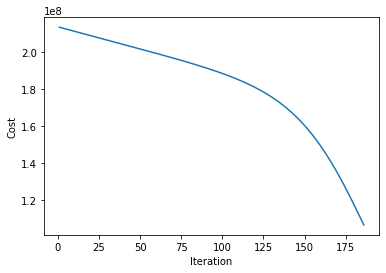

[[1.02097292e+00 2.35459865e+00 7.87811664e-01 7.63163441e-01
  7.35878270e-01 1.28008849e+00 5.26296693e+03 5.95699917e-01
  1.67342217e+00 1.12867260e+00 9.69546584e-01 1.27800694e+00
  1.27292550e+00 3.27673828e-01 1.29909317e+01 4.16295075e-01
  1.01255575e+00 5.51773724e-01 1.95701681e-01]]
90.74779537796745
-11033.748444850136
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


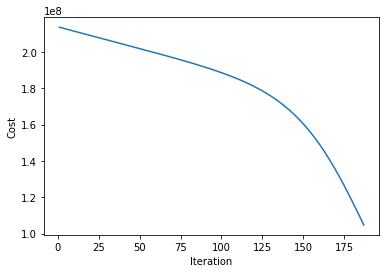

[[1.02181579e+00 2.36264240e+00 7.88067946e-01 7.63660700e-01
  7.37024149e-01 1.28138695e+00 5.42653546e+03 5.96583756e-01
  1.67649808e+00 1.13063318e+00 9.69895348e-01 1.28023458e+00
  1.27484544e+00 3.28172593e-01 1.31204349e+01 4.16552217e-01
  1.01300586e+00 5.51881951e-01 1.95843653e-01]]
91.06892127547641
-10865.026533785316
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


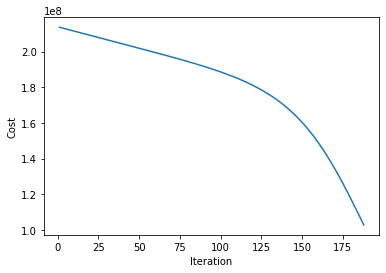

[[1.02264608e+00 2.37058650e+00 7.88320273e-01 7.64150446e-01
  7.38153735e-01 1.28266626e+00 5.59253106e+03 5.97454964e-01
  1.67953110e+00 1.13256622e+00 9.70238743e-01 1.28243094e+00
  1.27673798e+00 3.28664250e-01 1.32491690e+01 4.16805466e-01
  1.01344908e+00 5.51988494e-01 1.95983490e-01]]
91.38498897101998
-10693.886494960481
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


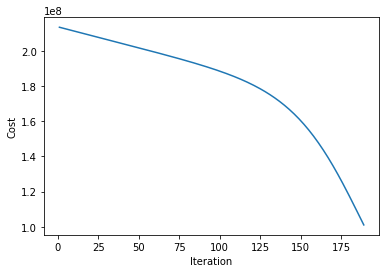

[[1.02346357e+00 2.37842803e+00 7.88568587e-01 7.64632558e-01
  7.39266703e-01 1.28392608e+00 5.76082980e+03 5.98313293e-01
  1.68252034e+00 1.13447117e+00 9.70576688e-01 1.28459540e+00
  1.27860260e+00 3.29148656e-01 1.33770577e+01 4.17054759e-01
  1.01388531e+00 5.52093329e-01 1.96121157e-01]]
91.69593044859334
-10520.445191421311
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


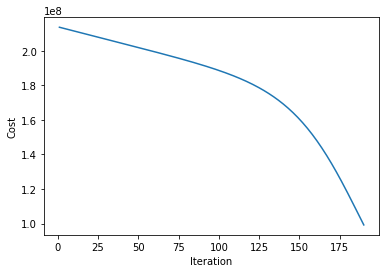

[[1.02426805e+00 2.38616418e+00 7.88812833e-01 7.65106921e-01
  7.40362743e-01 1.28516608e+00 5.93129929e+03 5.99158507e-01
  1.68546490e+00 1.13634747e+00 9.70909107e-01 1.28672731e+00
  1.28043877e+00 3.29625679e-01 1.35040254e+01 4.17300037e-01
  1.01431443e+00 5.52196434e-01 1.96256621e-01]]
92.00168140106712
-10344.828109868955
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


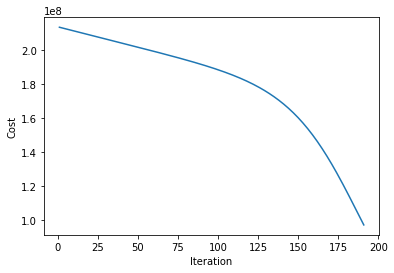

[[1.02505933e+00 2.39379219e+00 7.89052959e-01 7.65573426e-01
  7.41441557e-01 1.28638596e+00 6.10379894e+03 5.99990379e-01
  1.68836396e+00 1.13819460e+00 9.71235930e-01 1.28882608e+00
  1.28224599e+00 3.30095189e-01 1.36299971e+01 4.17541244e-01
  1.01473637e+00 5.52297787e-01 1.96389851e-01]]
92.30218147792898
-10167.169119138081
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


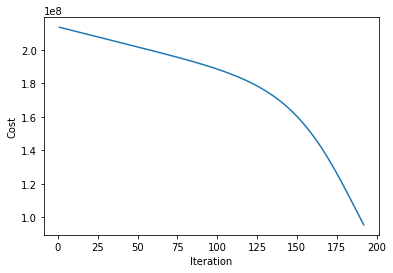

[[1.02583725e+00 2.40130944e+00 7.89288915e-01 7.66031972e-01
  7.42502863e-01 1.28758544e+00 6.27818033e+03 6.00808694e-01
  1.69121672e+00 1.14001206e+00 9.71557088e-01 1.29089116e+00
  1.28402381e+00 3.30557065e-01 1.37548983e+01 4.17778328e-01
  1.01515102e+00 5.52397369e-01 1.96520817e-01]]
92.59737452408494
-9987.610167703207
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


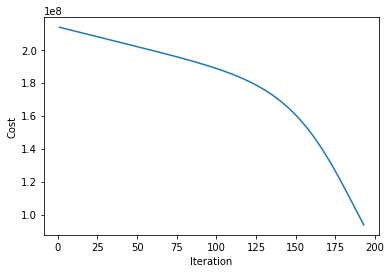

[[1.02660162e+00 2.40871340e+00 7.89520658e-01 7.66482464e-01
  7.43546393e-01 1.28876424e+00 6.45428763e+03 6.01613249e-01
  1.69402243e+00 1.14179937e+00 9.71872521e-01 1.29292199e+00
  1.28577177e+00 3.31011190e-01 1.38786560e+01 4.18011241e-01
  1.01555832e+00 5.52495160e-01 1.96649490e-01]]
92.88720880792064
-9806.300920303696
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


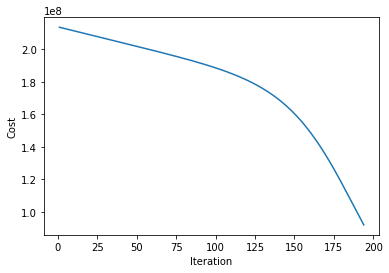

[[1.02735229e+00 2.41600168e+00 7.89748145e-01 7.66924813e-01
  7.44571900e-01 1.28992211e+00 6.63195804e+03 6.02403856e-01
  1.69678037e+00 1.14355609e+00 9.72182171e-01 1.29491809e+00
  1.28748946e+00 3.31457457e-01 1.40011981e+01 4.18239937e-01
  1.01595817e+00 5.52591144e-01 1.96775847e-01]]
93.17163723684729
-9623.398334494734
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


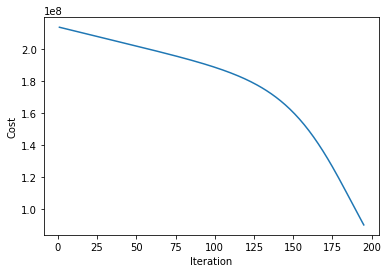

[[1.02808912e+00 2.42317198e+00 7.89971339e-01 7.67358940e-01
  7.45579151e-01 1.29105882e+00 6.81102240e+03 6.03180338e-01
  1.69948989e+00 1.14528182e+00 9.72485986e-01 1.29687897e+00
  1.28917651e+00 3.31895766e-01 1.41224543e+01 4.18464375e-01
  1.01635053e+00 5.52685306e-01 1.96899863e-01]]
93.45061755860237
-9439.066178673278
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


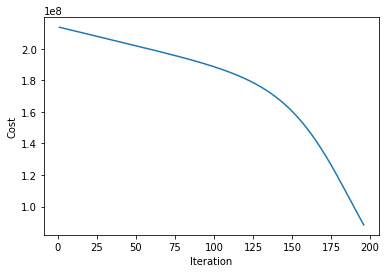

[[1.02881198e+00 2.43022216e+00 7.90190206e-01 7.67784771e-01
  7.46567933e-01 1.29217417e+00 6.99130569e+03 6.03942534e-01
  1.70215037e+00 1.14697617e+00 9.72783921e-01 1.29880420e+00
  1.29083255e+00 3.32326025e-01 1.42423557e+01 4.18684519e-01
  1.01673531e+00 5.52777633e-01 1.97021517e-01]]
93.72411254664351
-9253.474493882228
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


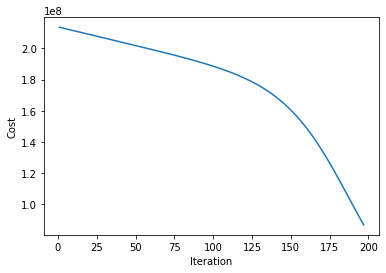

[[1.02952076e+00 2.43715021e+00 7.90404718e-01 7.68202244e-01
  7.47538052e-01 1.29326796e+00 7.17262774e+03 6.04690298e-01
  1.70476127e+00 1.14863879e+00 9.73075935e-01 1.30069340e+00
  1.29245726e+00 3.32748151e-01 1.43608358e+01 4.18900334e-01
  1.01711248e+00 5.52868112e-01 1.97140791e-01]]
93.992090168064
-9066.799002447255
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


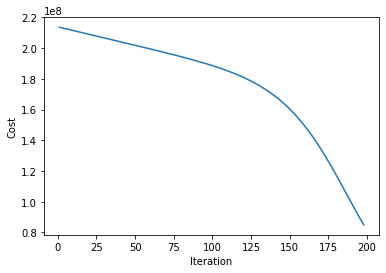

[[1.03021536e+00 2.44395427e+00 7.90614848e-01 7.68611302e-01
  7.48489336e-01 1.29434002e+00 7.35480387e+03 6.05423498e-01
  1.70732207e+00 1.15026938e+00 9.73361993e-01 1.30254620e+00
  1.29405037e+00 3.33162069e-01 1.44778299e+01 4.19111794e-01
  1.01748198e+00 5.52956734e-01 1.97257667e-01]]
94.25452373257073
-8879.220467237063
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


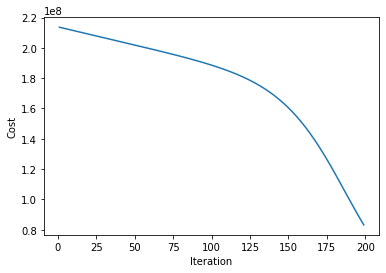

[[1.03089568e+00 2.45063263e+00 7.90820577e-01 7.69011899e-01
  7.49421631e-01 1.29539023e+00 7.53764563e+03 6.06142020e-01
  1.70983233e+00 1.15186765e+00 9.73642068e-01 1.30436230e+00
  1.29561161e+00 3.33567714e-01 1.45932760e+01 4.19318874e-01
  1.01784378e+00 5.53043490e-01 1.97372133e-01]]
94.51139202119795
-8690.924006042764
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


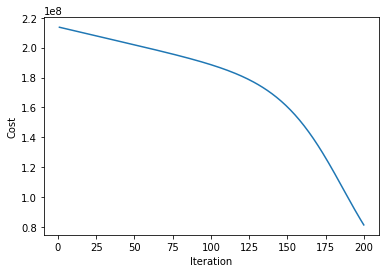

[[1.03156166e+00 2.45718375e+00 7.91021889e-01 7.69403996e-01
  7.50334807e-01 1.29641845e+00 7.72096155e+03 6.06845764e-01
  1.71229166e+00 1.15343337e+00 9.73916136e-01 1.30614141e+00
  1.29714078e+00 3.33965028e-01 1.47071143e+01 4.19521555e-01
  1.01819784e+00 5.53128374e-01 1.97484177e-01]]
94.76267939358267
-8502.098366230044
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


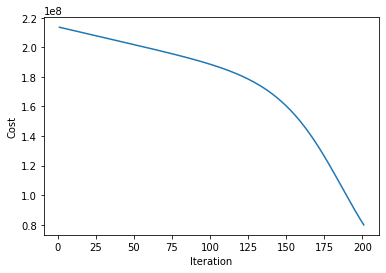

[[1.03221324e+00 2.46360623e+00 7.91218771e-01 7.69787565e-01
  7.51228753e-01 1.29742459e+00 7.90455793e+03 6.07534650e-01
  1.71469974e+00 1.15496634e+00 9.74184182e-01 1.30788332e+00
  1.29863769e+00 3.34353965e-01 1.48192880e+01 4.19719822e-01
  1.01854415e+00 5.53211383e-01 1.97593791e-01]]
95.00837587279767
-8312.935165417595
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


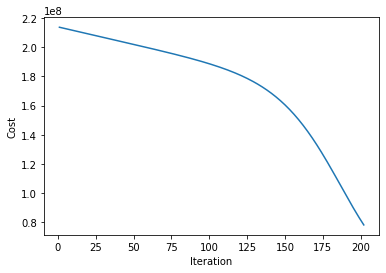

[[1.03285039e+00 2.46989887e+00 7.91411218e-01 7.70162586e-01
  7.52103383e-01 1.29840858e+00 8.08823966e+03 6.08208613e-01
  1.71705628e+00 1.15646639e+00 9.74446195e-01 1.30958783e+00
  1.30010219e+00 3.34734487e-01 1.49297434e+01 4.19913665e-01
  1.01888268e+00 5.53292514e-01 1.97700967e-01]]
95.24847720692345
-8123.628104460201
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


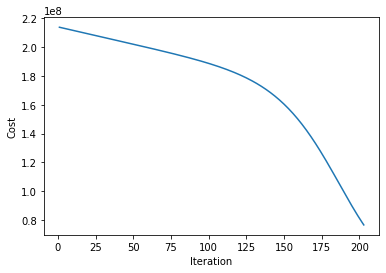

[[1.03347307e+00 2.47606060e+00 7.91599228e-01 7.70529049e-01
  7.52958631e-01 1.29937037e+00 8.27181102e+03 6.08867604e-01
  1.71936109e+00 1.15793339e+00 9.74702174e-01 1.31125479e+00
  1.30153420e+00 3.35106568e-01 1.50384296e+01 4.20103080e-01
  1.01921344e+00 5.53371766e-01 1.97805704e-01]]
95.48298490673922
-7934.372159455287
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


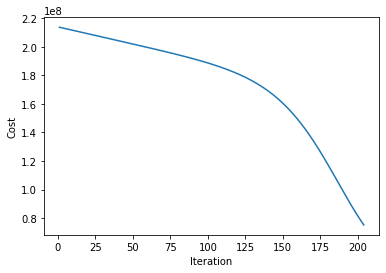

[[1.03408129e+00 2.48209055e+00 7.91782802e-01 7.70886952e-01
  7.53794455e-01 1.30030995e+00 8.45507652e+03 6.09511595e-01
  1.72161401e+00 1.15936727e+00 9.74952120e-01 1.31288412e+00
  1.30293363e+00 3.35470188e-01 1.51452991e+01 4.20288067e-01
  1.01953642e+00 5.53449141e-01 1.97908000e-01]]
95.71190625912159
-7745.362759835014
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


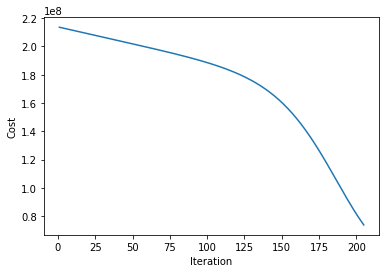

[[1.03467506e+00 2.48798803e+00 7.91961949e-01 7.71236304e-01
  7.54610835e-01 1.30122732e+00 8.63784172e+03 6.10140571e-01
  1.72381496e+00 1.16076796e+00 9.75196044e-01 1.31447576e+00
  1.30430045e+00 3.35825341e-01 1.52503078e+01 4.20468629e-01
  1.01985164e+00 5.53524643e-01 1.98007856e-01]]
95.93525431595572
-7556.794959847101
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


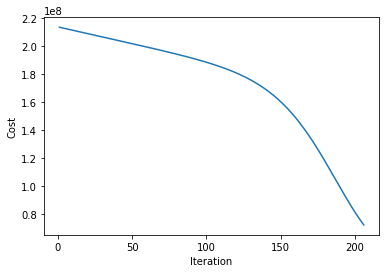

[[1.03525438e+00 2.49375251e+00 7.92136679e-01 7.71577122e-01
  7.55407775e-01 1.30212250e+00 8.81991409e+03 6.10754538e-01
  1.72596393e+00 1.16213548e+00 9.75433961e-01 1.31602969e+00
  1.30563468e+00 3.36172028e-01 1.53534149e+01 4.20644776e-01
  1.02015911e+00 5.53598277e-01 1.98105279e-01]]
96.15304785858287
-7368.8626108548315
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


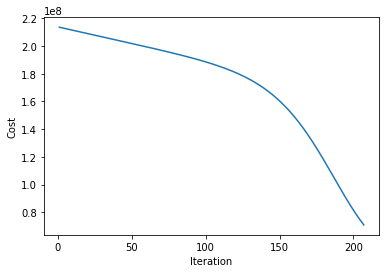

[[1.03581932e+00 2.49938363e+00 7.92307011e-01 7.71909433e-01
  7.56185299e-01 1.30299556e+00 9.00110376e+03 6.11353518e-01
  1.72806093e+00 1.16346984e+00 9.75665894e-01 1.31754596e+00
  1.30693637e+00 3.36510261e-01 1.54545833e+01 4.20816523e-01
  1.02045887e+00 5.53670052e-01 1.98200275e-01]]
96.36531133802902
-7181.757541904858
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


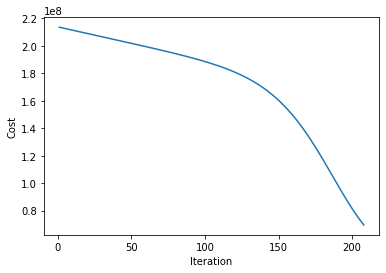

[[1.03636992e+00 2.50488123e+00 7.92472965e-01 7.72233272e-01
  7.56943457e-01 1.30384656e+00 9.18122434e+03 6.11937549e-01
  1.73010609e+00 1.16477111e+00 9.75891870e-01 1.31902464e+00
  1.30820559e+00 3.36840062e-01 1.55537798e+01 4.20983888e-01
  1.02075095e+00 5.53739975e-01 1.98292853e-01]]
96.57207479147586
-6995.66875590993
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


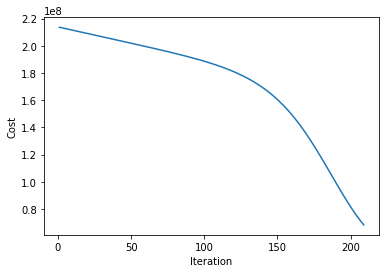

[[1.03690625e+00 2.51024531e+00 7.92634567e-01 7.72548686e-01
  7.57682317e-01 1.30467561e+00 9.36009368e+03 6.12506689e-01
  1.73209955e+00 1.16603942e+00 9.76111926e-01 1.32046586e+00
  1.30944247e+00 3.37161461e-01 1.56509744e+01 4.21146894e-01
  1.02103539e+00 5.53808060e-01 1.98383027e-01]]
96.77337373564666
-6810.7816485827025
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


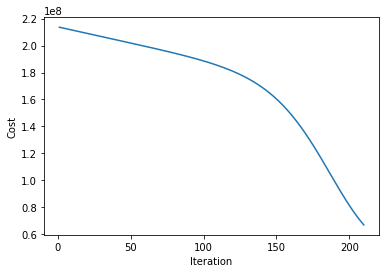

[[1.03742839e+00 2.51547604e+00 7.92791846e-01 7.72855726e-01
  7.58401972e-01 1.30548284e+00 9.53753456e+03 6.13061009e-01
  1.73404153e+00 1.16727489e+00 9.76326100e-01 1.32186978e+00
  1.31064716e+00 3.37474499e-01 1.57461414e+01 4.21305570e-01
  1.02131224e+00 5.53874317e-01 1.98470811e-01]]
96.96924903798086
-6627.27725693575
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


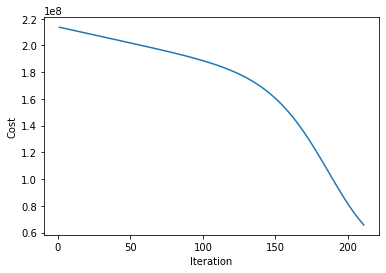

[[1.03793646e+00 2.52057377e+00 7.92944839e-01 7.73154456e-01
  7.59102534e-01 1.30626839e+00 9.71337539e+03 6.13600598e-01
  1.73593231e+00 1.16847772e+00 9.76534440e-01 1.32323660e+00
  1.31181985e+00 3.37779225e-01 1.58392584e+01 4.21459948e-01
  1.02158156e+00 5.53938764e-01 1.98556223e-01]]
97.15974676666016
-6445.33154374033
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


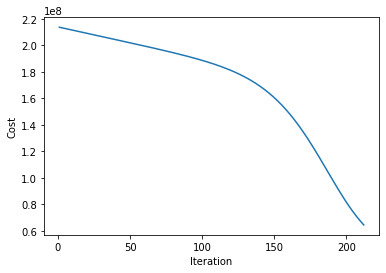

[[1.03843057e+00 2.52553900e+00 7.93093582e-01 7.73444945e-01
  7.59784137e-01 1.30703244e+00 9.88745085e+03 6.14125562e-01
  1.73777224e+00 1.16964812e+00 9.76736999e-01 1.32456659e+00
  1.31296078e+00 3.38075699e-01 1.59303070e+01 4.21610064e-01
  1.02184343e+00 5.54001416e-01 1.98639282e-01]]
97.34491802072274
-6265.114723822955
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


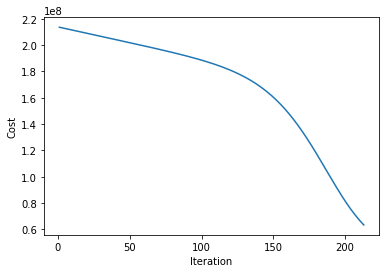

[[1.03891084e+00 2.53037241e+00 7.93238118e-01 7.73727272e-01
  7.60446934e-01 1.30777518e+00 1.00596024e+04 6.14636021e-01
  1.73956168e+00 1.17078635e+00 9.76933832e-01 1.32586002e+00
  1.31407019e+00 3.38363986e-01 1.60192726e+01 4.21755959e-01
  1.02209790e+00 5.54062291e-01 1.98720012e-01]]
97.52481874165817
-6086.790637481415
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


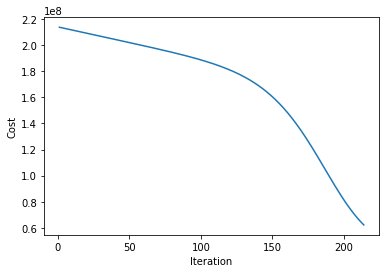

[[1.03937742e+00 2.53507482e+00 7.93378494e-01 7.74001523e-01
  7.61091097e-01 1.30849681e+00 1.02296790e+04 6.15132108e-01
  1.74130110e+00 1.17189269e+00 9.77125004e-01 1.32711721e+00
  1.31514838e+00 3.38644164e-01 1.61061441e+01 4.21897678e-01
  1.02234507e+00 5.54121411e-01 1.98798435e-01]]
97.69950950801221
-5910.516175641005
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


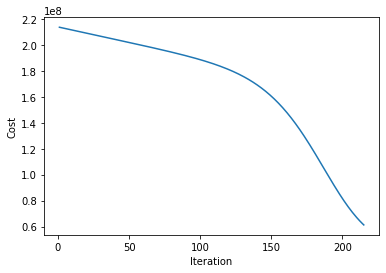

[[1.03983046e+00 2.53964722e+00 7.93514760e-01 7.74267791e-01
  7.61716819e-01 1.30919758e+00 1.03975374e+04 6.15613973e-01
  1.74299097e+00 1.17296746e+00 9.77310582e-01 1.32833854e+00
  1.31619568e+00 3.38916315e-01 1.61909144e+01 4.22035270e-01
  1.02258501e+00 5.54178795e-01 1.98874578e-01]]
97.86905531464629
-5736.440760651702
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


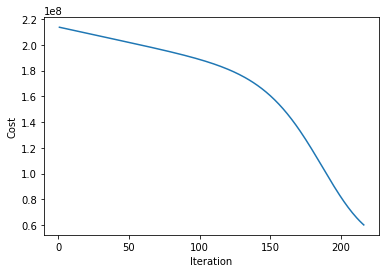

[[1.04027013e+00 2.54409074e+00 7.93646970e-01 7.74526176e-01
  7.62324307e-01 1.30987773e+00 1.05630423e+04 6.16081779e-01
  1.74463184e+00 1.17401101e+00 9.77490638e-01 1.32952439e+00
  1.31721244e+00 3.39180531e-01 1.62735797e+01 4.22168786e-01
  1.02281783e+00 5.54234466e-01 1.98948470e-01]]
98.03352533838877
-5564.705885872918
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


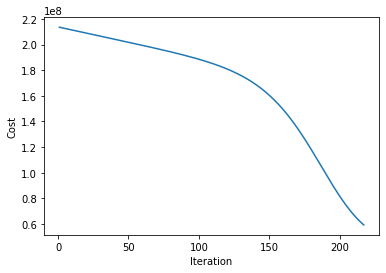

[[1.04069660e+00 2.54840663e+00 7.93775179e-01 7.74776786e-01
  7.62913787e-01 1.31053754e+00 1.07260675e+04 6.16535699e-01
  1.74622430e+00 1.17502372e+00 9.77665249e-01 1.33067520e+00
  1.31819903e+00 3.39436909e-01 1.63541398e+01 4.22298282e-01
  1.02304361e+00 5.54288450e-01 1.99020141e-01]]
98.1929926918858
-5395.444716411915
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


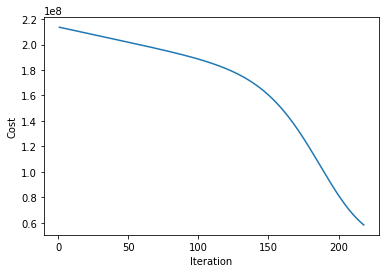

[[1.04111007e+00 2.55259631e+00 7.93899448e-01 7.75019733e-01
  7.63485500e-01 1.31117728e+00 1.08864952e+04 6.16975923e-01
  1.74776898e+00 1.17600600e+00 9.77834497e-01 1.33179142e+00
  1.31915586e+00 3.39685556e-01 1.64325978e+01 4.22423816e-01
  1.02326248e+00 5.54340772e-01 1.99089624e-01]]
98.3475341675057
-5228.781752594929
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


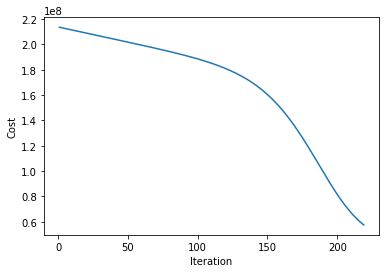

[[1.04151074e+00 2.55666129e+00 7.94019839e-01 7.75255136e-01
  7.64039701e-01 1.31179727e+00 1.10442169e+04 6.17402648e-01
  1.74926655e+00 1.17695827e+00 9.77998467e-01 1.33287356e+00
  1.32008336e+00 3.39926583e-01 1.65089605e+01 4.22545450e-01
  1.02347452e+00 5.54391457e-01 1.99156951e-01]]
98.49722997317464
-5064.832556969171
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


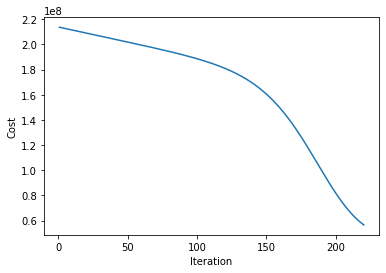

[[1.04189881e+00 2.56060321e+00 7.94136418e-01 7.75483120e-01
  7.64576661e-01 1.31239783e+00 1.11991333e+04 6.17816083e-01
  1.75071772e+00 1.17788099e+00 9.78157247e-01 1.33392212e+00
  1.32098199e+00 3.40160108e-01 1.65832373e+01 4.22663248e-01
  1.02367986e+00 5.54440535e-01 1.99222158e-01]]
98.64216346202248
-4903.703544875167
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


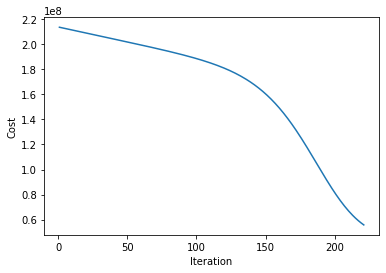

[[1.04227449e+00 2.56442384e+00 7.94249252e-01 7.75703813e-01
  7.65096662e-01 1.31297927e+00 1.13511545e+04 6.18216447e-01
  1.75212323e+00 1.17877464e+00 9.78310929e-01 1.33493764e+00
  1.32185221e+00 3.40386254e-01 1.66554411e+01 4.22777278e-01
  1.02387861e+00 5.54488034e-01 1.99285282e-01]]
98.78242085769743
-4745.4918379026985
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


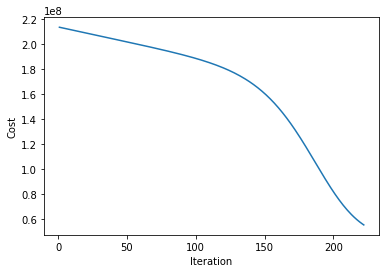

[[1.04263802e+00 2.56812502e+00 7.94358412e-01 7.75917348e-01
  7.65599998e-01 1.31354194e+00 1.15001997e+04 6.18603968e-01
  1.75348386e+00 1.17963972e+00 9.78459608e-01 1.33592070e+00
  1.32269453e+00 3.40605149e-01 1.67255875e+01 4.22887608e-01
  1.02407090e+00 5.54533982e-01 1.99346361e-01]]
98.91809097716755
-4590.285178863692
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


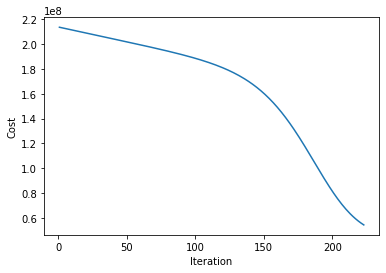

[[1.04298963e+00 2.57170871e+00 7.94463968e-01 7.76123864e-01
  7.66086974e-01 1.31408620e+00 1.16461977e+04 6.18978881e-01
  1.75480043e+00 1.18047675e+00 9.78603382e-01 1.33687189e+00
  1.32350945e+00 3.40816926e-01 1.67936949e+01 4.22994309e-01
  1.02425686e+00 5.54578412e-01 1.99405434e-01]]
99.04926495276862
-4438.161906290885
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


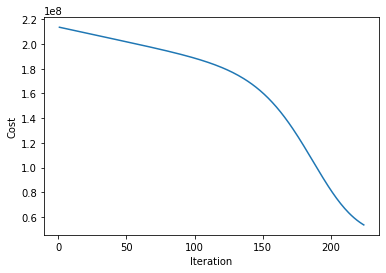

[[1.04332955e+00 2.57517694e+00 7.94565995e-01 7.76323501e-01
  7.66557903e-01 1.31461241e+00 1.17890864e+04 6.19341429e-01
  1.75607376e+00 1.18128625e+00 9.78742350e-01 1.33779180e+00
  1.32429751e+00 3.41021721e-01 1.68597842e+01 4.23097455e-01
  1.02443660e+00 5.54621354e-01 1.99462541e-01]]
99.17603595518213
-4289.190985908525
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


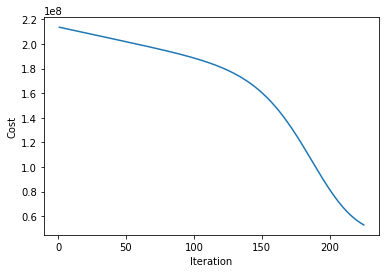

[[1.04365802e+00 2.57853183e+00 7.94664567e-01 7.76516403e-01
  7.67013108e-01 1.31512094e+00 1.19288129e+04 6.19691862e-01
  1.75730471e+00 1.18206878e+00 9.78876614e-01 1.33868105e+00
  1.32505923e+00 3.41219676e-01 1.69238788e+01 4.23197120e-01
  1.02461027e+00 5.54662840e-01 1.99517723e-01]]
99.29849891893721
-4143.432096029438
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


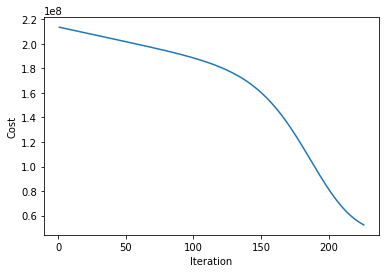

[[1.04397530e+00 2.58177557e+00 7.94759761e-01 7.76702718e-01
  7.67452919e-01 1.31561217e+00 1.20653331e+04 6.20030435e-01
  1.75849416e+00 1.18282490e+00 9.79006279e-01 1.33954030e+00
  1.32579519e+00 3.41410934e-01 1.69860045e+01 4.23293380e-01
  1.02477799e+00 5.54702902e-01 1.99571022e-01]]
99.41675027192808
-4000.9357634131084
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


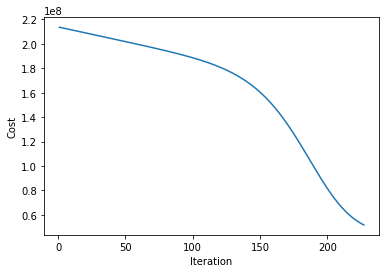

[[1.04428164e+00 2.58491039e+00 7.94851655e-01 7.76882594e-01
  7.67877673e-01 1.31608649e+00 1.21986119e+04 6.20357407e-01
  1.75964300e+00 1.18355518e+00 9.79131450e-01 1.34037019e+00
  1.32650593e+00 3.41595641e-01 1.70461889e+01 4.23386313e-01
  1.02493991e+00 5.54741573e-01 1.99622481e-01]]
99.53088767032564
-3861.743545775757
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


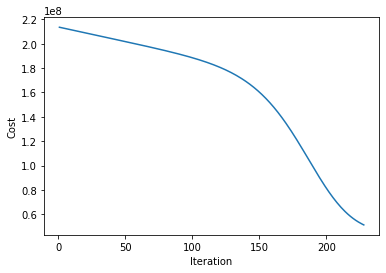

[[1.04457728e+00 2.58793860e+00 7.94940326e-01 7.77056182e-01
  7.68287710e-01 1.31654428e+00 1.23286225e+04 6.20673043e-01
  1.76075216e+00 1.18426020e+00 9.79252232e-01 1.34117138e+00
  1.32719204e+00 3.41773947e-01 1.71044618e+01 4.23475995e-01
  1.02509615e+00 5.54778887e-01 1.99672142e-01]]
99.64100974014173
-3725.888256875287
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


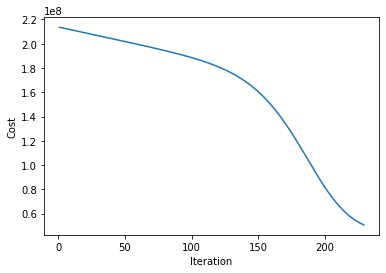

[[1.04486249e+00 2.59086255e+00 7.95025853e-01 7.77223635e-01
  7.68683378e-01 1.31698596e+00 1.24553462e+04 6.20977610e-01
  1.76182255e+00 1.18494056e+00 9.79368734e-01 1.34194454e+00
  1.32785409e+00 3.41946003e-01 1.71608546e+01 4.23562507e-01
  1.02524686e+00 5.54814876e-01 1.99720049e-01]]
99.74721582657811
-3593.3942299021783
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


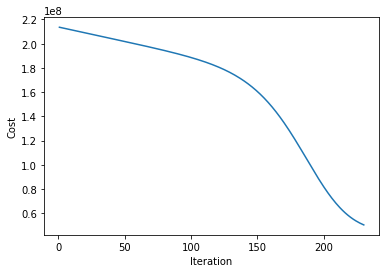

[[1.04513753e+00 2.59368462e+00 7.95108316e-01 7.77385105e-01
  7.69065025e-01 1.31741190e+00 1.25787722e+04 6.21271377e-01
  1.76285510e+00 1.18559685e+00 9.79481063e-01 1.34269034e+00
  1.32849267e+00 3.42111959e-01 1.72154004e+01 4.23645928e-01
  1.02539218e+00 5.54849574e-01 1.99766246e-01]]
99.84960575216263
-3464.2776147853433
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


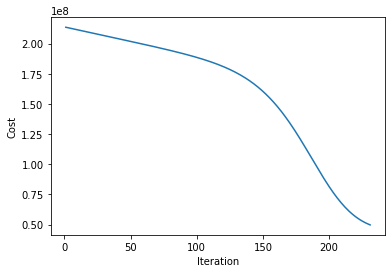

[[1.04540265e+00 2.59640723e+00 7.95187794e-01 7.77540748e-01
  7.69433004e-01 1.31782252e+00 1.26988974e+04 6.21554617e-01
  1.76385076e+00 1.18622967e+00 9.79589328e-01 1.34340948e+00
  1.32910838e+00 3.42271970e-01 1.72681336e+01 4.23726336e-01
  1.02553224e+00 5.54883014e-01 1.99810776e-01]]
99.9482795845436
-3338.5467049710965
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


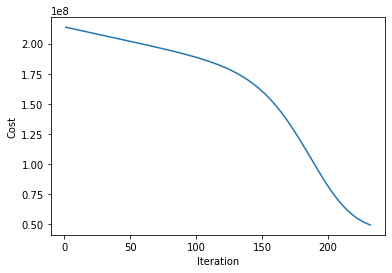

[[1.04565813e+00 2.59903283e+00 7.95264367e-01 7.77690716e-01
  7.69787667e-01 1.31821821e+00 1.28157256e+04 6.21827601e-01
  1.76481048e+00 1.18683962e+00 9.79693637e-01 1.34410264e+00
  1.32970179e+00 3.42426189e-01 1.73190899e+01 4.23803813e-01
  1.02566719e+00 5.54915232e-01 1.99853684e-01]]
100.04333741468255
-3216.202289243976
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


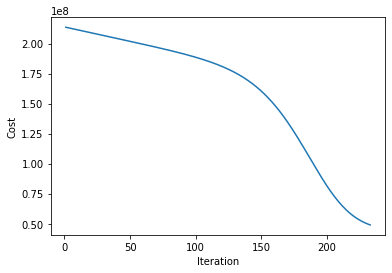

[[1.04590421e+00 2.60156386e+00 7.95338115e-01 7.77835166e-01
  7.70129369e-01 1.31859938e+00 1.29292675e+04 6.22090603e-01
  1.76573520e+00 1.18742732e+00 9.79794098e-01 1.34477050e+00
  1.33027351e+00 3.42574771e-01 1.73683062e+01 4.23878437e-01
  1.02579716e+00 5.54946259e-01 1.99895014e-01]]
100.1348791460567
-3097.2380242271697
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


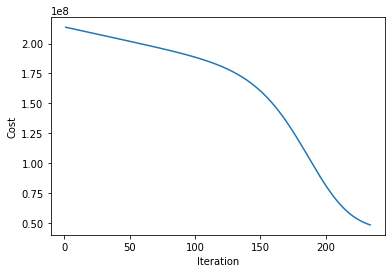

[[1.04614117e+00 2.60400280e+00 7.95409118e-01 7.77974250e-01
  7.70458464e-01 1.31896643e+00 1.30395401e+04 6.22343896e-01
  1.76662587e+00 1.18799336e+00 9.79890819e-01 1.34541376e+00
  1.33082412e+00 3.42717869e-01 1.74158203e+01 4.23950289e-01
  1.02592230e+00 5.54976130e-01 1.99934809e-01]]
100.2230042953567
-2981.6408233205834
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


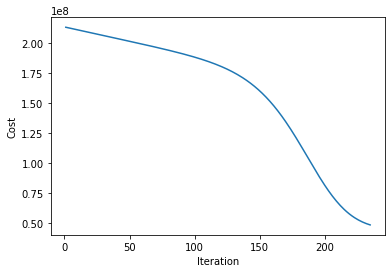

[[1.04636925e+00 2.60635212e+00 7.95477453e-01 7.78108122e-01
  7.70775304e-01 1.31931977e+00 1.31465663e+04 6.22587753e-01
  1.76748344e+00 1.18853835e+00 9.79983909e-01 1.34603309e+00
  1.33135423e+00 3.42855638e-01 1.74616707e+01 4.24019448e-01
  1.02604274e+00 5.55004878e-01 1.99973114e-01]]
100.30781180504519
-2869.391257999922
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


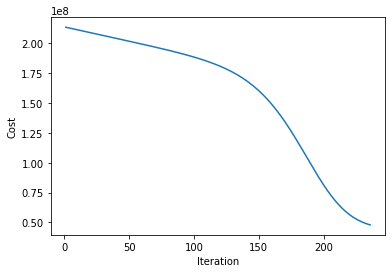

[[1.04658873e+00 2.60861429e+00 7.95543200e-01 7.78236934e-01
  7.71080243e-01 1.31965977e+00 1.32503748e+04 6.22822444e-01
  1.76830886e+00 1.18906289e+00 9.80073473e-01 1.34662919e+00
  1.33186442e+00 3.42988230e-01 1.75058967e+01 4.24085992e-01
  1.02615862e+00 5.55032536e-01 2.00009972e-01]]
100.38939986802698
-2760.4639676020665
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


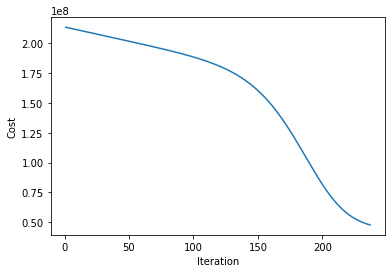

[[1.04679985e+00 2.61079179e+00 7.95606436e-01 7.78360837e-01
  7.71373628e-01 1.31998686e+00 1.33509991e+04 6.23048240e-01
  1.76910307e+00 1.18956759e+00 9.80159617e-01 1.34720273e+00
  1.33235527e+00 3.43115797e-01 1.75485380e+01 4.24150000e-01
  1.02627008e+00 5.55059137e-01 2.00045426e-01]]
100.46786576457406
-2654.8280739561565
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


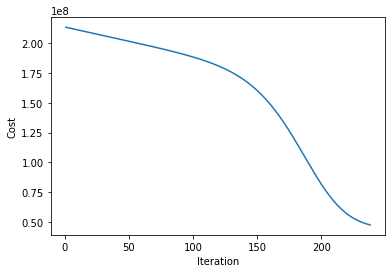

[[1.04700287e+00 2.61288706e+00 7.95667238e-01 7.78479982e-01
  7.71655806e-01 1.32030140e+00 1.34484776e+04 6.23265406e-01
  1.76986699e+00 1.19005302e+00 9.80242447e-01 1.34775439e+00
  1.33282737e+00 3.43238490e-01 1.75896347e+01 4.24211549e-01
  1.02637726e+00 5.55084713e-01 2.00079519e-01]]
100.54330571154847
-2552.4475974768206
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


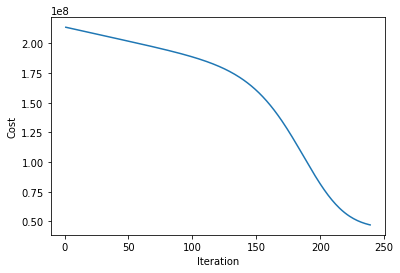

[[1.04719804e+00 2.61490254e+00 7.95725682e-01 7.78594514e-01
  7.71927120e-01 1.32060380e+00 1.35428531e+04 6.23474209e-01
  1.77060154e+00 1.19051979e+00 9.80322066e-01 1.34828483e+00
  1.33328128e+00 3.43356459e-01 1.76292273e+01 4.24270715e-01
  1.02648028e+00 5.55109297e-01 2.00112293e-01]]
100.61581472387475
-2453.2818716113093
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


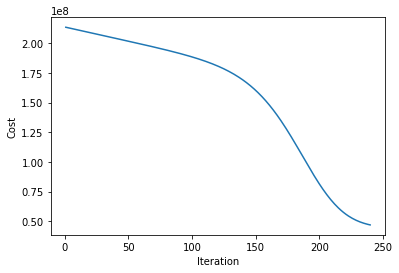

[[1.04738561e+00 2.61684065e+00 7.95781844e-01 7.78704582e-01
  7.72187910e-01 1.32089443e+00 1.36341720e+04 6.23674908e-01
  1.77130765e+00 1.19096847e+00 9.80398575e-01 1.34879472e+00
  1.33371758e+00 3.43469851e-01 1.76673563e+01 4.24327573e-01
  1.02657928e+00 5.55132920e-01 2.00143789e-01]]
100.68548648812956
-2357.2859528186978
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


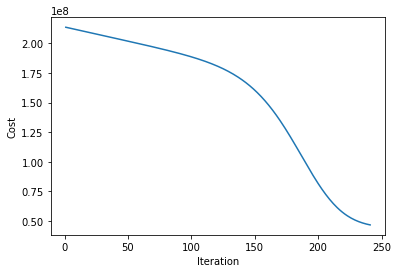

[[1.04756582e+00 2.61870378e+00 7.95835797e-01 7.78810327e-01
  7.72438510e-01 1.32117368e+00 1.37224845e+04 6.23867762e-01
  1.77198621e+00 1.19139963e+00 9.80472076e-01 1.34928470e+00
  1.33413683e+00 3.43578811e-01 1.77040622e+01 4.24382199e-01
  1.02667439e+00 5.55155613e-01 2.00174050e-01]]
100.75241324804185
-2264.411023552186
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


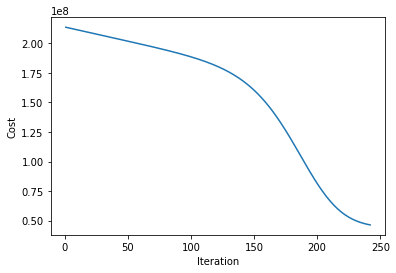

[[1.04773892e+00 2.62049430e+00 7.95887614e-01 7.78911893e-01
  7.72679248e-01 1.32144190e+00 1.38078439e+04 6.24053024e-01
  1.77263810e+00 1.19181384e+00 9.80542667e-01 1.34975542e+00
  1.33453958e+00 3.43683483e-01 1.77393856e+01 4.24434665e-01
  1.02676573e+00 5.55177407e-01 2.00203114e-01]]
100.81668570163069
-2174.6047860085914
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


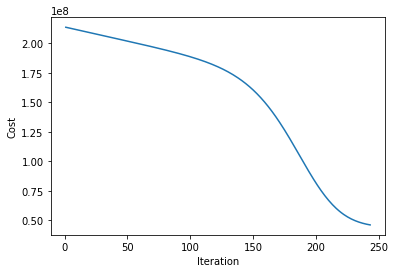

[[1.04790513e+00 2.62221452e+00 7.95937365e-01 7.79009417e-01
  7.72910451e-01 1.32169947e+00 1.38903063e+04 6.24230945e-01
  1.77326421e+00 1.19221166e+00 9.80610445e-01 1.35020751e+00
  1.33492637e+00 3.43784008e-01 1.77733669e+01 4.24485044e-01
  1.02685344e+00 5.55198333e-01 2.00231023e-01]]
100.87839290965032
-2087.811844699609
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


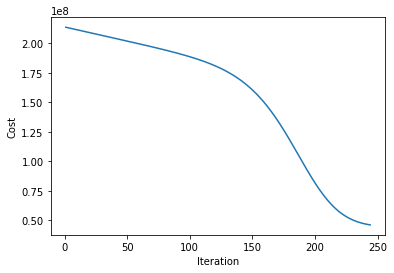

[[1.04806469e+00 2.62386676e+00 7.95985122e-01 7.79103038e-01
  7.73132436e-01 1.32194675e+00 1.39699299e+04 6.24401770e-01
  1.77386539e+00 1.19259363e+00 9.80675506e-01 1.35064159e+00
  1.33529774e+00 3.43880525e-01 1.78060461e+01 4.24533405e-01
  1.02693763e+00 5.55218418e-01 2.00257815e-01]]
100.93762221496287
-2003.9740761819385
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


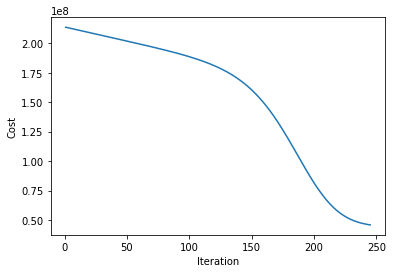

[[1.04821784e+00 2.62545325e+00 7.96030953e-01 7.79192887e-01
  7.73345515e-01 1.32218408e+00 1.40467755e+04 6.24565741e-01
  1.77444248e+00 1.19296029e+00 9.80737944e-01 1.35105828e+00
  1.33565421e+00 3.43973169e-01 1.78374630e+01 4.24579818e-01
  1.02701843e+00 5.55237693e-01 2.00283528e-01]]
100.9944591724183
-1923.0309845552738
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


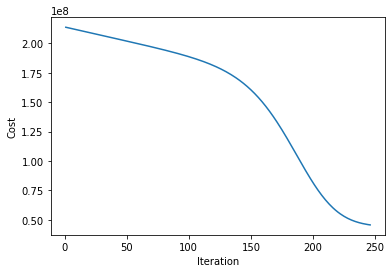

[[1.04836478e+00 2.62697623e+00 7.96074924e-01 7.79279097e-01
  7.73549997e-01 1.32241182e+00 1.41209053e+04 6.24723092e-01
  1.77499631e+00 1.19331217e+00 9.80797849e-01 1.35145816e+00
  1.33599628e+00 3.44062074e-01 1.78676569e+01 4.24624351e-01
  1.02709595e+00 5.55256186e-01 2.00308199e-01]]
101.04898748878713
-1844.9200415967066
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


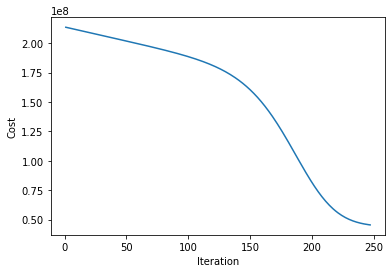

[[1.04850574e+00 2.62843786e+00 7.96117103e-01 7.79361795e-01
  7.73746179e-01 1.32263029e+00 1.41923829e+04 6.24874055e-01
  1.77552769e+00 1.19364977e+00 9.80855311e-01 1.35184182e+00
  1.33632448e+00 3.44147370e-01 1.78966669e+01 4.24667069e-01
  1.02717031e+00 5.55273924e-01 2.00331866e-01]]
101.10128897226598
-1769.5770106431958
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


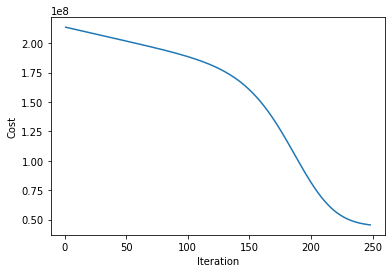

[[1.04864094e+00 2.62984026e+00 7.96157551e-01 7.79441108e-01
  7.73934356e-01 1.32283983e+00 1.42612734e+04 6.25018857e-01
  1.77603741e+00 1.19397361e+00 9.80910417e-01 1.35220984e+00
  1.33663927e+00 3.44229185e-01 1.79245311e+01 4.24708038e-01
  1.02724163e+00 5.55290934e-01 2.00354565e-01]]
101.15144349105577
-1696.9362535612404
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


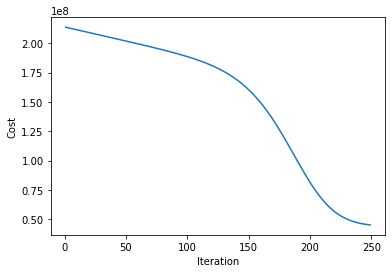

[[1.04877057e+00 2.63118553e+00 7.96196334e-01 7.79517155e-01
  7.74114813e-01 1.32304075e+00 1.43276425e+04 6.25157717e-01
  1.77652624e+00 1.19428417e+00 9.80963254e-01 1.35256278e+00
  1.33694116e+00 3.44307644e-01 1.79512874e+01 4.24747321e-01
  1.02731001e+00 5.55307243e-01 2.00376329e-01]]
101.19952894049955
-1626.931020351586
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


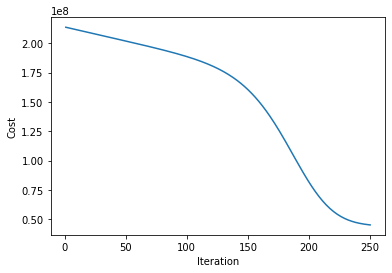

[[1.04889484e+00 2.63247570e+00 7.96233510e-01 7.79590058e-01
  7.74287831e-01 1.32323338e+00 1.43915566e+04 6.25290850e-01
  1.77699494e+00 1.19458194e+00 9.81013902e-01 1.35290117e+00
  1.33723059e+00 3.44382867e-01 1.79769730e+01 4.24784979e-01
  1.02737555e+00 5.55322877e-01 2.00397193e-01]]
101.24562121825878
-1559.4937211275278
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


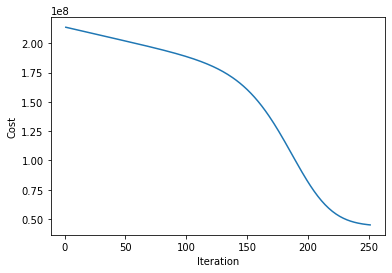

[[1.04901396e+00 2.63371275e+00 7.96269140e-01 7.79659932e-01
  7.74453681e-01 1.32341801e+00 1.44530825e+04 6.25418468e-01
  1.77744424e+00 1.19486738e+00 9.81062445e-01 1.35322555e+00
  1.33750803e+00 3.44454974e-01 1.80016242e+01 4.24821072e-01
  1.02743838e+00 5.55337860e-01 2.00417191e-01]]
101.28979420700472
-1494.556180377287
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


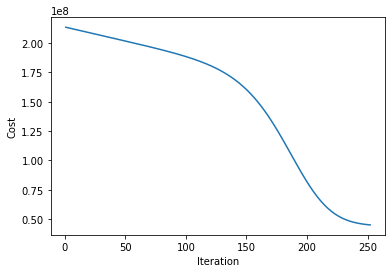

[[1.04912810e+00 2.63489862e+00 7.96303282e-01 7.79726889e-01
  7.74612630e-01 1.32359495e+00 1.45122874e+04 6.25540772e-01
  1.77787486e+00 1.19514095e+00 9.81108959e-01 1.35353644e+00
  1.33777393e+00 3.44524080e-01 1.80252768e+01 4.24855659e-01
  1.02749857e+00 5.55352217e-01 2.00436354e-01]]
101.33211976410291
-1432.0498735740284
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


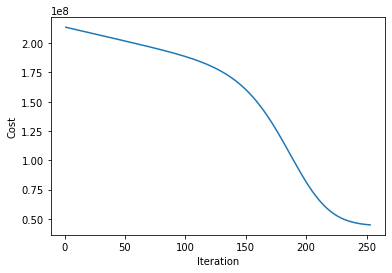

[[1.04923747e+00 2.63603520e+00 7.96335991e-01 7.79791040e-01
  7.74764934e-01 1.32376447e+00 1.45692380e+04 6.25657963e-01
  1.77828749e+00 1.19540309e+00 9.81153522e-01 1.35383435e+00
  1.33802870e+00 3.44590297e-01 1.80479658e+01 4.24888795e-01
  1.02755625e+00 5.55365971e-01 2.00454715e-01]]
101.3726677177751
-1371.9061463322614
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


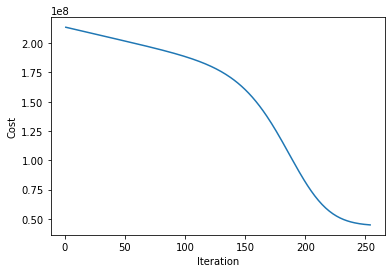

[[1.04934223e+00 2.63712432e+00 7.96367322e-01 7.79852490e-01
  7.74910844e-01 1.32392687e+00 1.46240012e+04 6.25770234e-01
  1.77868281e+00 1.19565422e+00 9.81196208e-01 1.35411975e+00
  1.33827278e+00 3.44653734e-01 1.80697255e+01 4.24920537e-01
  1.02761149e+00 5.55379146e-01 2.00472302e-01]]
101.411505869232
-1314.056416426334
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


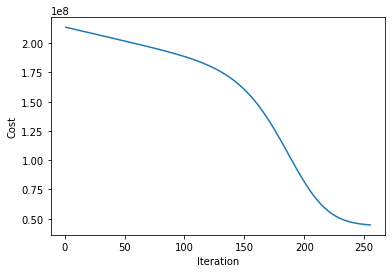

[[1.04944257e+00 2.63816777e+00 7.96397328e-01 7.79911345e-01
  7.75050604e-01 1.32408242e+00 1.46766435e+04 6.25877771e-01
  1.77906149e+00 1.19589478e+00 9.81237089e-01 1.35439313e+00
  1.33850657e+00 3.44714496e-01 1.80905892e+01 4.24950937e-01
  1.02766440e+00 5.55391763e-01 2.00489147e-01]]
101.44870000028264
-1258.4323590875329
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


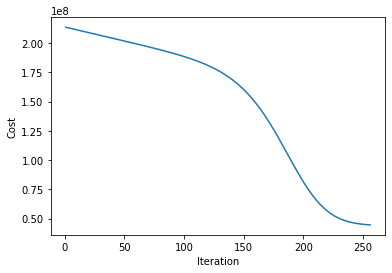

[[1.04953865e+00 2.63916729e+00 7.96426060e-01 7.79967702e-01
  7.75184450e-01 1.32423137e+00 1.47272306e+04 6.25980757e-01
  1.77942415e+00 1.19612517e+00 9.81276234e-01 1.35465495e+00
  1.33873047e+00 3.44772688e-01 1.81105895e+01 4.24980048e-01
  1.02771507e+00 5.55403844e-01 2.00505277e-01]]
101.48431388594099
-1204.96607608044
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


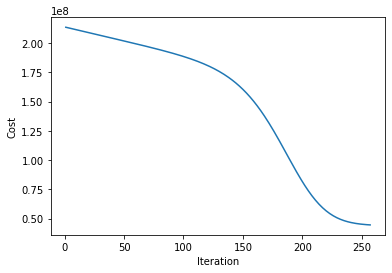

[[1.04963065e+00 2.64012455e+00 7.96453568e-01 7.80021661e-01
  7.75312612e-01 1.32437399e+00 1.47758278e+04 6.26079369e-01
  1.77977142e+00 1.19634577e+00 9.81313712e-01 1.35490565e+00
  1.33894486e+00 3.44828407e-01 1.81297582e+01 4.25007920e-01
  1.02776357e+00 5.55415411e-01 2.00520721e-01]]
101.51840931156718
-1153.5902491292736
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


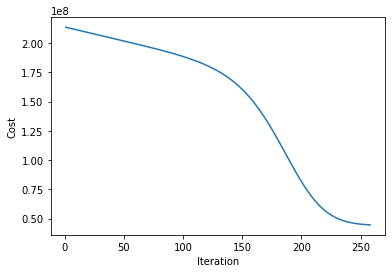

[[1.04971872e+00 2.64104118e+00 7.96479901e-01 7.80073315e-01
  7.75435311e-01 1.32451052e+00 1.48224994e+04 6.26173776e-01
  1.78010390e+00 1.19655698e+00 9.81349588e-01 1.35514567e+00
  1.33915011e+00 3.44881752e-01 1.81481263e+01 4.25034601e-01
  1.02781000e+00 5.55426483e-01 2.00535505e-01]]
101.55104609409933
-1104.2382783200421
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


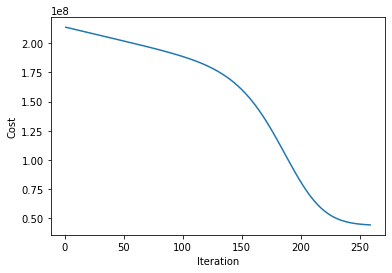

[[1.04980301e+00 2.64191879e+00 7.96505103e-01 7.80122756e-01
  7.75552763e-01 1.32464120e+00 1.48673090e+04 6.26264146e-01
  1.78042217e+00 1.19675915e+00 9.81383926e-01 1.35537543e+00
  1.33934658e+00 3.44932814e-01 1.81657239e+01 4.25060138e-01
  1.02785445e+00 5.55437080e-01 2.00549656e-01]]
101.58228210695181
-1056.8444061484367
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


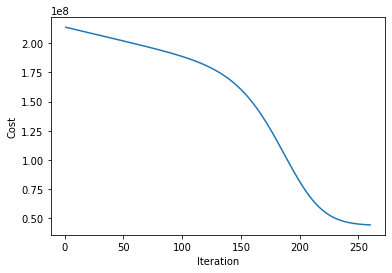

[[1.04988369e+00 2.64275888e+00 7.96529222e-01 7.80170070e-01
  7.75665175e-01 1.32476627e+00 1.49103190e+04 6.26350637e-01
  1.78072679e+00 1.19695266e+00 9.81416786e-01 1.35559534e+00
  1.33953461e+00 3.44981686e-01 1.81825801e+01 4.25084578e-01
  1.02789698e+00 5.55447221e-01 2.00563198e-01]]
101.61217330817615
-1011.3438279143747
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


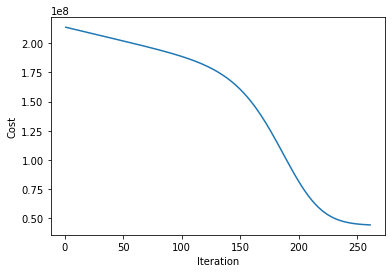

[[1.04996088e+00 2.64356296e+00 7.96552300e-01 7.80215345e-01
  7.75772748e-01 1.32488596e+00 1.49515908e+04 6.26433404e-01
  1.78101831e+00 1.19713784e+00 9.81448228e-01 1.35580579e+00
  1.33971456e+00 3.45028454e-01 1.81987235e+01 4.25107963e-01
  1.02793767e+00 5.55456924e-01 2.00576157e-01]]
101.64077377150278
-967.6727891860228
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


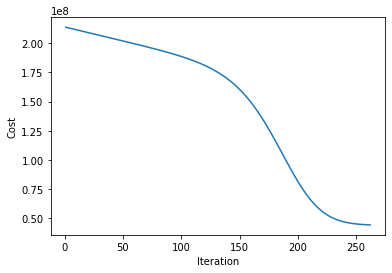

[[1.05003474e+00 2.64433245e+00 7.96574379e-01 7.80258661e-01
  7.75875677e-01 1.32500046e+00 1.49911847e+04 6.26512598e-01
  1.78129724e+00 1.19731502e+00 9.81478310e-01 1.35600715e+00
  1.33988673e+00 3.45073203e-01 1.82141815e+01 4.25130337e-01
  1.02797661e+00 5.55466207e-01 2.00588555e-01]]
101.66813571990282
-925.7686710681584
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


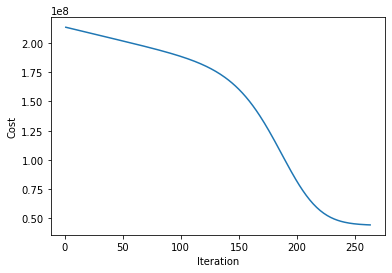

[[1.05010539e+00 2.64506874e+00 7.96595500e-01 7.80300099e-01
  7.75974150e-01 1.32511001e+00 1.50291597e+04 6.26588363e-01
  1.78156411e+00 1.19748454e+00 9.81507087e-01 1.35619980e+00
  1.34005145e+00 3.45116014e-01 1.82289808e+01 4.25151741e-01
  1.02801385e+00 5.55475087e-01 2.00600416e-01]]
101.6943095613315
-885.5700640141342
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


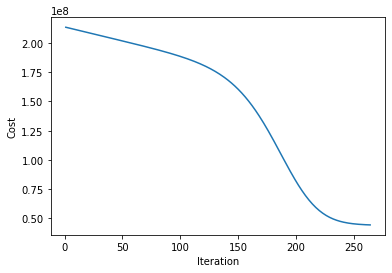

[[1.05017298e+00 2.64577317e+00 7.96615702e-01 7.80339735e-01
  7.76068348e-01 1.32521480e+00 1.50655734e+04 6.26660838e-01
  1.78181940e+00 1.19764670e+00 9.81534611e-01 1.35638408e+00
  1.34020902e+00 3.45156967e-01 1.82431474e+01 4.25172214e-01
  1.02804948e+00 5.55483581e-01 2.00611760e-01]]
101.7193439263363
-847.0168309177086
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


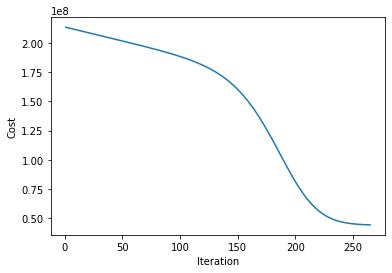

[[1.05023762e+00 2.64644704e+00 7.96635023e-01 7.80377643e-01
  7.76158446e-01 1.32531502e+00 1.51004823e+04 6.26730158e-01
  1.78206358e+00 1.19780181e+00 9.81560935e-01 1.35656035e+00
  1.34035973e+00 3.45196137e-01 1.82567062e+01 4.25191794e-01
  1.02808355e+00 5.55491704e-01 2.00622611e-01]]
101.74328570723453
-810.0501602123092
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


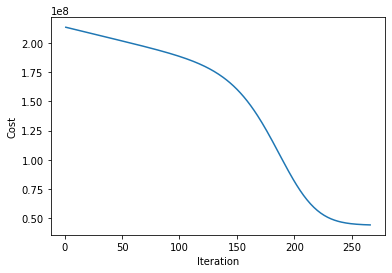

[[1.05029943e+00 2.64709160e+00 7.96653499e-01 7.80413894e-01
  7.76244612e-01 1.32541086e+00 1.51339413e+04 6.26796453e-01
  1.78229711e+00 1.19795015e+00 9.81586108e-01 1.35672893e+00
  1.34050386e+00 3.45233597e-01 1.82696814e+01 4.25210518e-01
  1.02811613e+00 5.55499472e-01 2.00632987e-01]]
101.76618009858603
-774.6126096911602
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


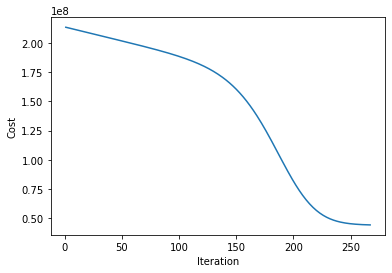

[[1.05035854e+00 2.64770804e+00 7.96671165e-01 7.80448557e-01
  7.76327009e-01 1.32550251e+00 1.51660042e+04 6.26859848e-01
  1.78252043e+00 1.19809200e+00 9.81610178e-01 1.35689014e+00
  1.34064168e+00 3.45269419e-01 1.82820966e+01 4.25228423e-01
  1.02814729e+00 5.55506900e-01 2.00642909e-01]]
101.78807063870724
-740.6481417435639
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


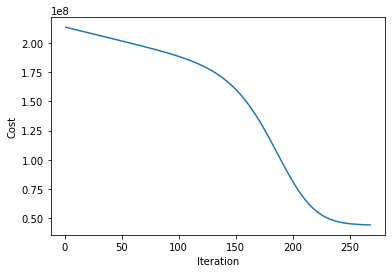

[[1.05041505e+00 2.64829753e+00 7.96688056e-01 7.80481699e-01
  7.76405794e-01 1.32559013e+00 1.51967231e+04 6.26920463e-01
  1.78273397e+00 1.19822764e+00 9.81633190e-01 1.35704428e+00
  1.34077347e+00 3.45303670e-01 1.82939743e+01 4.25245541e-01
  1.02817708e+00 5.55514001e-01 2.00652395e-01]]
101.80899925199301
-708.102150680671
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


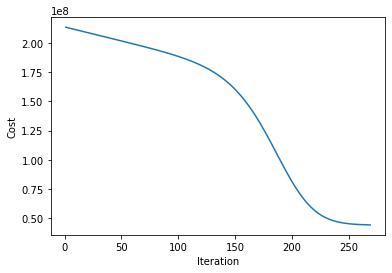

[[1.05046908e+00 2.64886119e+00 7.96704203e-01 7.80513383e-01
  7.76481117e-01 1.32567391e+00 1.52261488e+04 6.26978415e-01
  1.78293813e+00 1.19835731e+00 9.81655190e-01 1.35719165e+00
  1.34089946e+00 3.45336417e-01 1.83053363e+01 4.25261906e-01
  1.02820555e+00 5.55520789e-01 2.00661464e-01]]
101.82900629183145
-676.9214827995936
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


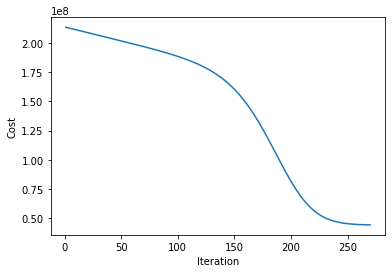

[[1.05052073e+00 2.64940009e+00 7.96719637e-01 7.80543670e-01
  7.76553124e-01 1.32575399e+00 1.52543306e+04 6.27033814e-01
  1.78313330e+00 1.19848128e+00 9.81676220e-01 1.35733253e+00
  1.34101991e+00 3.45367721e-01 1.83162038e+01 4.25277550e-01
  1.02823277e+00 5.55527279e-01 2.00670133e-01]]
101.84813058391538
-647.0544498079392
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


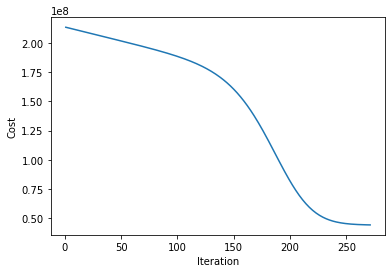

[[1.05057009e+00 2.64991528e+00 7.96734390e-01 7.80572619e-01
  7.76621954e-01 1.32583054e+00 1.52813165e+04 6.27086770e-01
  1.78331986e+00 1.19859978e+00 9.81696321e-01 1.35746721e+00
  1.34113504e+00 3.45397645e-01 1.83265970e+01 4.25292503e-01
  1.02825879e+00 5.55533481e-01 2.00678420e-01]]
101.86640946977204
-618.450836202321
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


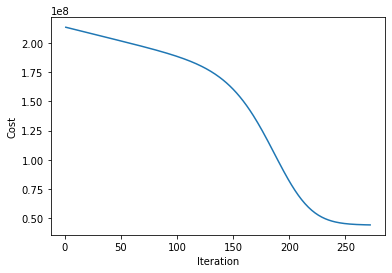

[[1.05061728e+00 2.65040774e+00 7.96748490e-01 7.80600287e-01
  7.76687742e-01 1.32590370e+00 1.53071529e+04 6.27137384e-01
  1.78349818e+00 1.19871305e+00 9.81715531e-01 1.35759592e+00
  1.34124508e+00 3.45426245e-01 1.83365356e+01 4.25306794e-01
  1.02828366e+00 5.55539409e-01 2.00686340e-01]]
101.88387885034876
-591.0619011650747
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


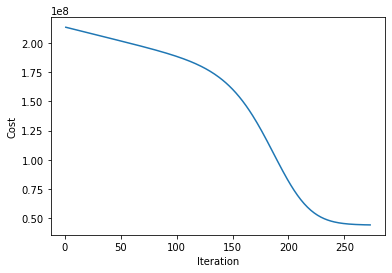

[[1.05066237e+00 2.65087845e+00 7.96761964e-01 7.80626729e-01
  7.76750616e-01 1.32597362e+00 1.53318848e+04 6.27185757e-01
  1.78366861e+00 1.19882130e+00 9.81733890e-01 1.35771894e+00
  1.34135025e+00 3.45453579e-01 1.83460384e+01 4.25320451e-01
  1.02830742e+00 5.55545073e-01 2.00693908e-01]]
101.90057322950854
-564.8403755131269
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


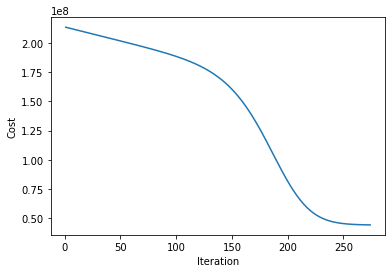

[[1.05070546e+00 2.65132832e+00 7.96774840e-01 7.80651996e-01
  7.76810702e-01 1.32604043e+00 1.53555560e+04 6.27231984e-01
  1.78383147e+00 1.19892474e+00 9.81751433e-01 1.35783651e+00
  1.34145075e+00 3.45479701e-01 1.83551236e+01 4.25333502e-01
  1.02833013e+00 5.55550486e-01 2.00701141e-01]]
101.91652575730392
-539.7404542024391
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


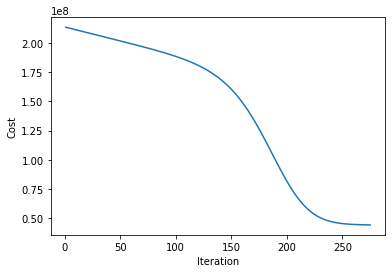

[[1.05074663e+00 2.65175824e+00 7.96787143e-01 7.80676140e-01
  7.76868117e-01 1.32610428e+00 1.53782085e+04 6.27276157e-01
  1.78398711e+00 1.19902360e+00 9.81768196e-01 1.35794885e+00
  1.34154679e+00 3.45504662e-01 1.83638088e+01 4.25345973e-01
  1.02835183e+00 5.55555659e-01 2.00708052e-01]]
101.93176827291214
-515.7177848612355
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


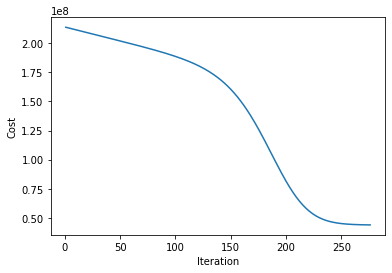

[[1.05078597e+00 2.65216906e+00 7.96798898e-01 7.80699208e-01
  7.76922978e-01 1.32616528e+00 1.53998831e+04 6.27318364e-01
  1.78413582e+00 1.19911805e+00 9.81784212e-01 1.35805619e+00
  1.34163855e+00 3.45528512e-01 1.83721108e+01 4.25357888e-01
  1.02837256e+00 5.55560600e-01 2.00714655e-01]]
101.94633134712699
-492.7294527947895
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


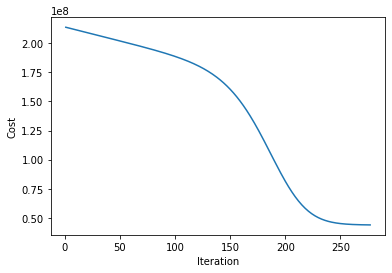

[[1.05082355e+00 2.65256160e+00 7.96810128e-01 7.80721247e-01
  7.76975393e-01 1.32622356e+00 1.54206194e+04 6.27358689e-01
  1.78427790e+00 1.19920830e+00 9.81799513e-01 1.35815875e+00
  1.34172623e+00 3.45551298e-01 1.83800457e+01 4.25369271e-01
  1.02839236e+00 5.55565322e-01 2.00720964e-01]]
101.96024432431541
-470.7339628751964
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


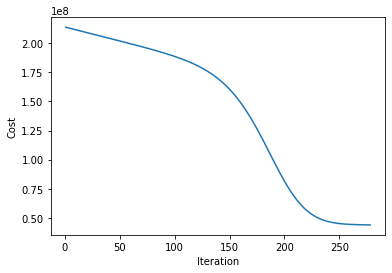

[[1.05085946e+00 2.65293665e+00 7.96820857e-01 7.80742302e-01
  7.77025468e-01 1.32627924e+00 1.54404555e+04 6.27397215e-01
  1.78441364e+00 1.19929451e+00 9.81814131e-01 1.35825673e+00
  1.34180999e+00 3.45573068e-01 1.83876292e+01 4.25380146e-01
  1.02841128e+00 5.55569832e-01 2.00726990e-01]]
101.97353536375817
-449.691218700651
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


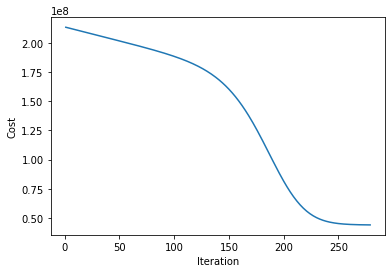

[[1.05089376e+00 2.65329497e+00 7.96831105e-01 7.80762415e-01
  7.77073305e-01 1.32633243e+00 1.54594280e+04 6.27434018e-01
  1.78454332e+00 1.19937688e+00 9.81828094e-01 1.35835033e+00
  1.34189000e+00 3.45593865e-01 1.83948763e+01 4.25390534e-01
  1.02842936e+00 5.55574140e-01 2.00732747e-01]]
101.98623148030431
-429.5624993805268
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


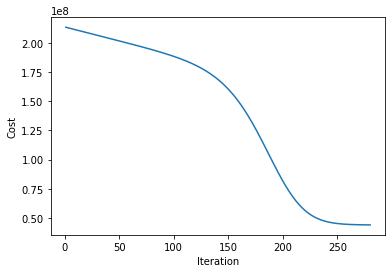

[[1.05092652e+00 2.65363727e+00 7.96840894e-01 7.80781626e-01
  7.77119001e-01 1.32638324e+00 1.54775724e+04 6.27469173e-01
  1.78466719e+00 1.19945556e+00 9.81841432e-01 1.35843975e+00
  1.34196643e+00 3.45613730e-01 1.84018013e+01 4.25400457e-01
  1.02844662e+00 5.55578255e-01 2.00738247e-01]]
101.99835858427912
-410.3104342760748
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


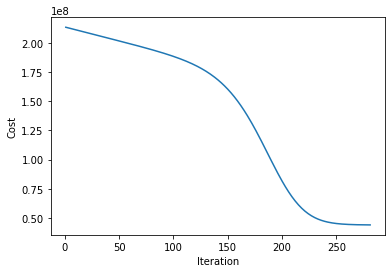

[[1.05095782e+00 2.65396425e+00 7.96850244e-01 7.80799976e-01
  7.77162649e-01 1.32643177e+00 1.54949231e+04 6.27502753e-01
  1.78478551e+00 1.19953071e+00 9.81854171e-01 1.35852516e+00
  1.34203944e+00 3.45632706e-01 1.84084180e+01 4.25409935e-01
  1.02846311e+00 5.55582186e-01 2.00743499e-01]]
102.00994152059405
-391.89897600019395
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


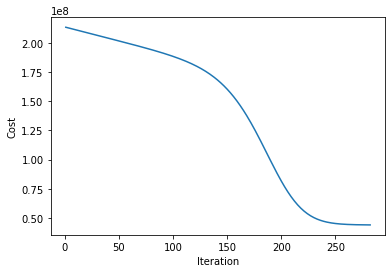

[[1.05098771e+00 2.65427659e+00 7.96859174e-01 7.80817503e-01
  7.77204338e-01 1.32647812e+00 1.55115128e+04 6.27534827e-01
  1.78489853e+00 1.19960249e+00 9.81866338e-01 1.35860673e+00
  1.34210917e+00 3.45650829e-01 1.84147398e+01 4.25418987e-01
  1.02847886e+00 5.55585940e-01 2.00748516e-01]]
102.02100410701546
-374.293371955333
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


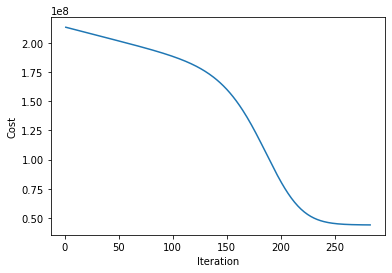

[[1.05101625e+00 2.65457491e+00 7.96867703e-01 7.80834241e-01
  7.77244155e-01 1.32652238e+00 1.55273734e+04 6.27565459e-01
  1.78500647e+00 1.19967105e+00 9.81877958e-01 1.35868464e+00
  1.34217577e+00 3.45668139e-01 1.84207793e+01 4.25427633e-01
  1.02849390e+00 5.55589525e-01 2.00753308e-01]]
102.03156917155636
-357.46013466494395
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


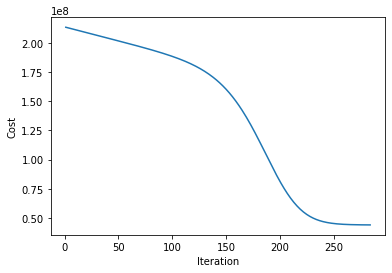

[[1.05104351e+00 2.65485983e+00 7.96875847e-01 7.80850226e-01
  7.77282181e-01 1.32656466e+00 1.55425355e+04 6.27594714e-01
  1.78510955e+00 1.19973652e+00 9.81889056e-01 1.35875905e+00
  1.34223938e+00 3.45684670e-01 1.84265488e+01 4.25435889e-01
  1.02850827e+00 5.55592949e-01 2.00757883e-01]]
102.04165858896263
-341.3670111317975
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


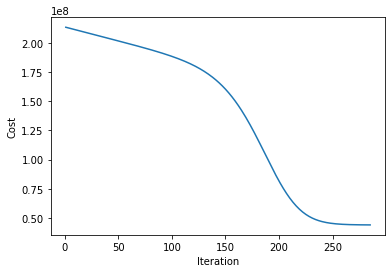

[[1.05106955e+00 2.65513194e+00 7.96883625e-01 7.80865491e-01
  7.77318495e-01 1.32660503e+00 1.55570284e+04 6.27622651e-01
  1.78520800e+00 1.19979905e+00 9.81899653e-01 1.35883011e+00
  1.34230012e+00 3.45700457e-01 1.84320600e+01 4.25443774e-01
  1.02852199e+00 5.55596219e-01 2.00762253e-01]]
102.0512933162711
-325.9829514352859
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


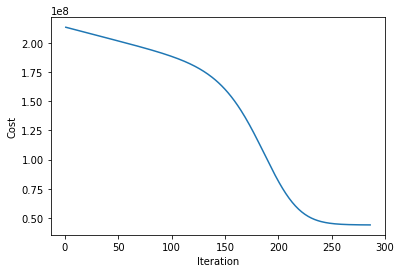

[[1.05109441e+00 2.65539181e+00 7.96891052e-01 7.80880068e-01
  7.77353172e-01 1.32664358e+00 1.55708804e+04 6.27649330e-01
  1.78530201e+00 1.19985876e+00 9.81909772e-01 1.35889797e+00
  1.34235812e+00 3.45715533e-01 1.84373242e+01 4.25451303e-01
  1.02853509e+00 5.55599341e-01 2.00766426e-01]]
102.06049342742257
-311.27807676025566
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


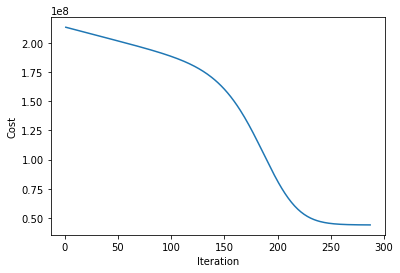

[[1.05111815e+00 2.65563996e+00 7.96898144e-01 7.80893987e-01
  7.77386286e-01 1.32668040e+00 1.55841188e+04 6.27674805e-01
  1.78539178e+00 1.19991577e+00 9.81919435e-01 1.35896276e+00
  1.34241351e+00 3.45729928e-01 1.84423522e+01 4.25458492e-01
  1.02854759e+00 5.55602322e-01 2.00770410e-01]]
102.06927814691838
-297.2236470313087
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


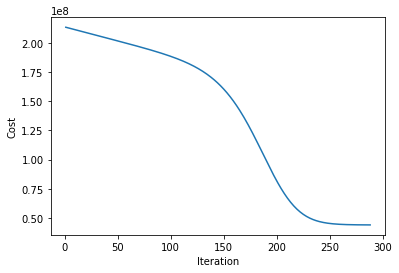

[[1.05114081e+00 2.65587693e+00 7.96904915e-01 7.80907277e-01
  7.77417904e-01 1.32671555e+00 1.55967697e+04 6.27699130e-01
  1.78547750e+00 1.19997022e+00 9.81928660e-01 1.35902463e+00
  1.34246639e+00 3.45743674e-01 1.84471542e+01 4.25465356e-01
  1.02855954e+00 5.55605169e-01 2.00774214e-01]]
102.07766588251326
-283.79202830921605
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


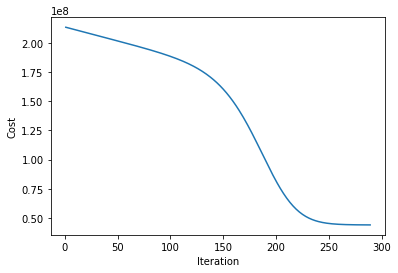

[[1.05116245e+00 2.65610319e+00 7.96911380e-01 7.80919966e-01
  7.77448094e-01 1.32674911e+00 1.56088582e+04 6.27722355e-01
  1.78555934e+00 1.20002220e+00 9.81937469e-01 1.35908371e+00
  1.34251689e+00 3.45756798e-01 1.84517403e+01 4.25471910e-01
  1.02857094e+00 5.55607886e-01 2.00777847e-01]]
102.08567425694169
-270.95666008986865
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


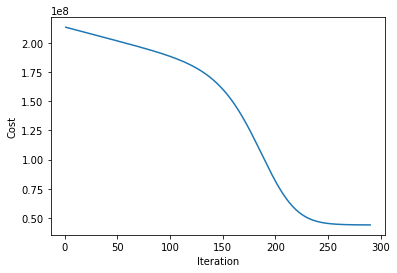

[[1.05118312e+00 2.65631923e+00 7.96917552e-01 7.80932081e-01
  7.77476918e-01 1.32678115e+00 1.56204085e+04 6.27744530e-01
  1.78563749e+00 1.20007183e+00 9.81945879e-01 1.35914011e+00
  1.34256510e+00 3.45769329e-01 1.84561198e+01 4.25478167e-01
  1.02858183e+00 5.55610481e-01 2.00781315e-01]]
102.09332013867862
-258.69202263139005
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


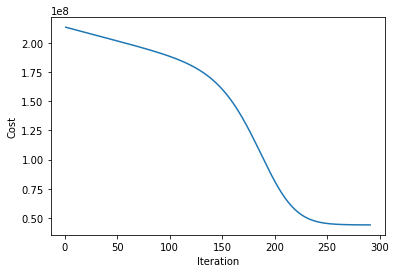

[[1.05120284e+00 2.65652551e+00 7.96923445e-01 7.80943647e-01
  7.77504437e-01 1.32681174e+00 1.56314437e+04 6.27765702e-01
  1.78571209e+00 1.20011922e+00 9.81953908e-01 1.35919396e+00
  1.34261113e+00 3.45781292e-01 1.84603020e+01 4.25484142e-01
  1.02859222e+00 5.55612958e-01 2.00784625e-01]]
102.10061967173858
-246.97360442088
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


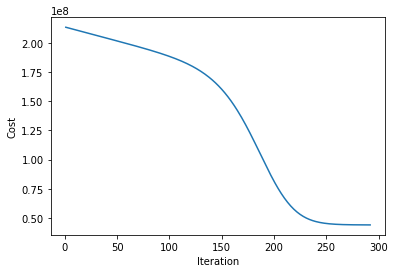

[[1.05122167e+00 2.65672244e+00 7.96929071e-01 7.80954689e-01
  7.77530710e-01 1.32684095e+00 1.56419861e+04 6.27785914e-01
  1.78578332e+00 1.20016445e+00 9.81961574e-01 1.35924538e+00
  1.34265508e+00 3.45792714e-01 1.84642955e+01 4.25489845e-01
  1.02860214e+00 5.55615323e-01 2.00787786e-01]]
102.10758830452032
-235.7778698795806
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


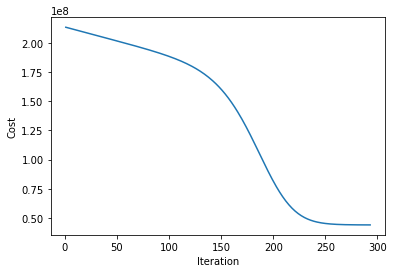

[[1.05123965e+00 2.65691046e+00 7.96934442e-01 7.80965231e-01
  7.77555792e-01 1.32686883e+00 1.56520571e+04 6.27805210e-01
  1.78585132e+00 1.20020764e+00 9.81968891e-01 1.35929446e+00
  1.34269703e+00 3.45803618e-01 1.84681086e+01 4.25495290e-01
  1.02861161e+00 5.55617581e-01 2.00790804e-01]]
102.11424081770657
-225.08222739331023
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


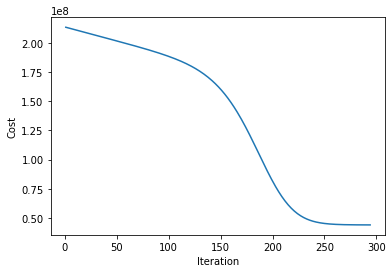

[[1.05125682e+00 2.65708996e+00 7.96939569e-01 7.80975294e-01
  7.77579736e-01 1.32689545e+00 1.56616771e+04 6.27823630e-01
  1.78591624e+00 1.20024887e+00 9.81975877e-01 1.35934131e+00
  1.34273708e+00 3.45814027e-01 1.84717494e+01 4.25500487e-01
  1.02862066e+00 5.55619736e-01 2.00793685e-01]]
102.12059135123074
-214.86499774413798
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


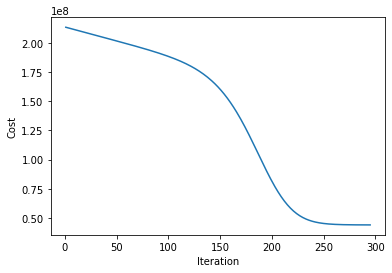

[[1.05127320e+00 2.65726131e+00 7.96944463e-01 7.80984900e-01
  7.77602593e-01 1.32692086e+00 1.56708658e+04 6.27841215e-01
  1.78597821e+00 1.20028823e+00 9.81982545e-01 1.35938604e+00
  1.34277531e+00 3.45823964e-01 1.84752255e+01 4.25505449e-01
  1.02862929e+00 5.55621793e-01 2.00796434e-01]]
102.12665343032442
-205.10538300917977
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


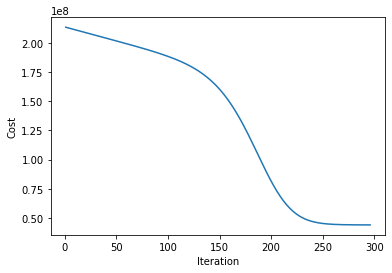

[[1.05128884e+00 2.65742489e+00 7.96949134e-01 7.80994070e-01
  7.77624413e-01 1.32694511e+00 1.56796420e+04 6.27858001e-01
  1.78603736e+00 1.20032580e+00 9.81988910e-01 1.35942874e+00
  1.34281180e+00 3.45833449e-01 1.84785443e+01 4.25510185e-01
  1.02863753e+00 5.55623757e-01 2.00799059e-01]]
102.13243999066113
-195.78343598339427
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


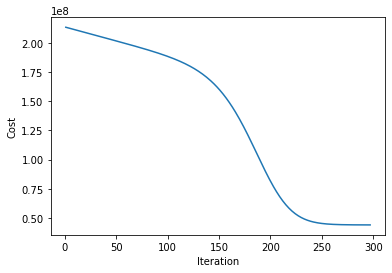

[[1.05130377e+00 2.65758104e+00 7.96953593e-01 7.81002823e-01
  7.77645240e-01 1.32696826e+00 1.56880238e+04 6.27874023e-01
  1.78609383e+00 1.20036166e+00 9.81994986e-01 1.35946950e+00
  1.34284664e+00 3.45842504e-01 1.84817127e+01 4.25514706e-01
  1.02864539e+00 5.55625632e-01 2.00801565e-01]]
102.13796340261321
-186.8800301746867
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


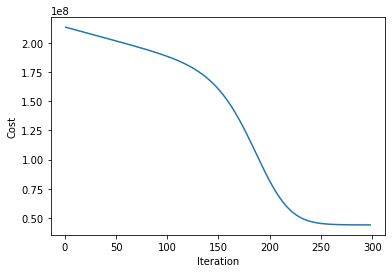

[[1.05131802e+00 2.65773009e+00 7.96957850e-01 7.81011177e-01
  7.77665120e-01 1.32699036e+00 1.56960285e+04 6.27889318e-01
  1.78614773e+00 1.20039590e+00 9.82000785e-01 1.35950840e+00
  1.34287989e+00 3.45851146e-01 1.84847374e+01 4.25519021e-01
  1.02865290e+00 5.55627421e-01 2.00803956e-01]]
102.14323549464012
-178.3768304121897
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


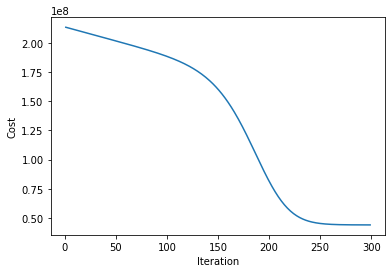

[[1.05133162e+00 2.65787236e+00 7.96961912e-01 7.81019152e-01
  7.77684096e-01 1.32701145e+00 1.57036727e+04 6.27903916e-01
  1.78619917e+00 1.20042857e+00 9.82006321e-01 1.35954553e+00
  1.34291163e+00 3.45859395e-01 1.84876250e+01 4.25523140e-01
  1.02866007e+00 5.55629129e-01 2.00806239e-01]]
102.14826757582705
-170.25626410156354
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


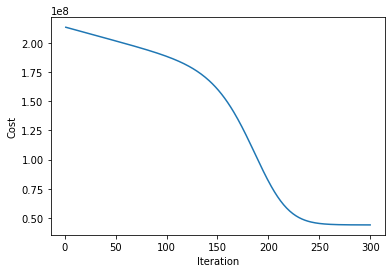

[[1.05134460e+00 2.65800816e+00 7.96965790e-01 7.81026763e-01
  7.77702208e-01 1.32703158e+00 1.57109723e+04 6.27917850e-01
  1.78624828e+00 1.20045976e+00 9.82011604e-01 1.35958097e+00
  1.34294193e+00 3.45867269e-01 1.84903814e+01 4.25527071e-01
  1.02866690e+00 5.55630759e-01 2.00808418e-01]]
102.15307045759394
-162.5014931547956
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


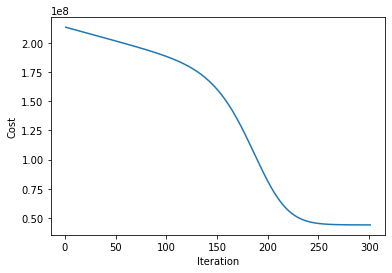

[[1.05135699e+00 2.65813778e+00 7.96969491e-01 7.81034027e-01
  7.77719495e-01 1.32705080e+00 1.57179424e+04 6.27931149e-01
  1.78629515e+00 1.20048953e+00 9.82016647e-01 1.35961480e+00
  1.34297084e+00 3.45874784e-01 1.84930126e+01 4.25530823e-01
  1.02867343e+00 5.55632315e-01 2.00810497e-01]]
102.15765447459545
-155.0963866166894
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


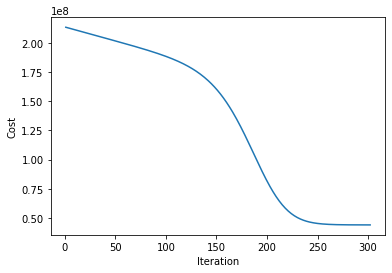

[[1.05136881e+00 2.65826150e+00 7.96973023e-01 7.81040960e-01
  7.77735994e-01 1.32706914e+00 1.57245978e+04 6.27943842e-01
  1.78633988e+00 1.20051794e+00 9.82021459e-01 1.35964709e+00
  1.34299844e+00 3.45881957e-01 1.84955242e+01 4.25534404e-01
  1.02867966e+00 5.55633799e-01 2.00812482e-01]]
102.16202950483293
-148.0254940045595
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


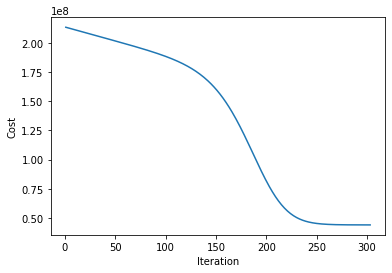

[[1.05138010e+00 2.65837957e+00 7.96976394e-01 7.81047578e-01
  7.77751741e-01 1.32708664e+00 1.57309523e+04 6.27955956e-01
  1.78638257e+00 1.20054505e+00 9.82026053e-01 1.35967791e+00
  1.34302478e+00 3.45888803e-01 1.84979216e+01 4.25537822e-01
  1.02868561e+00 5.55635216e-01 2.00814376e-01]]
102.16620498899995
-141.2740193736316
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


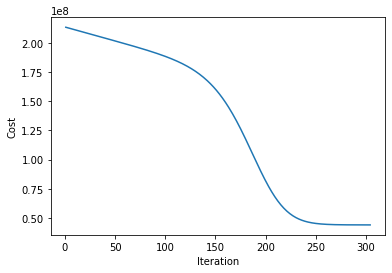

[[1.05139087e+00 2.65849227e+00 7.96979611e-01 7.81053893e-01
  7.77766769e-01 1.32710335e+00 1.57370192e+04 6.27967518e-01
  1.78642332e+00 1.20057093e+00 9.82030436e-01 1.35970732e+00
  1.34304991e+00 3.45895336e-01 1.85002099e+01 4.25541083e-01
  1.02869128e+00 5.55636569e-01 2.00816184e-01]]
102.17018994908287
-134.8277961160844
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


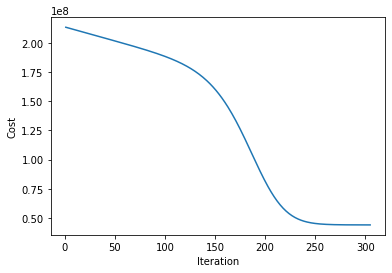

[[1.05140115e+00 2.65859983e+00 7.96982682e-01 7.81059920e-01
  7.77781112e-01 1.32711929e+00 1.57428115e+04 6.27978552e-01
  1.78646221e+00 1.20059563e+00 9.82034620e-01 1.35973538e+00
  1.34307390e+00 3.45901571e-01 1.85023940e+01 4.25544196e-01
  1.02869670e+00 5.55637859e-01 2.00817909e-01]]
102.17399300623848
-128.67326249835077
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


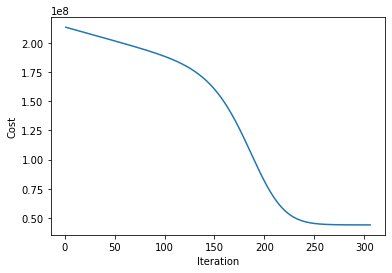

[[1.05141096e+00 2.65870248e+00 7.96985612e-01 7.81065672e-01
  7.77794801e-01 1.32713450e+00 1.57483413e+04 6.27989082e-01
  1.78649932e+00 1.20061920e+00 9.82038612e-01 1.35976217e+00
  1.34309680e+00 3.45907522e-01 1.85044787e+01 4.25547167e-01
  1.02870187e+00 5.55639091e-01 2.00819556e-01]]
102.17762239797047
-122.79743793785667
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


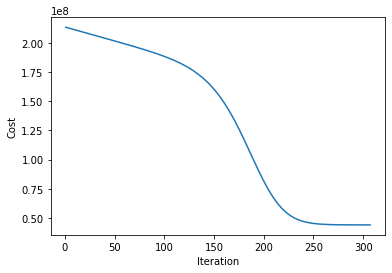

[[1.05142032e+00 2.65880044e+00 7.96988408e-01 7.81071161e-01
  7.77807864e-01 1.32714902e+00 1.57536204e+04 6.27999132e-01
  1.78653474e+00 1.20064169e+00 9.82042423e-01 1.35978774e+00
  1.34311865e+00 3.45913201e-01 1.85064683e+01 4.25550002e-01
  1.02870680e+00 5.55640267e-01 2.00821127e-01]]
102.18108599462651
-117.1879000175499
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


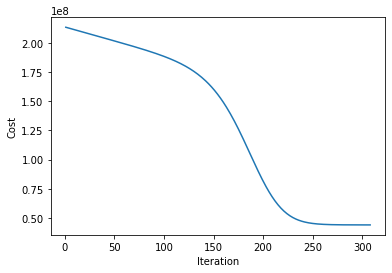

[[1.05142926e+00 2.65889393e+00 7.96991077e-01 7.81076399e-01
  7.77820330e-01 1.32716288e+00 1.57586599e+04 6.28008722e-01
  1.78656854e+00 1.20066316e+00 9.82046059e-01 1.35981213e+00
  1.34313950e+00 3.45918620e-01 1.85083672e+01 4.25552708e-01
  1.02871151e+00 5.55641389e-01 2.00822627e-01]]
102.1843913152377
-111.83276223397138
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


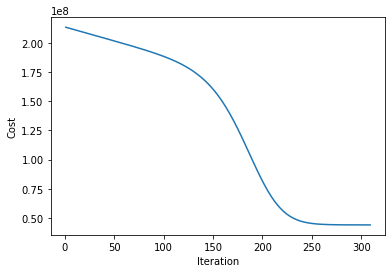

[[1.05143778e+00 2.65898315e+00 7.96993624e-01 7.81081398e-01
  7.77832227e-01 1.32717610e+00 1.57634706e+04 6.28017875e-01
  1.78660079e+00 1.20068365e+00 9.82049528e-01 1.35983541e+00
  1.34315940e+00 3.45923792e-01 1.85101795e+01 4.25555290e-01
  1.02871600e+00 5.55642459e-01 2.00824058e-01]]
102.18754554272178
-106.72065247263792
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


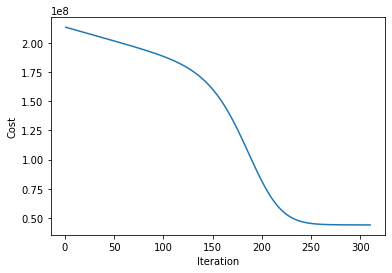

[[1.05144592e+00 2.65906829e+00 7.96996054e-01 7.81086169e-01
  7.77843580e-01 1.32718872e+00 1.57680627e+04 6.28026609e-01
  1.78663157e+00 1.20070320e+00 9.82052840e-01 1.35985763e+00
  1.34317839e+00 3.45928728e-01 1.85119090e+01 4.25557754e-01
  1.02872028e+00 5.55643481e-01 2.00825423e-01]]
102.19055553847141
-101.84069220217455
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


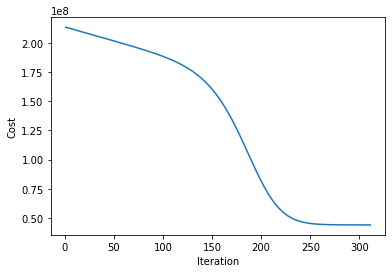

[[1.05145368e+00 2.65914954e+00 7.96998373e-01 7.81090721e-01
  7.77854414e-01 1.32720076e+00 1.57724460e+04 6.28034943e-01
  1.78666095e+00 1.20072185e+00 9.82055999e-01 1.35987883e+00
  1.34319651e+00 3.45933437e-01 1.85135597e+01 4.25560105e-01
  1.02872437e+00 5.55644455e-01 2.00826726e-01]]
102.19342785634858
-97.18247637730926
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


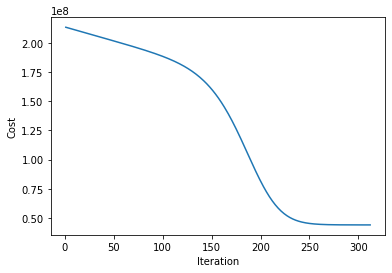

[[1.05146109e+00 2.65922708e+00 7.97000586e-01 7.81095065e-01
  7.77864752e-01 1.32721225e+00 1.57766299e+04 6.28042896e-01
  1.78668898e+00 1.20073965e+00 9.82059015e-01 1.35989906e+00
  1.34321380e+00 3.45937932e-01 1.85151349e+01 4.25562348e-01
  1.02872828e+00 5.55645386e-01 2.00827970e-01]]
102.19616875610545
-92.73605403933034
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


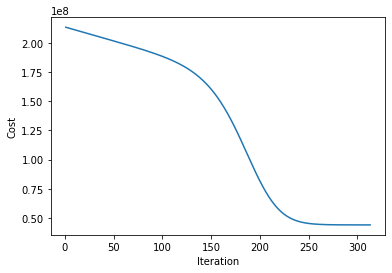

[[1.05146816e+00 2.65930107e+00 7.97002698e-01 7.81099210e-01
  7.77874617e-01 1.32722322e+00 1.57806235e+04 6.28050486e-01
  1.78671573e+00 1.20075664e+00 9.82061892e-01 1.35991837e+00
  1.34323030e+00 3.45942220e-01 1.85166382e+01 4.25564489e-01
  1.02873200e+00 5.55646273e-01 2.00829157e-01]]
102.19878421625224
-88.49190960116015
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


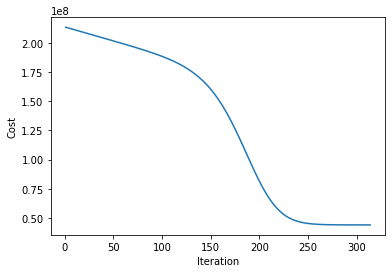

[[1.05147491e+00 2.65937167e+00 7.97004713e-01 7.81103165e-01
  7.77884031e-01 1.32723368e+00 1.57844351e+04 6.28057728e-01
  1.78674125e+00 1.20077285e+00 9.82064637e-01 1.35993679e+00
  1.34324605e+00 3.45946313e-01 1.85180728e+01 4.25566532e-01
  1.02873556e+00 5.55647120e-01 2.00830289e-01]]
102.20127994639171
-84.44094480348457
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


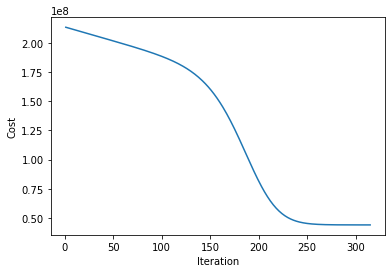

[[1.05148135e+00 2.65943904e+00 7.97006635e-01 7.81106940e-01
  7.77893014e-01 1.32724366e+00 1.57880731e+04 6.28064638e-01
  1.78676561e+00 1.20078832e+00 9.82067257e-01 1.35995437e+00
  1.34326107e+00 3.45950218e-01 1.85194418e+01 4.25568482e-01
  1.02873895e+00 5.55647929e-01 2.00831369e-01]]
102.20366139903976
-80.57446132731957
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


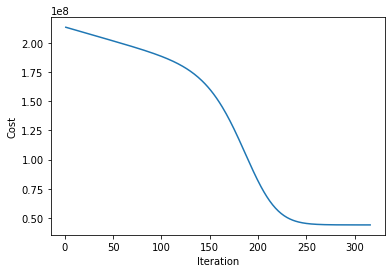

[[1.05148749e+00 2.65950333e+00 7.97008470e-01 7.81110541e-01
  7.77901586e-01 1.32725319e+00 1.57915453e+04 6.28071232e-01
  1.78678885e+00 1.20080308e+00 9.82069757e-01 1.35997114e+00
  1.34327541e+00 3.45953944e-01 1.85207482e+01 4.25570342e-01
  1.02874218e+00 5.55648700e-01 2.00832400e-01]]
102.2059337809511
-76.88414404779282
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


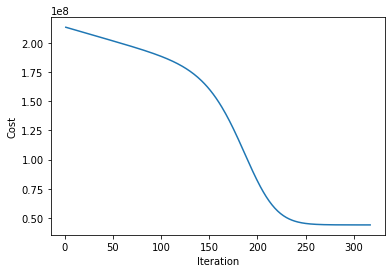

[[1.05149335e+00 2.65956468e+00 7.97010221e-01 7.81113978e-01
  7.77909765e-01 1.32726228e+00 1.57948592e+04 6.28077525e-01
  1.78681102e+00 1.20081716e+00 9.82072142e-01 1.35998715e+00
  1.34328909e+00 3.45957500e-01 1.85219948e+01 4.25572117e-01
  1.02874527e+00 5.55649436e-01 2.00833384e-01]]
102.20810206396841
-73.36204491328998
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


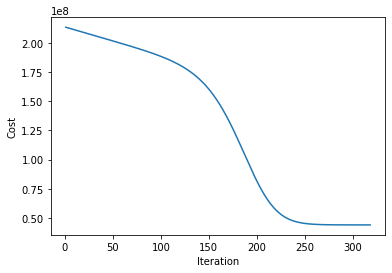

[[1.05149894e+00 2.65962322e+00 7.97011891e-01 7.81117257e-01
  7.77917569e-01 1.32727096e+00 1.57980219e+04 6.28083528e-01
  1.78683218e+00 1.20083060e+00 9.82074418e-01 1.36000242e+00
  1.34330214e+00 3.45960893e-01 1.85231844e+01 4.25573811e-01
  1.02874822e+00 5.55650138e-01 2.00834323e-01]]
102.21017099541311
-70.0005674337211
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


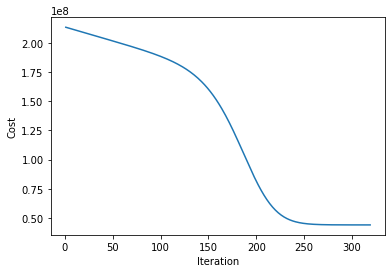

[[1.05150428e+00 2.65967907e+00 7.97013485e-01 7.81120386e-01
  7.77925016e-01 1.32727923e+00 1.58010402e+04 6.28089257e-01
  1.78685237e+00 1.20084343e+00 9.82076590e-01 1.36001700e+00
  1.34331460e+00 3.45964130e-01 1.85243195e+01 4.25575427e-01
  1.02875103e+00 5.55650808e-01 2.00835218e-01]]
102.21214510803512
-66.79245176148069
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


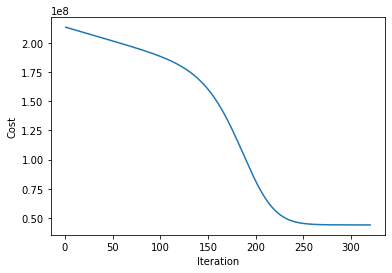

[[1.05150937e+00 2.65973237e+00 7.97015006e-01 7.81123371e-01
  7.77932121e-01 1.32728713e+00 1.58039208e+04 6.28094723e-01
  1.78687164e+00 1.20085566e+00 9.82078662e-01 1.36003090e+00
  1.34332648e+00 3.45967219e-01 1.85254027e+01 4.25576969e-01
  1.02875371e+00 5.55651447e-01 2.00836073e-01]]
102.21402872953867
-63.73076034814361
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


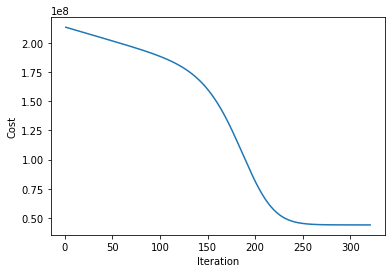

[[1.05151423e+00 2.65978322e+00 7.97016457e-01 7.81126219e-01
  7.77938901e-01 1.32729466e+00 1.58066697e+04 6.28099939e-01
  1.78689002e+00 1.20086734e+00 9.82080639e-01 1.36004417e+00
  1.34333782e+00 3.45970166e-01 1.85264363e+01 4.25578440e-01
  1.02875627e+00 5.55652057e-01 2.00836888e-01]]
102.21582599170083
-60.808864160193934
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


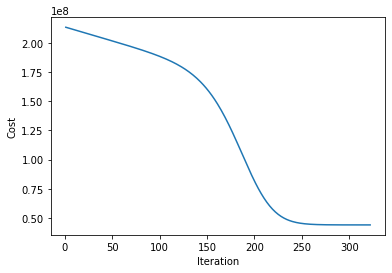

[[1.05151886e+00 2.65983174e+00 7.97017841e-01 7.81128937e-01
  7.77945370e-01 1.32730185e+00 1.58092931e+04 6.28104915e-01
  1.78690756e+00 1.20087848e+00 9.82082526e-01 1.36005683e+00
  1.34334864e+00 3.45972978e-01 1.85274225e+01 4.25579844e-01
  1.02875871e+00 5.55652639e-01 2.00837666e-01]]
102.21754083909846
-58.020429436736194
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


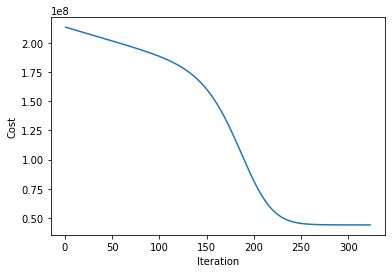

[[1.05152329e+00 2.65987804e+00 7.97019163e-01 7.81131531e-01
  7.77951542e-01 1.32730871e+00 1.58117966e+04 6.28109664e-01
  1.78692429e+00 1.20088910e+00 9.82084326e-01 1.36006891e+00
  1.34335896e+00 3.45975661e-01 1.85283636e+01 4.25581183e-01
  1.02876104e+00 5.55653194e-01 2.00838409e-01]]
102.2191770374595
-55.3594049723615
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


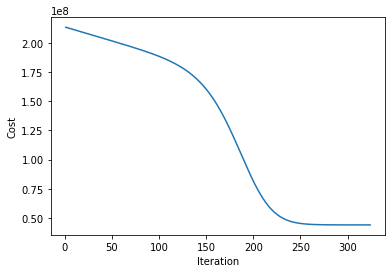

[[1.05152751e+00 2.65992221e+00 7.97020423e-01 7.81134005e-01
  7.77957431e-01 1.32731526e+00 1.58141856e+04 6.28114194e-01
  1.78694026e+00 1.20089925e+00 9.82086043e-01 1.36008043e+00
  1.34336881e+00 3.45978222e-01 1.85292615e+01 4.25582461e-01
  1.02876327e+00 5.55653724e-01 2.00839117e-01]]
102.22073818165326
-52.82000990834186
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


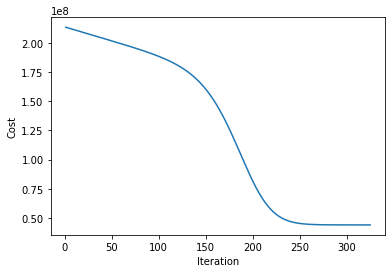

[[1.05153153e+00 2.65996436e+00 7.97021626e-01 7.81136366e-01
  7.77963050e-01 1.32732150e+00 1.58164653e+04 6.28118517e-01
  1.78695550e+00 1.20090892e+00 9.82087682e-01 1.36009143e+00
  1.34337821e+00 3.45980664e-01 1.85301183e+01 4.25583680e-01
  1.02876539e+00 5.55654230e-01 2.00839793e-01]]
102.22222770333444
-50.39672201544802
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


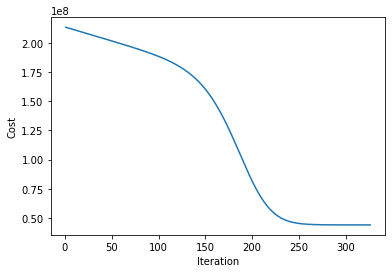

[[1.05153538e+00 2.66000458e+00 7.97022773e-01 7.81138618e-01
  7.77968411e-01 1.32732746e+00 1.58186408e+04 6.28122641e-01
  1.78697003e+00 1.20091815e+00 9.82089246e-01 1.36010192e+00
  1.34338718e+00 3.45982995e-01 1.85309358e+01 4.25584844e-01
  1.02876741e+00 5.55654712e-01 2.00840438e-01]]
102.22364887825495
-48.08426645193706
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


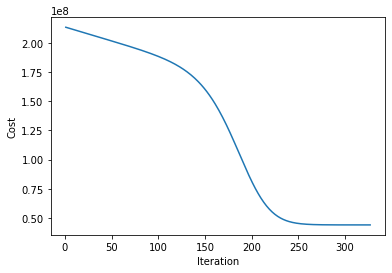

[[1.05153904e+00 2.66004295e+00 7.97023868e-01 7.81140767e-01
  7.77973526e-01 1.32733315e+00 1.58207167e+04 6.28126577e-01
  1.78698390e+00 1.20092696e+00 9.82090737e-01 1.36011193e+00
  1.34339573e+00 3.45985219e-01 1.85317158e+01 4.25585954e-01
  1.02876934e+00 5.55655172e-01 2.00841053e-01]]
102.2250048332569
-45.87760498045929
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


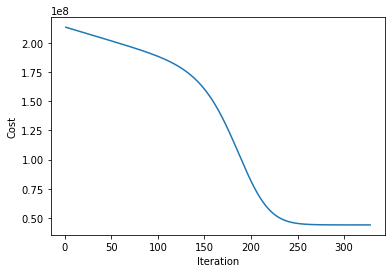

[[1.05154254e+00 2.66007956e+00 7.97024912e-01 7.81142818e-01
  7.77978407e-01 1.32733857e+00 1.58226976e+04 6.28130331e-01
  1.78699714e+00 1.20093537e+00 9.82092161e-01 1.36012148e+00
  1.34340390e+00 3.45987340e-01 1.85324601e+01 4.25587013e-01
  1.02877118e+00 5.55655611e-01 2.00841640e-01]]
102.22629855296015
-43.77192562792976
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


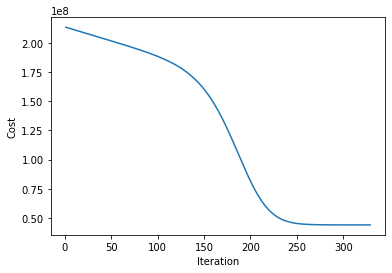

[[1.05154588e+00 2.66011449e+00 7.97025909e-01 7.81144774e-01
  7.77983063e-01 1.32734375e+00 1.58245878e+04 6.28133913e-01
  1.78700976e+00 1.20094338e+00 9.82093518e-01 1.36013059e+00
  1.34341169e+00 3.45989365e-01 1.85331702e+01 4.25588023e-01
  1.02877294e+00 5.55656030e-01 2.00842200e-01]]
102.22753288615664
-41.76263277251683
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


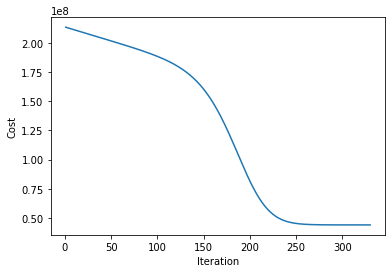

[[1.05154906e+00 2.66014781e+00 7.97026860e-01 7.81146641e-01
  7.77987506e-01 1.32734868e+00 1.58263914e+04 6.28137331e-01
  1.78702181e+00 1.20095103e+00 9.82094814e-01 1.36013929e+00
  1.34341912e+00 3.45991296e-01 1.85338478e+01 4.25588987e-01
  1.02877462e+00 5.55656430e-01 2.00842734e-01]]
102.22871055192415
-39.84533764260219
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


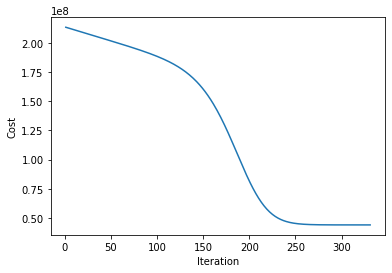

[[1.05155210e+00 2.66017961e+00 7.97027767e-01 7.81148422e-01
  7.77991745e-01 1.32735340e+00 1.58281124e+04 6.28140592e-01
  1.78703330e+00 1.20095833e+00 9.82096050e-01 1.36014758e+00
  1.34342621e+00 3.45993139e-01 1.85344942e+01 4.25589907e-01
  1.02877622e+00 5.55656811e-01 2.00843244e-01]]
102.22983414547083
-38.01584921243851
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


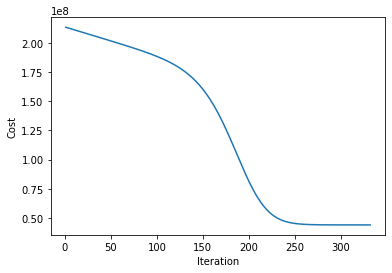

[[1.05155500e+00 2.66020995e+00 7.97028633e-01 7.81150121e-01
  7.77995789e-01 1.32735789e+00 1.58297546e+04 6.28143703e-01
  1.78704427e+00 1.20096530e+00 9.82097229e-01 1.36015550e+00
  1.34343297e+00 3.45994897e-01 1.85351110e+01 4.25590785e-01
  1.02877775e+00 5.55657175e-01 2.00843730e-01]]
102.23090614372195
-36.27016547991865
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


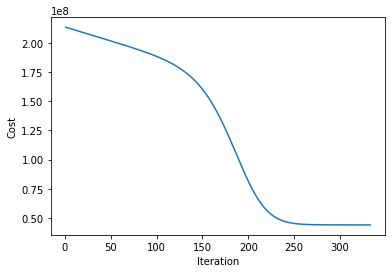

[[1.05155776e+00 2.66023889e+00 7.97029458e-01 7.81151742e-01
  7.77999647e-01 1.32736218e+00 1.58313215e+04 6.28146671e-01
  1.78705473e+00 1.20097194e+00 9.82098355e-01 1.36016305e+00
  1.34343942e+00 3.45996574e-01 1.85356995e+01 4.25591622e-01
  1.02877920e+00 5.55657522e-01 2.00844194e-01]]
102.23192891065975
-34.604465112188294
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


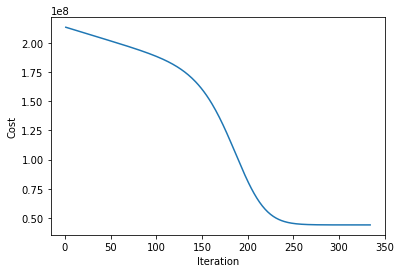

[[1.05156040e+00 2.66026650e+00 7.97030246e-01 7.81153289e-01
  7.78003329e-01 1.32736627e+00 1.58328166e+04 6.28149503e-01
  1.78706471e+00 1.20097828e+00 9.82099428e-01 1.36017025e+00
  1.34344558e+00 3.45998174e-01 1.85362610e+01 4.25592421e-01
  1.02878059e+00 5.55657854e-01 2.00844637e-01]]
102.23290470242681
-33.01509944494664
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


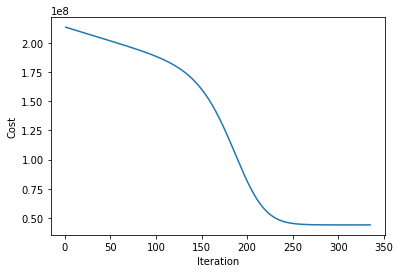

[[1.05156292e+00 2.66029285e+00 7.97030998e-01 7.81154764e-01
  7.78006841e-01 1.32737017e+00 1.58342432e+04 6.28152205e-01
  1.78707423e+00 1.20098433e+00 9.82100452e-01 1.36017713e+00
  1.34345146e+00 3.45999701e-01 1.85367967e+01 4.25593183e-01
  1.02878192e+00 5.55658169e-01 2.00845060e-01]]
102.23383567220307
-31.49858482212195
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


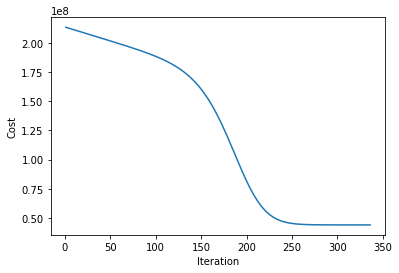

[[1.05156532e+00 2.66031799e+00 7.97031715e-01 7.81156172e-01
  7.78010192e-01 1.32737390e+00 1.58356043e+04 6.28154783e-01
  1.78708332e+00 1.20099010e+00 9.82101429e-01 1.36018368e+00
  1.34345706e+00 3.46001158e-01 1.85373078e+01 4.25593910e-01
  1.02878318e+00 5.55658471e-01 2.00845463e-01]]
102.234723874866
-30.051595262491873
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


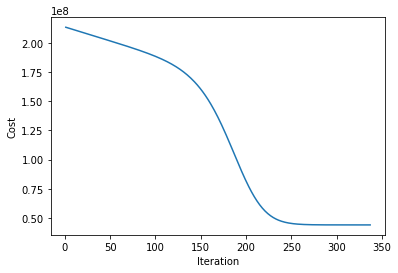

[[1.05156761e+00 2.66034197e+00 7.97032399e-01 7.81157515e-01
  7.78013389e-01 1.32737745e+00 1.58369030e+04 6.28157242e-01
  1.78709199e+00 1.20099560e+00 9.82102362e-01 1.36018994e+00
  1.34346241e+00 3.46002548e-01 1.85377954e+01 4.25594604e-01
  1.02878439e+00 5.55658759e-01 2.00845847e-01]]
102.23557127144343
-28.670955440655618
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


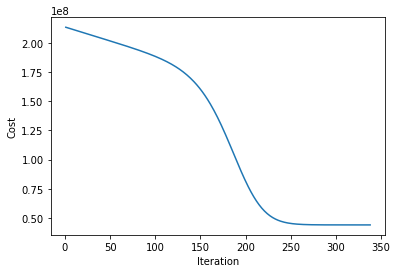

[[1.05156979e+00 2.66036485e+00 7.97033052e-01 7.81158796e-01
  7.78016439e-01 1.32738084e+00 1.58381422e+04 6.28159589e-01
  1.78710026e+00 1.20100086e+00 9.82103251e-01 1.36019591e+00
  1.34346751e+00 3.46003874e-01 1.85382607e+01 4.25595266e-01
  1.02878554e+00 5.55659033e-01 2.00846214e-01]]
102.2363797333677
-27.35363396977529
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


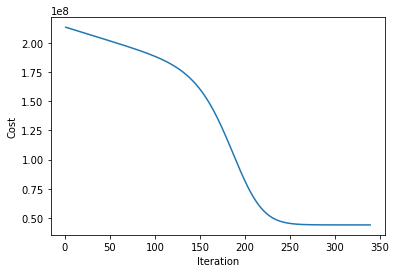

[[1.05157188e+00 2.66038668e+00 7.97033675e-01 7.81160019e-01
  7.78019348e-01 1.32738407e+00 1.58393245e+04 6.28161827e-01
  1.78710815e+00 1.20100587e+00 9.82104100e-01 1.36020160e+00
  1.34347238e+00 3.46005139e-01 1.85387045e+01 4.25595897e-01
  1.02878664e+00 5.55659295e-01 2.00846564e-01]]
102.23715104654
-26.09673697425285
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


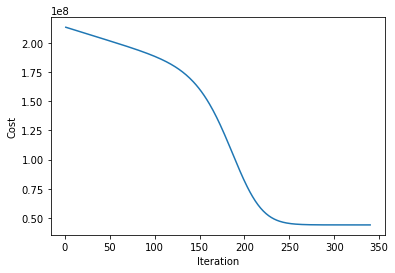

[[1.05157387e+00 2.66040751e+00 7.97034269e-01 7.81161185e-01
  7.78022125e-01 1.32738716e+00 1.58404525e+04 6.28163963e-01
  1.78711567e+00 1.20101065e+00 9.82104909e-01 1.36020704e+00
  1.34347702e+00 3.46006346e-01 1.85391280e+01 4.25596499e-01
  1.02878769e+00 5.55659544e-01 2.00846898e-01]]
102.2378869152129
-24.89750194055421
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


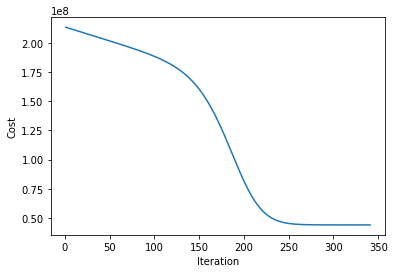

[[1.05157577e+00 2.66042738e+00 7.97034836e-01 7.81162298e-01
  7.78024773e-01 1.32739010e+00 1.58415288e+04 6.28166001e-01
  1.78712285e+00 1.20101521e+00 9.82105682e-01 1.36021222e+00
  1.34348145e+00 3.46007497e-01 1.85395321e+01 4.25597074e-01
  1.02878869e+00 5.55659783e-01 2.00847216e-01]]
102.23858896569898
-23.753291835032584
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


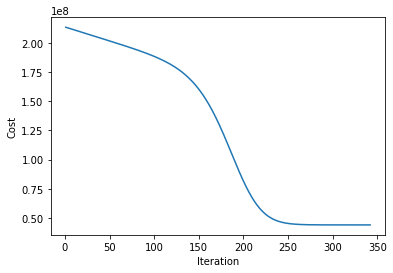

[[1.05157758e+00 2.66044633e+00 7.97035377e-01 7.81163360e-01
  7.78027300e-01 1.32739291e+00 1.58425557e+04 6.28167945e-01
  1.78712971e+00 1.20101956e+00 9.82106418e-01 1.36021717e+00
  1.34348568e+00 3.46008595e-01 1.85399175e+01 4.25597622e-01
  1.02878964e+00 5.55660010e-01 2.00847520e-01]]
102.23925874991326
-22.661589477884416
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


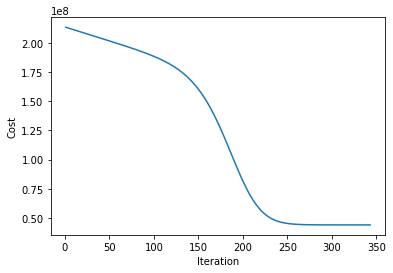

[[1.05157930e+00 2.66046442e+00 7.97035893e-01 7.81164373e-01
  7.78029711e-01 1.32739559e+00 1.58435355e+04 6.28169799e-01
  1.78713624e+00 1.20102371e+00 9.82107121e-01 1.36022188e+00
  1.34348971e+00 3.46009643e-01 1.85402853e+01 4.25598146e-01
  1.02879055e+00 5.55660227e-01 2.00847810e-01]]
102.23989774875655
-21.61999216267652
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


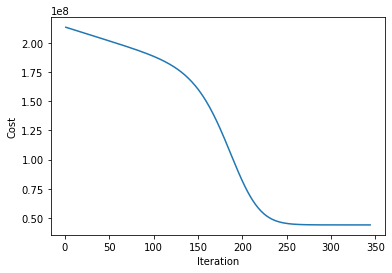

[[1.05158095e+00 2.66048167e+00 7.97036385e-01 7.81165339e-01
  7.78032011e-01 1.32739815e+00 1.58444703e+04 6.28171568e-01
  1.78714248e+00 1.20102767e+00 9.82107792e-01 1.36022638e+00
  1.34349356e+00 3.46010643e-01 1.85406362e+01 4.25598645e-01
  1.02879142e+00 5.55660434e-01 2.00848087e-01]]
102.24050737534674
-20.62620651140205
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


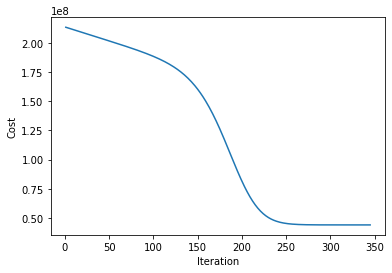

[[1.05158252e+00 2.66049813e+00 7.97036854e-01 7.81166261e-01
  7.78034205e-01 1.32740059e+00 1.58453621e+04 6.28173256e-01
  1.78714843e+00 1.20103145e+00 9.82108432e-01 1.36023068e+00
  1.34349723e+00 3.46011597e-01 1.85409709e+01 4.25599121e-01
  1.02879225e+00 5.55660631e-01 2.00848351e-01]]
102.24108897810476
-19.678043555303766
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


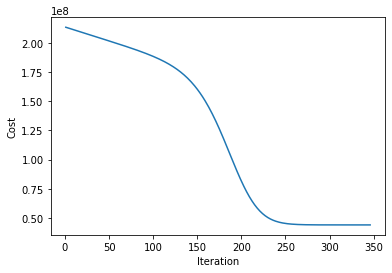

[[1.05158402e+00 2.66051384e+00 7.97037302e-01 7.81167140e-01
  7.78036298e-01 1.32740291e+00 1.58462130e+04 6.28174867e-01
  1.78715410e+00 1.20103506e+00 9.82109042e-01 1.36023477e+00
  1.34350073e+00 3.46012507e-01 1.85412903e+01 4.25599575e-01
  1.02879304e+00 5.55660820e-01 2.00848602e-01]]
102.24164384370141
-18.773414032001718
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


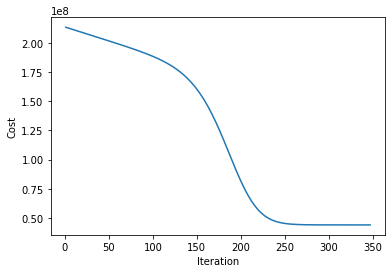

[[1.05158546e+00 2.66052882e+00 7.97037730e-01 7.81167979e-01
  7.78038296e-01 1.32740513e+00 1.58470249e+04 6.28176403e-01
  1.78715952e+00 1.20103850e+00 9.82109625e-01 1.36023868e+00
  1.34350407e+00 3.46013375e-01 1.85415950e+01 4.25600008e-01
  1.02879379e+00 5.55660999e-01 2.00848843e-01]]
102.2421731998715
-17.910323889891817
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


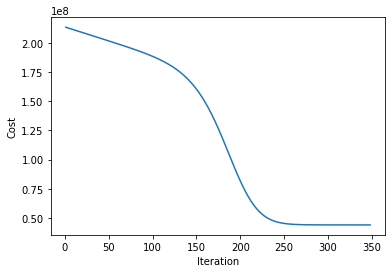

[[1.05158682e+00 2.66054311e+00 7.97038138e-01 7.81168780e-01
  7.78040201e-01 1.32740725e+00 1.58477994e+04 6.28177869e-01
  1.78716468e+00 1.20104178e+00 9.82110180e-01 1.36024241e+00
  1.34350725e+00 3.46014204e-01 1.85418857e+01 4.25600422e-01
  1.02879451e+00 5.55661171e-01 2.00849072e-01]]
102.24267821810082
-17.086869991140887
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


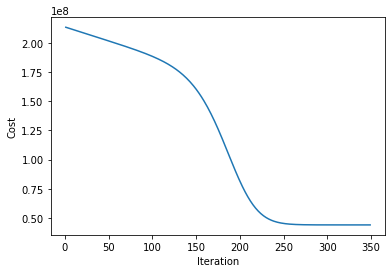

[[1.05158812e+00 2.66055675e+00 7.97038527e-01 7.81169543e-01
  7.78042019e-01 1.32740927e+00 1.58485384e+04 6.28179267e-01
  1.78716961e+00 1.20104491e+00 9.82110710e-01 1.36024597e+00
  1.34351029e+00 3.46014994e-01 1.85421630e+01 4.25600816e-01
  1.02879520e+00 5.55661334e-01 2.00849290e-01]]
102.24316001619181
-16.301236004773322
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


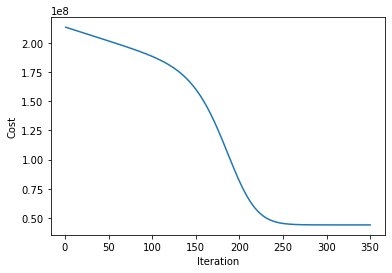

[[1.05158937e+00 2.66056976e+00 7.97038898e-01 7.81170272e-01
  7.78043753e-01 1.32741120e+00 1.58492434e+04 6.28180601e-01
  1.78717432e+00 1.20104789e+00 9.82111216e-01 1.36024936e+00
  1.34351319e+00 3.46015748e-01 1.85424276e+01 4.25601193e-01
  1.02879585e+00 5.55661490e-01 2.00849499e-01]]
102.24361966071325
-15.551688481919005
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


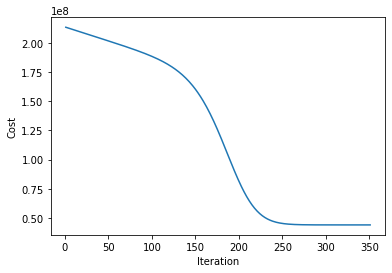

[[1.05159055e+00 2.66058217e+00 7.97039252e-01 7.81170967e-01
  7.78045407e-01 1.32741303e+00 1.58499160e+04 6.28181874e-01
  1.78717880e+00 1.20105074e+00 9.82111698e-01 1.36025260e+00
  1.34351596e+00 3.46016467e-01 1.85426800e+01 4.25601552e-01
  1.02879648e+00 5.55661639e-01 2.00849698e-01]]
102.24405816933903
-14.83657310535679
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


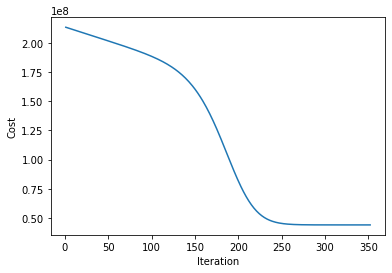

[[1.05159168e+00 2.66059401e+00 7.97039590e-01 7.81171630e-01
  7.78046985e-01 1.32741479e+00 1.58505578e+04 6.28183088e-01
  1.78718308e+00 1.20105346e+00 9.82112159e-01 1.36025569e+00
  1.34351860e+00 3.46017153e-01 1.85429208e+01 4.25601894e-01
  1.02879707e+00 5.55661781e-01 2.00849888e-01]]
102.24447651308107
-14.154311105879303
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


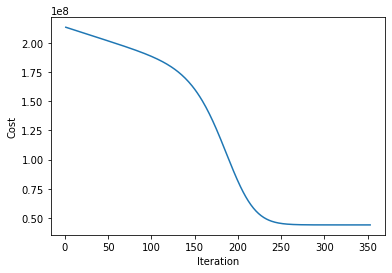

[[1.05159276e+00 2.66060531e+00 7.97039912e-01 7.81172263e-01
  7.78048491e-01 1.32741646e+00 1.58511700e+04 6.28184247e-01
  1.78718716e+00 1.20105605e+00 9.82112598e-01 1.36025864e+00
  1.34352112e+00 3.46017808e-01 1.85431505e+01 4.25602221e-01
  1.02879764e+00 5.55661916e-01 2.00850069e-01]]
102.24487561842099
-13.503395838423467
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


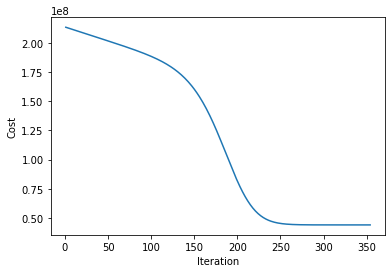

[[1.05159379e+00 2.66061608e+00 7.97040219e-01 7.81172866e-01
  7.78049928e-01 1.32741806e+00 1.58517541e+04 6.28185352e-01
  1.78719106e+00 1.20105853e+00 9.82113017e-01 1.36026145e+00
  1.34352352e+00 3.46018432e-01 1.85433697e+01 4.25602532e-01
  1.02879818e+00 5.55662046e-01 2.00850242e-01]]
102.24525636934516
-12.88238951098253
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


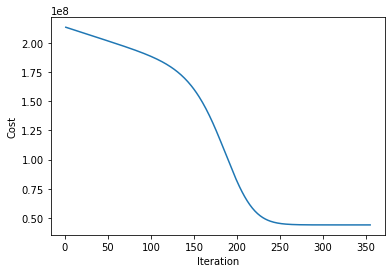

[[1.05159477e+00 2.66062636e+00 7.97040513e-01 7.81173442e-01
  7.78051298e-01 1.32741958e+00 1.58523114e+04 6.28186406e-01
  1.78719477e+00 1.20106089e+00 9.82113416e-01 1.36026413e+00
  1.34352582e+00 3.46019028e-01 1.85435788e+01 4.25602830e-01
  1.02879870e+00 5.55662169e-01 2.00850406e-01]]
102.2456196092873
-12.289920059765828
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


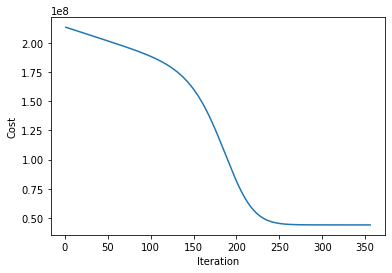

[[1.05159571e+00 2.66063617e+00 7.97040792e-01 7.81173991e-01
  7.78052606e-01 1.32742103e+00 1.58528431e+04 6.28187412e-01
  1.78719832e+00 1.20106314e+00 9.82113797e-01 1.36026669e+00
  1.34352800e+00 3.46019596e-01 1.85437783e+01 4.25603113e-01
  1.02879919e+00 5.55662287e-01 2.00850564e-01]]
102.245966142983
-11.724678164128916
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


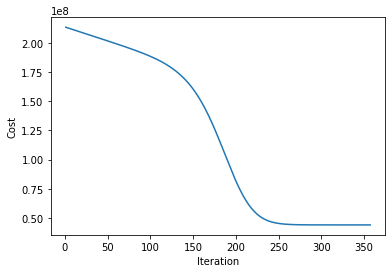

[[1.05159660e+00 2.66064553e+00 7.97041059e-01 7.81174515e-01
  7.78053853e-01 1.32742242e+00 1.58533503e+04 6.28188371e-01
  1.78720170e+00 1.20106529e+00 9.82114161e-01 1.36026913e+00
  1.34353009e+00 3.46020139e-01 1.85439686e+01 4.25603384e-01
  1.02879966e+00 5.55662399e-01 2.00850714e-01]]
102.24629673823976
-11.185414395424745
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


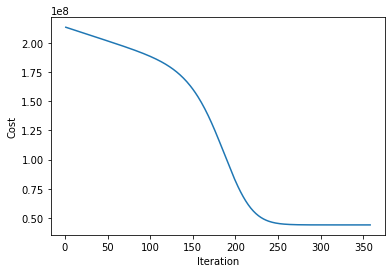

[[1.05159746e+00 2.66065446e+00 7.97041314e-01 7.81175015e-01
  7.78055043e-01 1.32742374e+00 1.58538342e+04 6.28189287e-01
  1.78720493e+00 1.20106733e+00 9.82114508e-01 1.36027146e+00
  1.34353208e+00 3.46020656e-01 1.85441501e+01 4.25603642e-01
  1.02880011e+00 5.55662506e-01 2.00850857e-01]]
102.24661212762682
-10.670936493688282
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


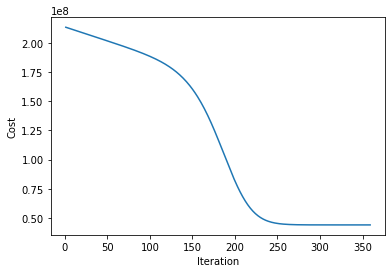

[[1.05159827e+00 2.66066297e+00 7.97041557e-01 7.81175492e-01
  7.78056178e-01 1.32742500e+00 1.58542959e+04 6.28190160e-01
  1.78720801e+00 1.20106929e+00 9.82114839e-01 1.36027368e+00
  1.34353398e+00 3.46021149e-01 1.85443233e+01 4.25603889e-01
  1.02880054e+00 5.55662608e-01 2.00850993e-01]]
102.24691301008781
-10.180106766733662
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


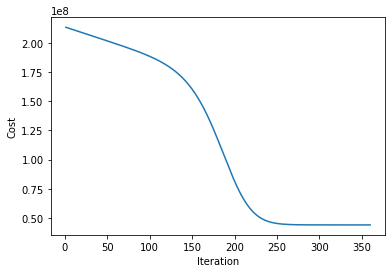

[[1.05159905e+00 2.66067110e+00 7.97041789e-01 7.81175947e-01
  7.78057261e-01 1.32742621e+00 1.58547363e+04 6.28190993e-01
  1.78721094e+00 1.20107115e+00 9.82115155e-01 1.36027580e+00
  1.34353579e+00 3.46021620e-01 1.85444886e+01 4.25604124e-01
  1.02880095e+00 5.55662705e-01 2.00851123e-01]]
102.24720005248024
-9.711839606245286
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


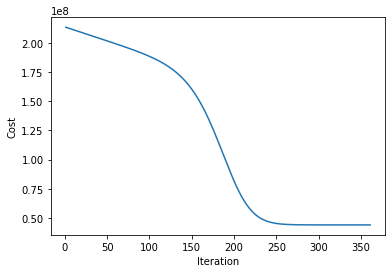

[[1.05159979e+00 2.66067885e+00 7.97042010e-01 7.81176381e-01
  7.78058294e-01 1.32742736e+00 1.58551565e+04 6.28191788e-01
  1.78721374e+00 1.20107293e+00 9.82115456e-01 1.36027782e+00
  1.34353752e+00 3.46022069e-01 1.85446462e+01 4.25604348e-01
  1.02880134e+00 5.55662798e-01 2.00851248e-01]]
102.24747389104472
-9.265099115665192
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


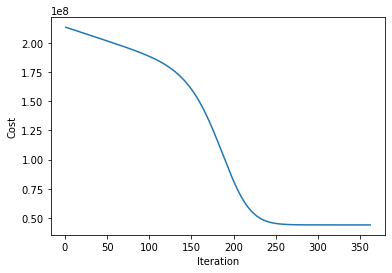

[[1.05160049e+00 2.66068624e+00 7.97042221e-01 7.81176795e-01
  7.78059280e-01 1.32742845e+00 1.58555574e+04 6.28192546e-01
  1.78721642e+00 1.20107463e+00 9.82115744e-01 1.36027975e+00
  1.34353916e+00 3.46022498e-01 1.85447966e+01 4.25604562e-01
  1.02880171e+00 5.55662887e-01 2.00851366e-01]]
102.24773513280732
-8.838896845055807
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


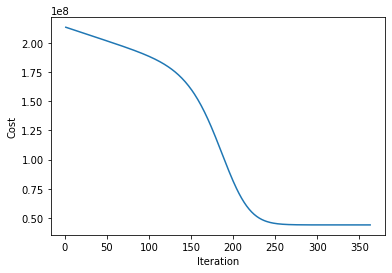

[[1.05160117e+00 2.66069330e+00 7.97042422e-01 7.81177190e-01
  7.78060220e-01 1.32742950e+00 1.58559398e+04 6.28193270e-01
  1.78721897e+00 1.20107625e+00 9.82116018e-01 1.36028159e+00
  1.34354074e+00 3.46022906e-01 1.85449401e+01 4.25604766e-01
  1.02880207e+00 5.55662971e-01 2.00851479e-01]]
102.24798435691795
-8.432289628160344
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


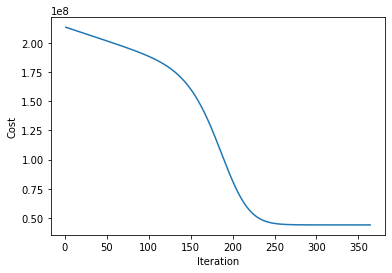

[[1.05160181e+00 2.66070003e+00 7.97042614e-01 7.81177567e-01
  7.78061117e-01 1.32743049e+00 1.58563047e+04 6.28193960e-01
  1.78722140e+00 1.20107779e+00 9.82116279e-01 1.36028334e+00
  1.34354224e+00 3.46023296e-01 1.85450770e+01 4.25604960e-01
  1.02880241e+00 5.55663052e-01 2.00851587e-01]]
102.24822211592775
-8.044377517097772
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


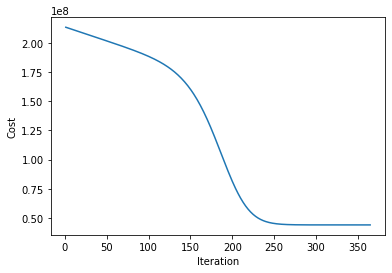

[[1.05160242e+00 2.66070645e+00 7.97042797e-01 7.81177926e-01
  7.78061973e-01 1.32743145e+00 1.58566527e+04 6.28194618e-01
  1.78722372e+00 1.20107927e+00 9.82116529e-01 1.36028502e+00
  1.34354367e+00 3.46023668e-01 1.85452076e+01 4.25605146e-01
  1.02880273e+00 5.55663129e-01 2.00851690e-01]]
102.24844893700812
-7.674301810476359
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


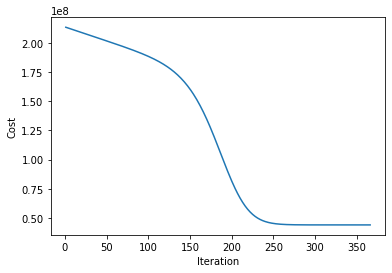

[[1.05160301e+00 2.66071257e+00 7.97042972e-01 7.81178269e-01
  7.78062789e-01 1.32743235e+00 1.58569848e+04 6.28195246e-01
  1.78722593e+00 1.20108067e+00 9.82116767e-01 1.36028662e+00
  1.34354503e+00 3.46024023e-01 1.85453321e+01 4.25605323e-01
  1.02880304e+00 5.55663203e-01 2.00851788e-01]]
102.2486653231142
-7.321243170680379
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


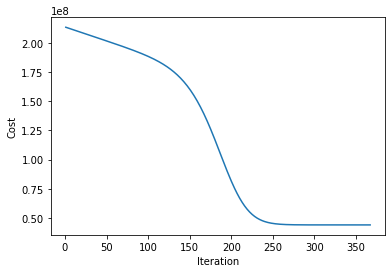

[[1.05160356e+00 2.66071841e+00 7.97043138e-01 7.81178597e-01
  7.78063568e-01 1.32743322e+00 1.58573016e+04 6.28195845e-01
  1.78722804e+00 1.20108202e+00 9.82116994e-01 1.36028814e+00
  1.34354634e+00 3.46024362e-01 1.85454510e+01 4.25605492e-01
  1.02880333e+00 5.55663273e-01 2.00851882e-01]]
102.24887175409513
-6.9844198264047215
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


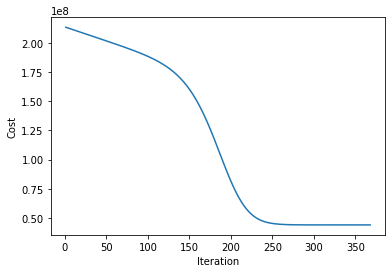

[[1.05160410e+00 2.66072399e+00 7.97043297e-01 7.81178909e-01
  7.78064311e-01 1.32743404e+00 1.58576038e+04 6.28196417e-01
  1.78723006e+00 1.20108329e+00 9.82117211e-01 1.36028960e+00
  1.34354758e+00 3.46024685e-01 1.85455643e+01 4.25605653e-01
  1.02880361e+00 5.55663340e-01 2.00851971e-01]]
102.24906868775372
-6.663085856627408
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


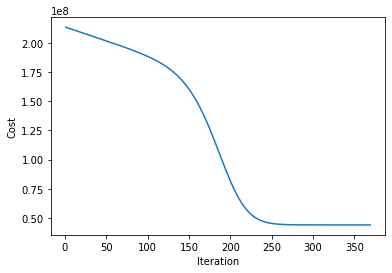

[[1.05160460e+00 2.66072931e+00 7.97043449e-01 7.81179206e-01
  7.78065020e-01 1.32743483e+00 1.58578922e+04 6.28196962e-01
  1.78723198e+00 1.20108452e+00 9.82117417e-01 1.36029098e+00
  1.34354877e+00 3.46024993e-01 1.85456725e+01 4.25605807e-01
  1.02880388e+00 5.55663403e-01 2.00852057e-01]]
102.2492565608575
-6.356529552421806
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


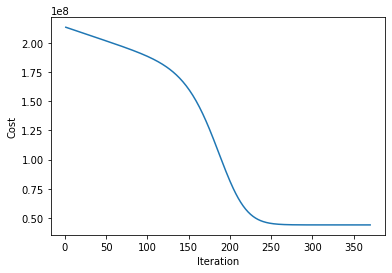

[[1.05160509e+00 2.66073438e+00 7.97043594e-01 7.81179491e-01
  7.78065696e-01 1.32743558e+00 1.58581673e+04 6.28197482e-01
  1.78723381e+00 1.20108568e+00 9.82117615e-01 1.36029231e+00
  1.34354990e+00 3.46025287e-01 1.85457757e+01 4.25605954e-01
  1.02880413e+00 5.55663464e-01 2.00852138e-01]]
102.24943579010377
-6.064071853087825
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


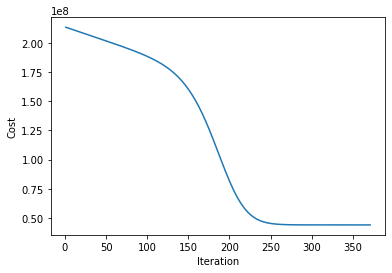

[[1.05160555e+00 2.66073922e+00 7.97043732e-01 7.81179762e-01
  7.78066341e-01 1.32743630e+00 1.58584297e+04 6.28197979e-01
  1.78723556e+00 1.20108679e+00 9.82117803e-01 1.36029357e+00
  1.34355098e+00 3.46025567e-01 1.85458741e+01 4.25606094e-01
  1.02880438e+00 5.55663522e-01 2.00852215e-01]]
102.24960677304038
-5.785064853264508
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


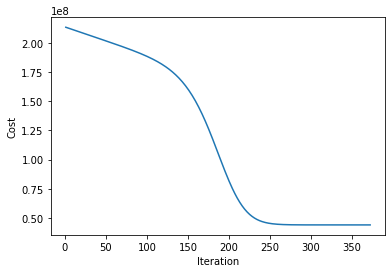

[[1.05160599e+00 2.66074384e+00 7.97043864e-01 7.81180020e-01
  7.78066957e-01 1.32743698e+00 1.58586800e+04 6.28198452e-01
  1.78723723e+00 1.20108785e+00 9.82117982e-01 1.36029477e+00
  1.34355201e+00 3.46025835e-01 1.85459680e+01 4.25606227e-01
  1.02880461e+00 5.55663578e-01 2.00852289e-01]]
102.24976988894446
-5.5188903779440635
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


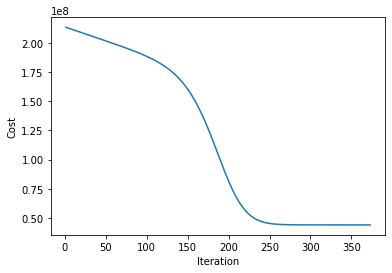

[[1.05160641e+00 2.66074824e+00 7.97043989e-01 7.81180267e-01
  7.78067544e-01 1.32743764e+00 1.58589189e+04 6.28198904e-01
  1.78723882e+00 1.20108886e+00 9.82118153e-01 1.36029592e+00
  1.34355299e+00 3.46026090e-01 1.85460576e+01 4.25606355e-01
  1.02880483e+00 5.55663630e-01 2.00852360e-01]]
102.24992549966088
-5.264958622209815
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


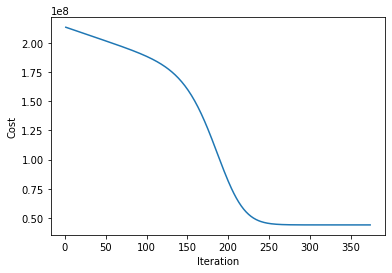

[[1.05160681e+00 2.66075244e+00 7.97044109e-01 7.81180502e-01
  7.78068104e-01 1.32743826e+00 1.58591467e+04 6.28199335e-01
  1.78724034e+00 1.20108983e+00 9.82118317e-01 1.36029702e+00
  1.34355392e+00 3.46026334e-01 1.85461431e+01 4.25606476e-01
  1.02880504e+00 5.55663681e-01 2.00852427e-01]]
102.25007395040244
-5.022706852850602
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


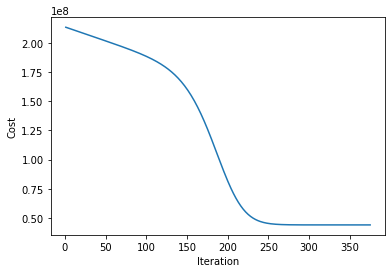

[[1.05160720e+00 2.66075645e+00 7.97044223e-01 7.81180727e-01
  7.78068638e-01 1.32743885e+00 1.58593641e+04 6.28199746e-01
  1.78724179e+00 1.20109075e+00 9.82118472e-01 1.36029806e+00
  1.34355482e+00 3.46026566e-01 1.85462246e+01 4.25606592e-01
  1.02880525e+00 5.55663729e-01 2.00852492e-01]]
102.25021557051333
-4.791598169111193
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


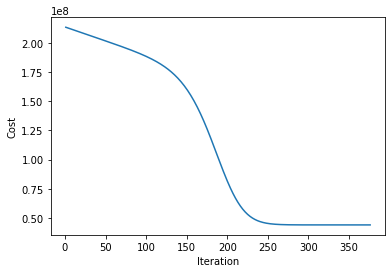

[[1.05160756e+00 2.66076028e+00 7.97044333e-01 7.81180941e-01
  7.78069148e-01 1.32743942e+00 1.58595715e+04 6.28200138e-01
  1.78724317e+00 1.20109162e+00 9.82118621e-01 1.36029906e+00
  1.34355567e+00 3.46026788e-01 1.85463024e+01 4.25606703e-01
  1.02880544e+00 5.55663775e-01 2.00852553e-01]]
102.25035067419769
-4.571120319836024
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


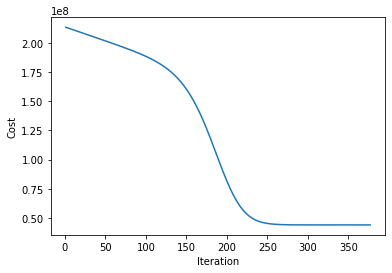

[[1.05160791e+00 2.66076392e+00 7.97044437e-01 7.81181145e-01
  7.78069634e-01 1.32743996e+00 1.58597693e+04 6.28200512e-01
  1.78724449e+00 1.20109246e+00 9.82118763e-01 1.36030001e+00
  1.34355648e+00 3.46026999e-01 1.85463766e+01 4.25606808e-01
  1.02880562e+00 5.55663818e-01 2.00852611e-01]]
102.25047956121476
-4.36078457453783
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


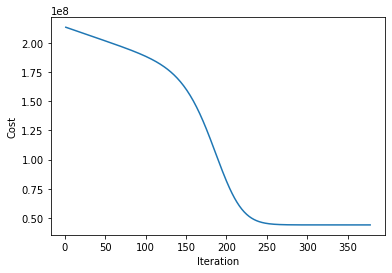

[[1.05160824e+00 2.66076740e+00 7.97044536e-01 7.81181340e-01
  7.78070098e-01 1.32744048e+00 1.58599580e+04 6.28200869e-01
  1.78724575e+00 1.20109326e+00 9.82118898e-01 1.36030092e+00
  1.34355726e+00 3.46027201e-01 1.85464474e+01 4.25606909e-01
  1.02880580e+00 5.55663860e-01 2.00852667e-01]]
102.25060251754225
-4.160124645881094
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


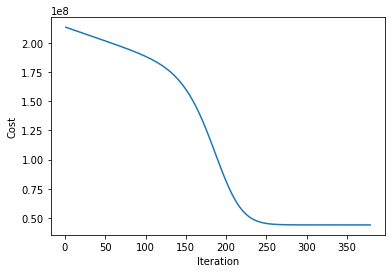

[[1.05160856e+00 2.66077072e+00 7.97044631e-01 7.81181526e-01
  7.78070540e-01 1.32744097e+00 1.58601381e+04 6.28201209e-01
  1.78724695e+00 1.20109402e+00 9.82119027e-01 1.36030179e+00
  1.34355800e+00 3.46027393e-01 1.85465149e+01 4.25607005e-01
  1.02880596e+00 5.55663900e-01 2.00852720e-01]]
102.25071981600924
-3.968695661339561
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


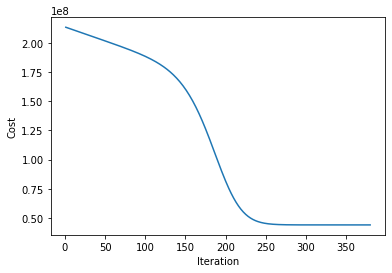

[[1.05160886e+00 2.66077389e+00 7.97044721e-01 7.81181703e-01
  7.78070963e-01 1.32744144e+00 1.58603098e+04 6.28201534e-01
  1.78724809e+00 1.20109475e+00 9.82119150e-01 1.36030261e+00
  1.34355871e+00 3.46027577e-01 1.85465794e+01 4.25607097e-01
  1.02880612e+00 5.55663938e-01 2.00852771e-01]]
102.25083171690011
-3.786073181763683
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


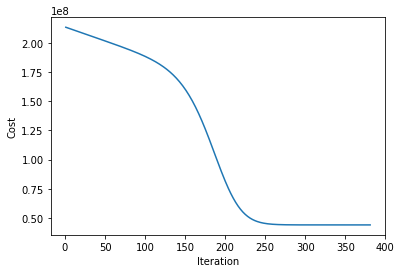

[[1.05160915e+00 2.66077691e+00 7.97044807e-01 7.81181872e-01
  7.78071365e-01 1.32744188e+00 1.58604737e+04 6.28201844e-01
  1.78724919e+00 1.20109544e+00 9.82119268e-01 1.36030340e+00
  1.34355938e+00 3.46027752e-01 1.85466408e+01 4.25607184e-01
  1.02880628e+00 5.55663974e-01 2.00852820e-01]]
102.25093846853082
-3.6118522647467444
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


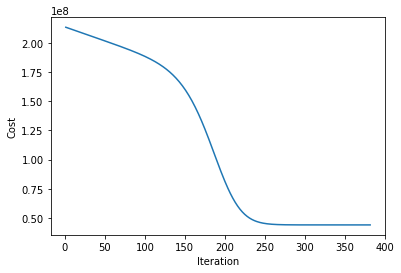

[[1.05160943e+00 2.66077980e+00 7.97044889e-01 7.81182034e-01
  7.78071750e-01 1.32744231e+00 1.58606300e+04 6.28202139e-01
  1.78725023e+00 1.20109610e+00 9.82119380e-01 1.36030415e+00
  1.34356002e+00 3.46027919e-01 1.85466995e+01 4.25607268e-01
  1.02880642e+00 5.55664009e-01 2.00852866e-01]]
102.25104030779869
-3.4456465707072463
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


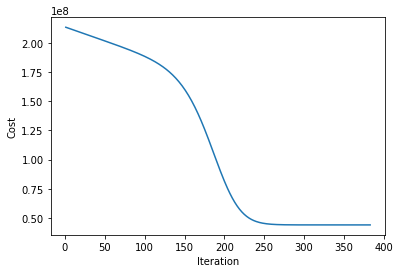

[[1.05160969e+00 2.66078255e+00 7.97044968e-01 7.81182188e-01
  7.78072116e-01 1.32744272e+00 1.58607791e+04 6.28202421e-01
  1.78725122e+00 1.20109674e+00 9.82119487e-01 1.36030487e+00
  1.34356064e+00 3.46028078e-01 1.85467554e+01 4.25607347e-01
  1.02880656e+00 5.55664042e-01 2.00852910e-01]]
102.25113746070701
-3.2870875098842838
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


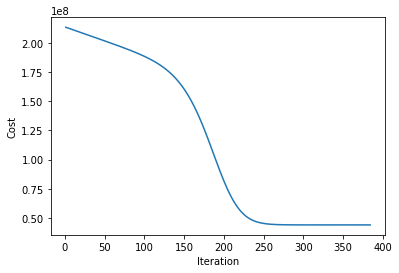

[[1.05160994e+00 2.66078517e+00 7.97045043e-01 7.81182335e-01
  7.78072466e-01 1.32744311e+00 1.58609214e+04 6.28202690e-01
  1.78725217e+00 1.20109734e+00 9.82119589e-01 1.36030555e+00
  1.34356122e+00 3.46028230e-01 1.85468088e+01 4.25607423e-01
  1.02880669e+00 5.55664073e-01 2.00852952e-01]]
102.25123014286565
-3.1358234282300983
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


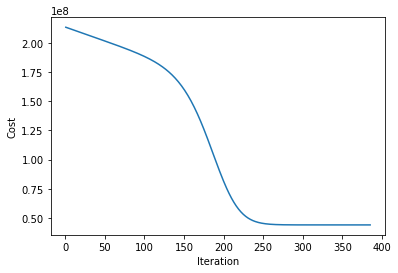

[[1.05161018e+00 2.66078767e+00 7.97045114e-01 7.81182475e-01
  7.78072800e-01 1.32744348e+00 1.58610571e+04 6.28202947e-01
  1.78725307e+00 1.20109791e+00 9.82119686e-01 1.36030621e+00
  1.34356178e+00 3.46028375e-01 1.85468597e+01 4.25607495e-01
  1.02880682e+00 5.55664103e-01 2.00852992e-01]]
102.25131855996858
-2.99151883056324
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


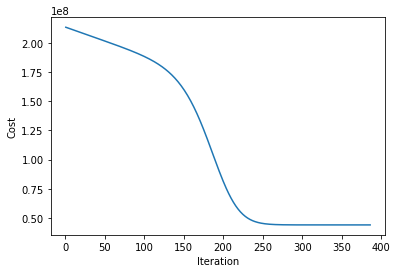

[[1.05161041e+00 2.66079006e+00 7.97045182e-01 7.81182609e-01
  7.78073118e-01 1.32744383e+00 1.58611866e+04 6.28203192e-01
  1.78725394e+00 1.20109846e+00 9.82119779e-01 1.36030683e+00
  1.34356231e+00 3.46028513e-01 1.85469082e+01 4.25607564e-01
  1.02880694e+00 5.55664132e-01 2.00853030e-01]]
102.25140290824959
-2.8538536392161915
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


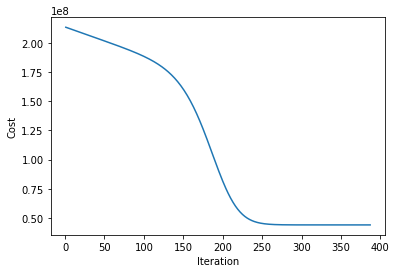

[[1.05161063e+00 2.66079234e+00 7.97045247e-01 7.81182736e-01
  7.78073421e-01 1.32744417e+00 1.58613101e+04 6.28203425e-01
  1.78725476e+00 1.20109898e+00 9.82119867e-01 1.36030742e+00
  1.34356282e+00 3.46028645e-01 1.85469546e+01 4.25607630e-01
  1.02880705e+00 5.55664159e-01 2.00853067e-01]]
102.25148337491704
-2.722522486591627
[[7.59836522e-08 3.14420640e-07 2.99408883e-08 5.99700792e-08
  1.43318395e-07 9.33595509e-08 2.86047621e-06 1.36557218e-07
  1.69175519e-07 1.59876862e-07 3.31080140e-08 1.60427829e-07
  1.38820482e-07 1.40095379e-07 9.17507262e-07 5.68515182e-08
  4.09140108e-08 1.80527517e-08 6.67692775e-08]]


KeyboardInterrupt: 

In [464]:
Progress = {"Cost":[], "Iteration":[]}
i = 0
start = 0
while i < 10000:
    expected = list(expected_output(start))
    Progress["Cost"].append(cost(expected, prices[start:start+5000]))
    Progress["Iteration"].append(i + 1)
    temp = correction(expected, prices[start:start+5000])
    params = params.reshape((1,19))
    params -= learning_rates * temp * params
    b -= b_learningRate * temp
    
    print(params)
    print(b)
    print(temp)
    print(learning_rates)
    
#     print(params, b)
    if (True):
#         plt.figure()
#         sns.kdeplot(x=Progress["Iteration"], y=Progress["Cost"])
#         sns.scatterplot(x=Progress["Iteration"], y=Progress["Cost"])
        sns.lineplot(data=Progress, x="Iteration", y="Cost")
        plt.show()
    i+=1
#     start += 5000
    if start > Data_set.shape[0]:
        start = 0

In [245]:
print(temp)

[-4.24719119e+04 -3.98590398e+08]


In [413]:
Progress 


{'Cost': [1314462009.6152842,
  967596314.8155558,
  507656178.0601592,
  15586803573556.014,
  1.1391274676124176e+22,
  6.756813228141808e+39,
  2.4038237283090334e+75,
  3.048365754069822e+146,
  4.904481943767513e+288,
  inf,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'Iteration': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21]}

<AxesSubplot:xlabel='Cost', ylabel='Iter'>

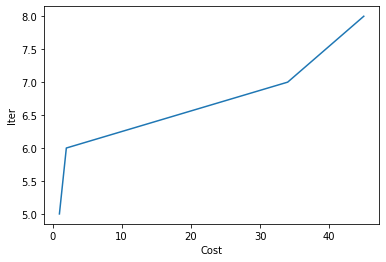

In [286]:
d = {"Cost": [1, 2, 34, 45], "Iter": [5, 6, 7, 8]}
sns.lineplot(data=d, x="Cost", y="Iter")

In [323]:
a= Data_set[3:5].to_numpy()
print(a.shape)

(2, 19)


In [437]:
learning_rates




array([[6.83852870e-05, 2.82978576e-04, 2.69467995e-05, 5.39730713e-05,
        1.28986555e-04, 8.40235958e-05, 2.57442859e-03, 1.22901496e-04,
        1.52257967e-04, 1.43889176e-04, 2.97972126e-05, 1.44385046e-04,
        1.24938434e-04, 1.26085841e-04, 8.25756535e-04, 5.11663664e-05,
        3.68226097e-05, 1.62474765e-05, 6.00923497e-05]])

In [457]:
params_xtra = params.copy()
learn_xtra = learning_rates.copy()

In [460]:
params = params_xtra.copy()
learning_rates = learn_xtra.copy() / 10

In [461]:
params

array([0.80864495, 0.89896755, 0.71863395, 0.63487818, 0.47416059,
       0.96127209, 0.98790495, 0.3918698 , 0.99617373, 0.69129441,
       0.87585662, 0.78143982, 0.8315841 , 0.21323027, 0.7932619 ,
       0.34964597, 0.89306031, 0.52202611, 0.15944487])

In [453]:
learning_rates *= 5

In [463]:
b = 0